## Comparing GWAS Expression to AD Hits Expression Spatially in the Brain to other Maps
### PC1-5, Variance Explained, etc 

In [2]:
from pyforest import *
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
# Import Schaefer 200 atlas in fsaverage space 
from netneurotools import datasets as nntdata
schaefer = nntdata.fetch_schaefer2018('fsaverage')['200Parcels7Networks']
# Convert to gii
import neuromaps
schaefer_gii = neuromaps.images.annot_to_gifti(schaefer)

from neuromaps import transforms
schaefer_fs = transforms.fsaverage_to_fsaverage(schaefer_gii, '164k', method='nearest')

In [4]:
from brainstat.datasets import fetch_template_surface
from brainstat.context.genetics import surface_genetic_expression

surfaces = fetch_template_surface("fsaverage", join=False) 

# Grab expression data
expression = surface_genetic_expression(schaefer_fs, 
                                        surfaces, 
                                        space="fsaverage", 
                                        lr_mirror='bidirectional', # mirror data to account for missing values
                                        missing='centroids')
print(expression.shape)
expression.head()

2023-01-25 10:39:07,965 - brainstat - INFO - If you use BrainStat's genetics functionality, please cite abagen (https://abagen.readthedocs.io/en/stable/citing.html).


/opt/anaconda3/lib/python3.9/site-packages/abagen-0.1.3-py3.9.egg/abagen/utils.py:180: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  info = info.append(
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
/opt/anaconda3/lib/python3.9/site-packages/abagen-0.1.3-py3.9.egg/abagen/surfaces.py:133: RuntimeWarning: invalid value encountered in true_divide
  w = (np.sum((A - B) * (V - B), axis=0, keepdims=True)
/opt/anaconda3/lib/python3.9/site-packages/abagen-0.1.3-py3.9.egg/abagen/allen.py:813: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  exp = exp.append(pd.DataFrame(index=empty[~mask])) \
/opt/anacond

(200, 15633)


gene_symbol      A1BG  A1BG-AS1       A2M     A2ML1   A3GALT2    A4GALT  \
label                                                                     
1            0.415346  0.479017  0.470681  0.618652  0.564935  0.424049   
2            0.363002  0.341188  0.513425  0.566501  0.472736  0.359974   
3            0.515889  0.366148  0.596697  0.588313  0.518101  0.551474   
4            0.183828  0.355546  0.469512  0.570886  0.589590  0.531784   
5            0.295845  0.317779  0.511026  0.429091  0.476845  0.522423   

gene_symbol      AAAS      AACS   AADACL3     AADAT  ...      ZW10    ZWILCH  \
label                                                ...                       
1            0.448760  0.686617  0.649394  0.479777  ...  0.495973  0.481318   
2            0.642107  0.433885  0.505009  0.588260  ...  0.506723  0.432217   
3            0.554471  0.388027  0.503257  0.425835  ...  0.423494  0.490441   
4            0.676804  0.573488  0.562918  0.510099  ...  0.630728  0.550914   
5            0.733568  0.456798  0.530676  0.472650  ...  0.501035  0.487780   

gene_symbol     ZWINT      ZXDA      ZXDB      ZXDC    ZYG11B       ZYX  \
label                                                                     
1            0.438184  0.485097  0.580970  0.524648  0.611983  0.536163   
2            0.490104  0.540985  0.531780  0.525900  0.440906  0.678568   
3            0.326532  0.546142  0.482097  0.583487  0.350143  0.554551   
4            0.505535  0.614798  0.538718  0.516868  0.607908  0.823344   
5            0.418424  0.538261  0.415247  0.487978  0.483249  0.866763   

gene_symbol     ZZEF1      ZZZ3  
label                            
1            0.695030  0.425067  
2            0.752978  0.492264  
3            0.567006  0.546735  
4            0.837826  0.311693  
5            0.726793  0.370475  

[5 rows x 15633 columns]

In [5]:
# Standardize the scores
scaler = StandardScaler()

scaled_exp=expression.copy()
scaler.fit(scaled_exp)
scaled_exp = scaler.transform(scaled_exp)

#scaled_exp=pd.DataFrame(scaler.fit_transform(scaled_exp))
print(scaled_exp.shape)

<IPython.core.display.Javascript object>

(200, 15633)


In [6]:
# Check if they've been standardized 
np.mean(scaled_exp), np.std(scaled_exp) # want a mean of 0 and a std of 1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(-4.0690423091487855e-18, 1.0)

In [7]:
# Principal Component Analyses 
from sklearn.decomposition import PCA

pca10_exp = PCA(n_components=10)

# Generate 10 PCs 
pca_exp = pca10_exp.fit_transform(scaled_exp)

#Create a Df
pca_df_exp = pd.DataFrame(data=pca_exp, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
print(pca_df_exp.shape)
pca_df_exp.head()

<IPython.core.display.Javascript object>

(200, 10)


PC1        PC2        PC3        PC4        PC5        PC6  \
0   25.210188 -15.138507 -44.032697  55.837172  35.151520  -2.336402   
1   88.540608 -40.600085 -34.441690   1.386462  30.363934  19.201146   
2   42.219996 -59.554834 -15.727962  10.783954 -13.174369  31.388785   
3  132.461102 -22.175199   4.104543  33.267120  37.034093 -11.645383   
4  121.183267 -34.454580  43.713399  -4.458227   2.707005  -7.590057   

         PC7        PC8        PC9       PC10  
0  -1.442752  16.123602  32.726901  -0.863518  
1  -8.090835   5.530941  10.604358  12.860000  
2 -12.833569   9.443849   5.052049 -17.189971  
3  26.044951  -6.935347 -11.555693 -12.150582  
4  32.240985 -10.748123  -6.875448   7.833560

In [8]:
pc_copy = pca_df_exp.copy()
scaler.fit(pc_copy)
pc_copy = scaler.transform(pc_copy)

#scaled_exp=pd.DataFrame(scaler.fit_transform(scaled_exp))
print(pc_copy.shape)

(200, 10)


In [9]:
np.mean(pc_copy), np.std(pc_copy) # want a mean of 0 and a std of 1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(-6.661338147750939e-19, 1.0)

In [10]:
pc_copy_df = pd.DataFrame(data=pc_copy, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
pc_copy_df.head()

<IPython.core.display.Javascript object>

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.429720 -0.357487 -1.134923  1.706228  1.175953 -0.089852 -0.062775   
1  1.509218 -0.958748 -0.887719  0.042366  1.015790  0.738427 -0.352037   
2  0.719661 -1.406354 -0.405381  0.329528 -0.440733  1.207132 -0.558396   
3  2.257864 -0.523655  0.105793  1.016550  1.238932 -0.447852  1.133230   
4  2.065628 -0.813626  1.126694 -0.136231  0.090560 -0.291894  1.402823   

        PC8       PC9      PC10  
0  0.810859  1.658496 -0.050197  
1  0.278152  0.537395  0.747569  
2  0.474933  0.256022 -0.999277  
3 -0.348780 -0.585606 -0.706330  
4 -0.540525 -0.348426  0.455376

In [11]:
# Attach Schaefer 200 parcellation labels to microarray data 
# Load labels
labels = pd.read_csv('/Users/hobbsd/Documents/GitHub/Neuromaps_Toolbox/SchaeferParcellationList.csv', sep=",")
print(labels.shape)
labels.head()

<IPython.core.display.Javascript object>

(200, 2)


label              region
0      1  7Networks_LH_Vis_1
1      2  7Networks_LH_Vis_2
2      3  7Networks_LH_Vis_3
3      4  7Networks_LH_Vis_4
4      5  7Networks_LH_Vis_5

In [12]:
# Concatenate with region labels 
pc_copy_df = pd.concat([labels,pc_copy_df], axis=1)
pc_copy_df.head()

<IPython.core.display.Javascript object>

label              region       PC1       PC2       PC3       PC4  \
0      1  7Networks_LH_Vis_1  0.429720 -0.357487 -1.134923  1.706228   
1      2  7Networks_LH_Vis_2  1.509218 -0.958748 -0.887719  0.042366   
2      3  7Networks_LH_Vis_3  0.719661 -1.406354 -0.405381  0.329528   
3      4  7Networks_LH_Vis_4  2.257864 -0.523655  0.105793  1.016550   
4      5  7Networks_LH_Vis_5  2.065628 -0.813626  1.126694 -0.136231   

        PC5       PC6       PC7       PC8       PC9      PC10  
0  1.175953 -0.089852 -0.062775  0.810859  1.658496 -0.050197  
1  1.015790  0.738427 -0.352037  0.278152  0.537395  0.747569  
2 -0.440733  1.207132 -0.558396  0.474933  0.256022 -0.999277  
3  1.238932 -0.447852  1.133230 -0.348780 -0.585606 -0.706330  
4  0.090560 -0.291894  1.402823 -0.540525 -0.348426  0.455376

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'PC2')

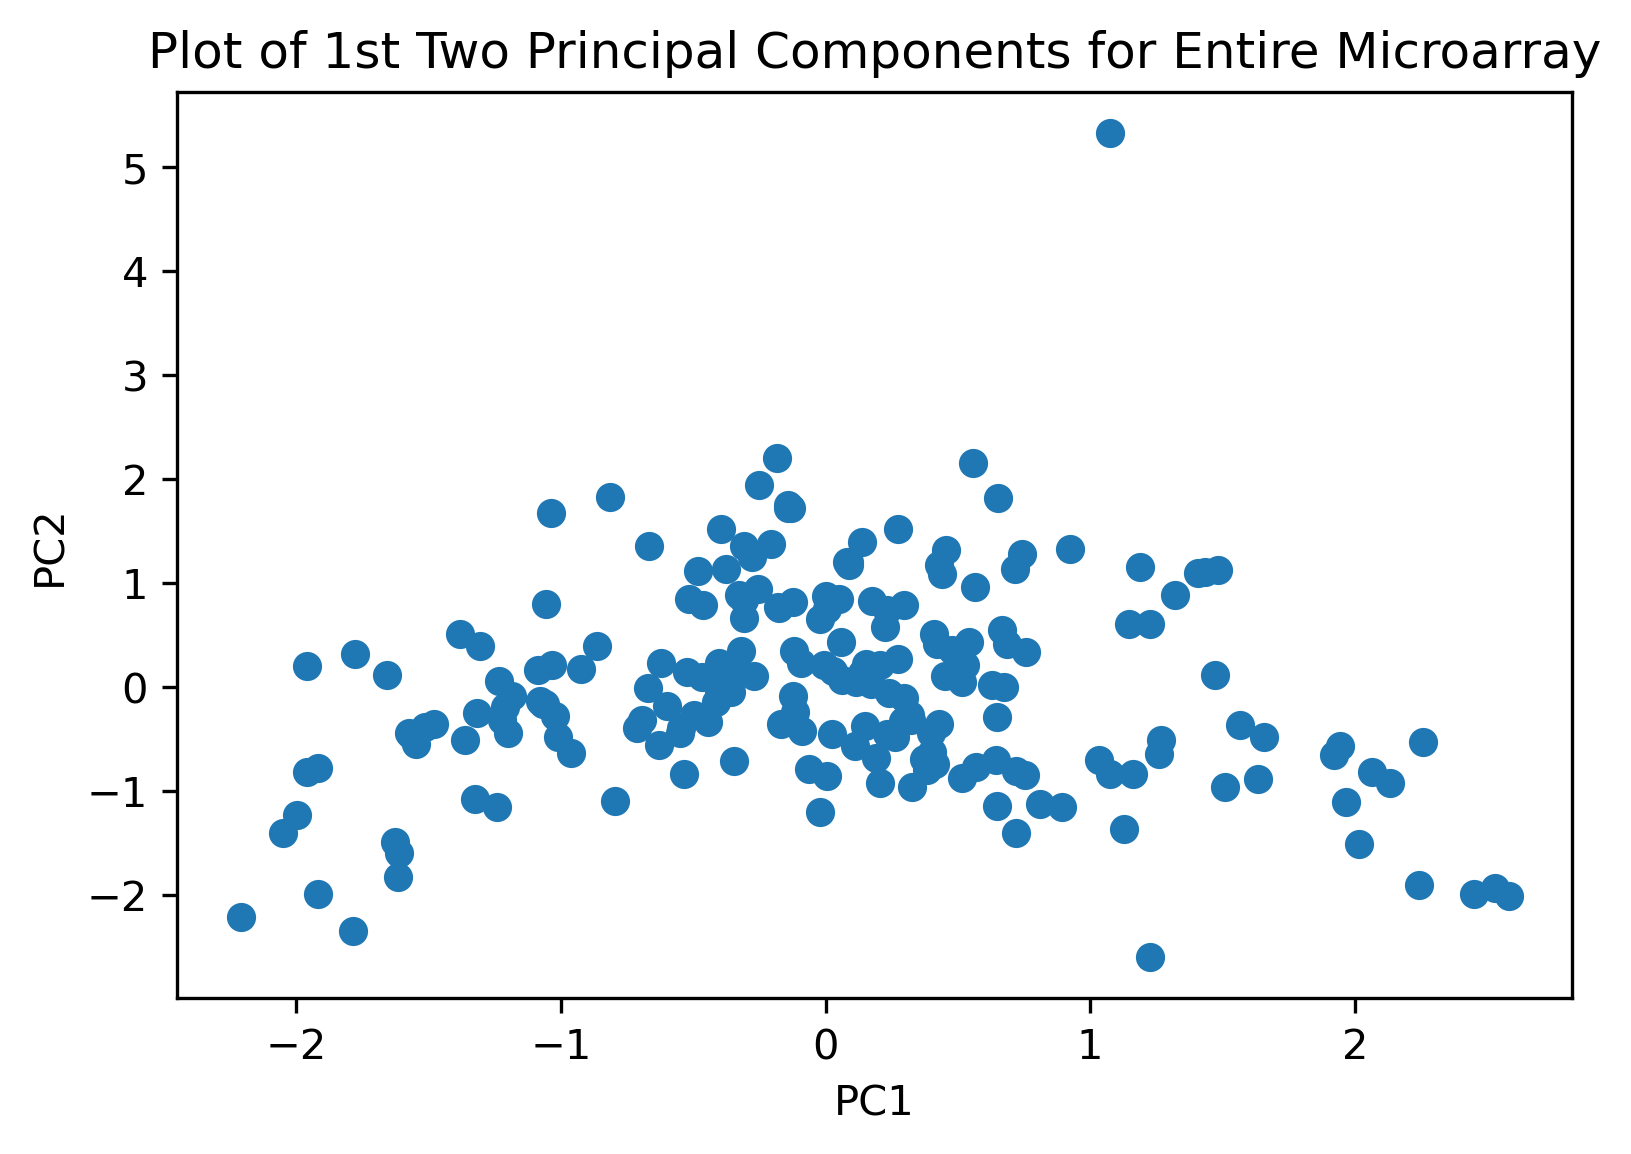

In [13]:
# Plotting full expression
plt.scatter(pc_copy_df['PC1'], pc_copy_df['PC2']) # PC1v2
plt.title('Plot of 1st Two Principal Components for Entire Microarray')
plt.xlabel('PC1')
plt.ylabel('PC2')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

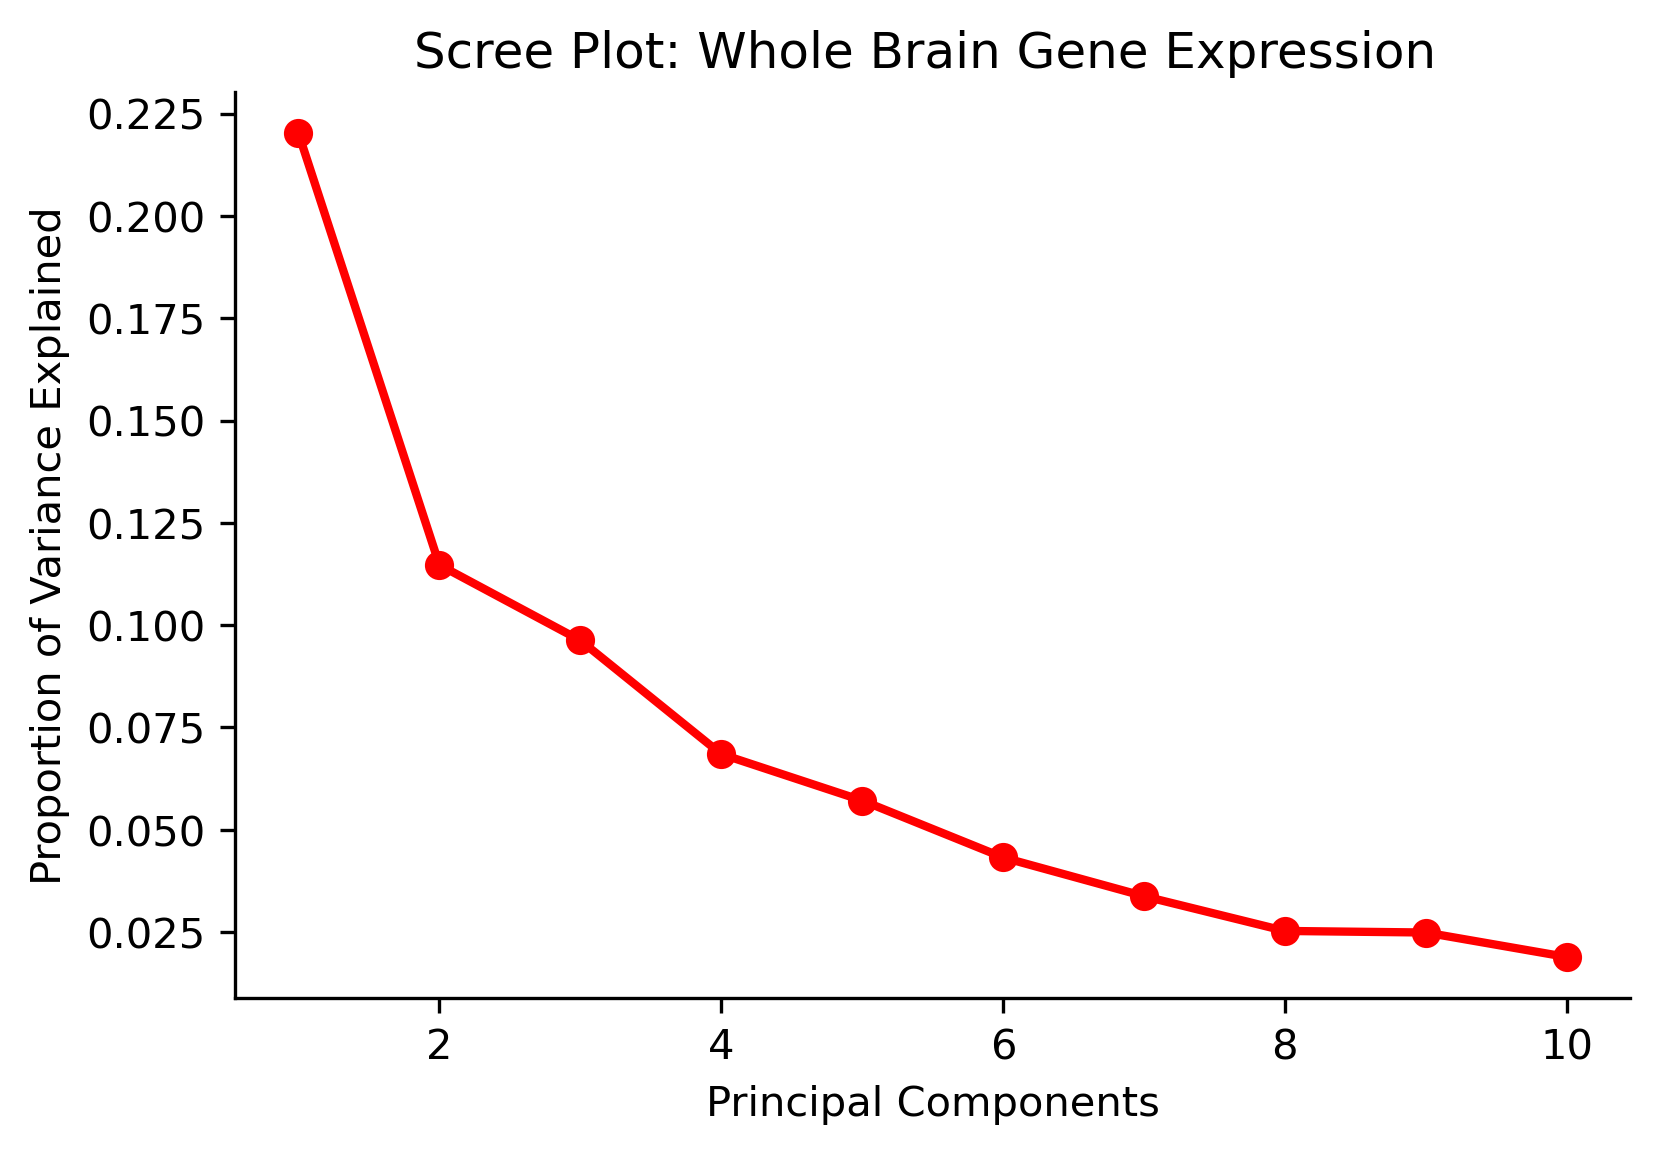

In [14]:
PC_values = np.arange(pca10_exp.n_components_) + 1
plt.plot(PC_values, pca10_exp.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot: Whole Brain Gene Expression ')
plt.xlabel('Principal Components')
plt.ylabel('Proportion of Variance Explained')
sns.despine()

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

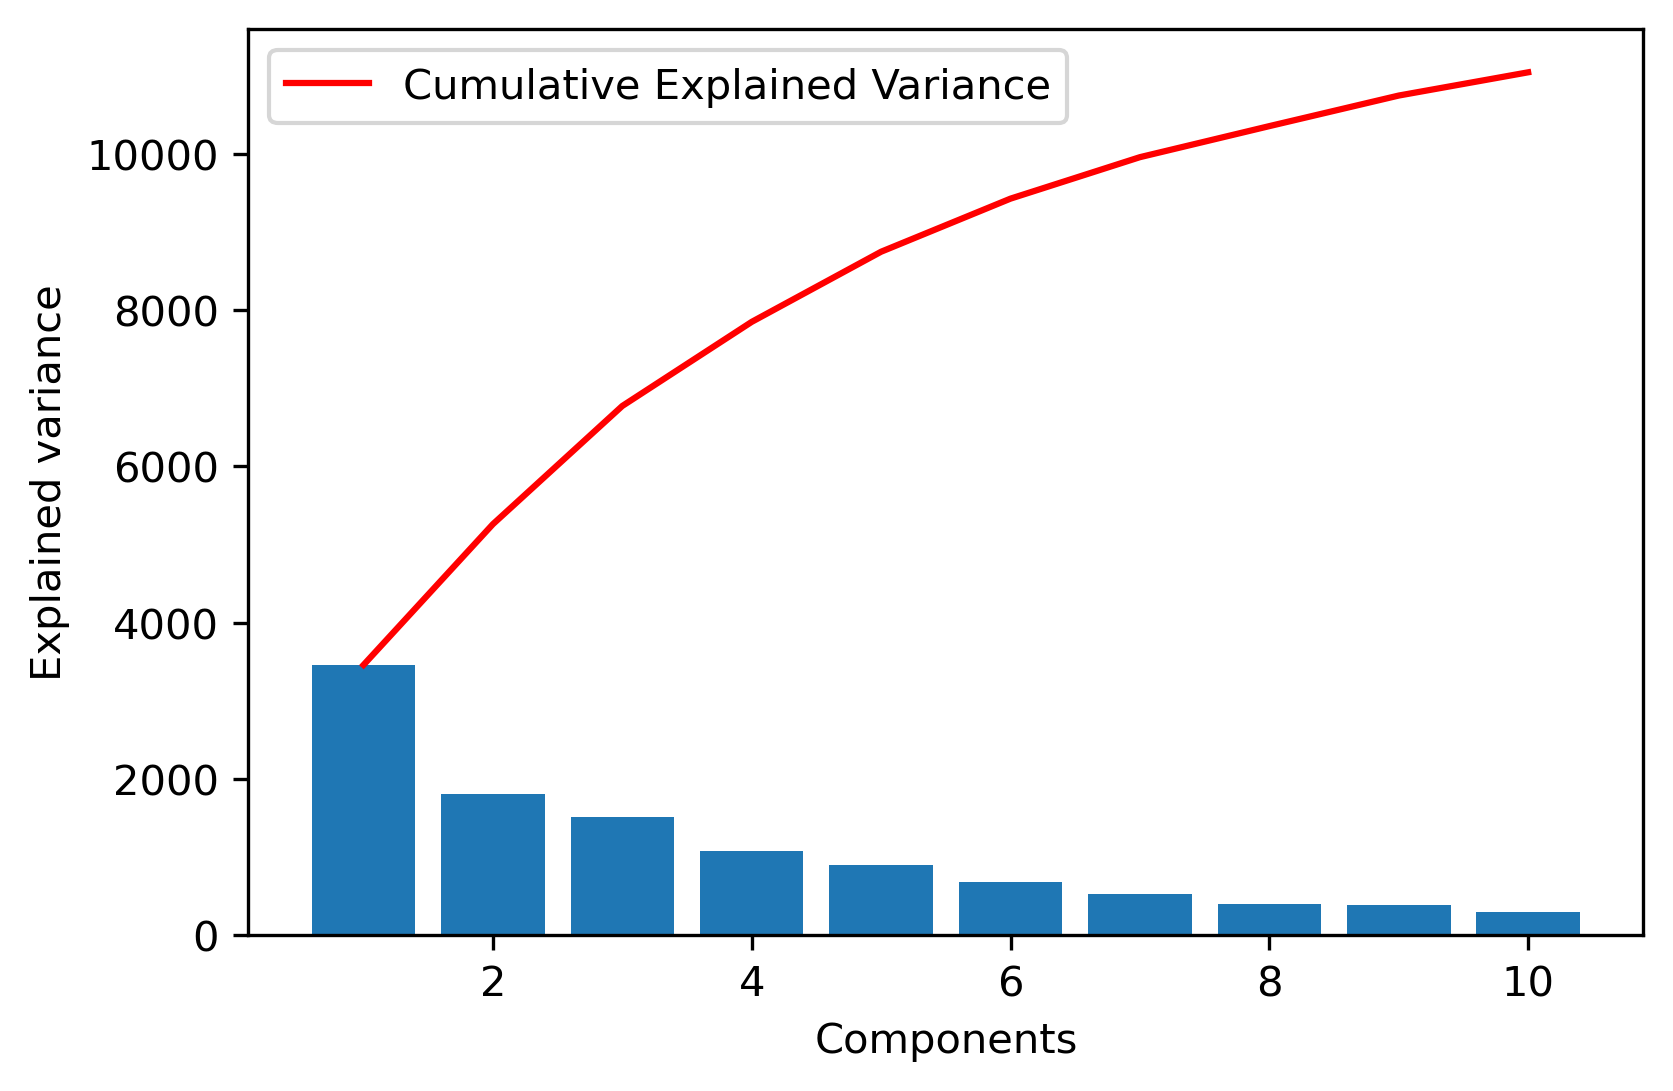

In [15]:
# Plotting explained variance for full expression 
plt.bar(range(1,len(pca10_exp.explained_variance_ )+1),pca10_exp.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pca10_exp.explained_variance_ )+1),
         np.cumsum(pca10_exp.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

In [16]:
PC1_exp = pc_copy_df['PC1'].to_numpy()
PC2_exp = pc_copy_df['PC2'].to_numpy()
PC3_exp = pc_copy_df['PC3'].to_numpy()
PC4_exp = pc_copy_df['PC4'].to_numpy()
PC5_exp = pc_copy_df['PC5'].to_numpy()

<IPython.core.display.Javascript object>

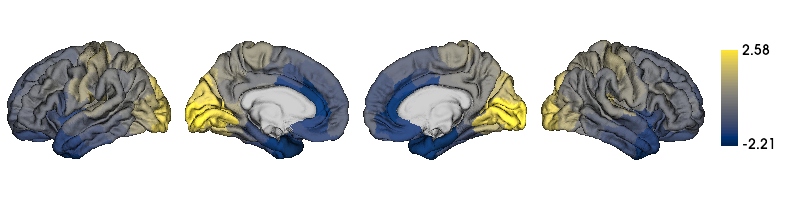

In [17]:
from brainspace.plotting.surface_plotting import plot_hemispheres
from brainspace.utils.parcellation import map_to_labels
from PIL import Image
from IPython.core.display import Image as Img


schaefer = neuromaps.images.load_data(schaefer_fs)


# Plotting all expression PC1
vertexwise = map_to_labels(
    PC1_exp,
    schaefer,
    mask=schaefer != 0,
    fill=np.nan,
)
plot_hemispheres(
    surfaces[0],
    surfaces[1],
    vertexwise,
    cmap='cividis',
    color_bar=True,
    embed_nb=True,
    size=(800, 200),
    zoom=1.2,
    scale=(1,1),
    nan_color=(0.7, 0.7, 0.7, 1), # makes NA's grey 
    layout_style='row', # alternative is grid
    cb__labelTextProperty={"fontSize": 14},
)


<IPython.core.display.Javascript object>

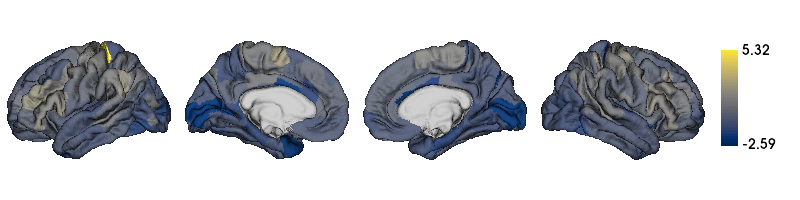

In [18]:
# Plotting all expression PC2
vertexwise = map_to_labels(
    PC2_exp,
    schaefer,
    mask=schaefer != 0,
    fill=np.nan,
)
plot_hemispheres(
    surfaces[0],
    surfaces[1],
    vertexwise,
    cmap='cividis',
    color_bar=True,
    embed_nb=True,
    size=(800, 200),
    zoom=1.2,
    scale=(1,1),
    nan_color=(0.7, 0.7, 0.7, 1), # makes NA's grey 
    layout_style='row', # alternative is grid
    cb__labelTextProperty={"fontSize": 14},
)

<IPython.core.display.Javascript object>

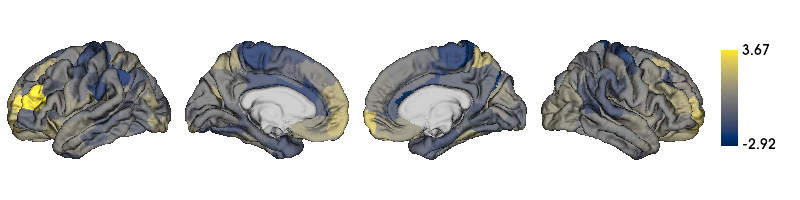

In [19]:
# Plotting all expression PC3
vertexwise = map_to_labels(
    PC3_exp,
    schaefer,
    mask=schaefer != 0,
    fill=np.nan,
)
plot_hemispheres(
    surfaces[0],
    surfaces[1],
    vertexwise,
    cmap='cividis',
    color_bar=True,
    embed_nb=True,
    size=(800, 200),
    zoom=1.2,
    scale=(1,1),
    nan_color=(0.7, 0.7, 0.7, 1), # makes NA's grey 
    layout_style='row', # alternative is grid
    cb__labelTextProperty={"fontSize": 14},
)

<IPython.core.display.Javascript object>

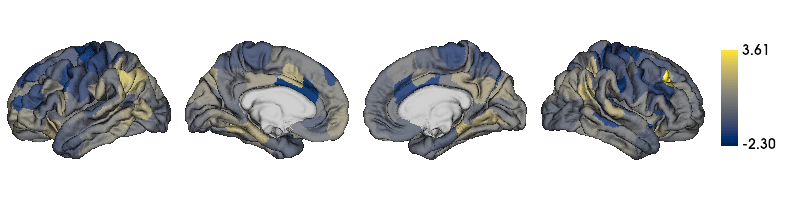

In [20]:
# Plotting all expression PC4
vertexwise = map_to_labels(
    PC4_exp,
    schaefer,
    mask=schaefer != 0,
    fill=np.nan,
)
plot_hemispheres(
    surfaces[0],
    surfaces[1],
    vertexwise,
    cmap='cividis',
    color_bar=True,
    embed_nb=True,
    size=(800, 200),
    zoom=1.2,
    scale=(1,1),
    nan_color=(0.7, 0.7, 0.7, 1), # makes NA's grey 
    layout_style='row', # alternative is grid
    cb__labelTextProperty={"fontSize": 14},
)

<IPython.core.display.Javascript object>

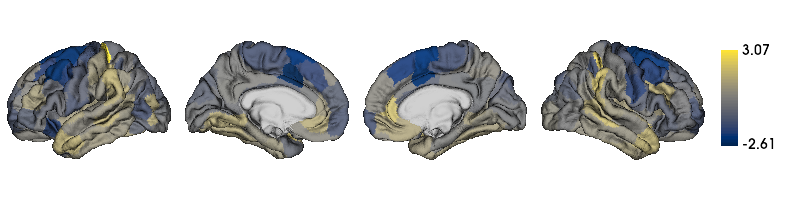

In [21]:
# Plotting all expression PC5
vertexwise = map_to_labels(
    PC5_exp,
    schaefer,
    mask=schaefer != 0,
    fill=np.nan,
)
plot_hemispheres(
    surfaces[0],
    surfaces[1],
    vertexwise,
    cmap='cividis',
    color_bar=True,
    embed_nb=True,
    size=(800, 200),
    zoom=1.2,
    scale=(1,1),
    nan_color=(0.7, 0.7, 0.7, 1), # makes NA's grey 
    layout_style='row', # alternative is grid
    cb__labelTextProperty={"fontSize": 14},
)

# AD Risk-Specific Genes

In [22]:
genes = expression[["ADAM10", "IQCK", "PSMC5", "ADAMTS1", "MAF", "WWOX", "CD55", "YOD1", "BIN1", "INPP5D", "HLA-DRB1", "PSMB8", 
                    "GPSM3", "HLA-DPA1", "HLA-DRA", "HLA-DRB5", "PSMB9", "TREM2", "CD2AP", "AGFG2", "PILRA", "C7orf43", "GAL3ST4", 
                    "ZKSCAN1", "FAM131B", "PTK2B", "CLU", "ECHDC3", "PSMC3", "ACP2", "C1QTNF4", "CELF1", "MTCH2", "NDUFS3", 
                    "NUP160", "SPI1", "MS4A7", "MS4A4A", "EED", "PICALM", "SORL1", "STYX", "RIN3", "ABCA7", "CNN2", "WDR18"]]
print(genes.shape)
genes.head()

(200, 46)


gene_symbol    ADAM10      IQCK     PSMC5   ADAMTS1       MAF      WWOX  \
label                                                                     
1            0.516383  0.310743  0.586182  0.447222  0.432131  0.533527   
2            0.556071  0.413312  0.421474  0.566061  0.351833  0.609417   
3            0.530005  0.408366  0.417751  0.591575  0.396399  0.483108   
4            0.461801  0.247923  0.462429  0.449088  0.389866  0.650905   
5            0.496664  0.315806  0.435316  0.444953  0.355413  0.579997   

gene_symbol      CD55      YOD1      BIN1    INPP5D  ...     MS4A7    MS4A4A  \
label                                                ...                       
1            0.473630  0.417545  0.606485  0.421399  ...  0.307487  0.510709   
2            0.555696  0.562626  0.546624  0.588944  ...  0.271173  0.332964   
3            0.597217  0.559766  0.623660  0.614160  ...  0.410729  0.391786   
4            0.377397  0.623659  0.420205  0.632068  ...  0.296797  0.372450   
5            0.463696  0.673294  0.372026  0.701140  ...  0.440903  0.378136   

gene_symbol       EED    PICALM     SORL1      STYX      RIN3     ABCA7  \
label                                                                     
1            0.500962  0.464321  0.523742  0.414470  0.326560  0.572547   
2            0.594730  0.602113  0.566735  0.534693  0.326961  0.624775   
3            0.485547  0.536945  0.599724  0.543213  0.490318  0.529273   
4            0.521716  0.425445  0.657640  0.460091  0.421800  0.699867   
5            0.642434  0.491233  0.796450  0.515393  0.492193  0.753846   

gene_symbol      CNN2     WDR18  
label                            
1            0.434470  0.315350  
2            0.509482  0.484533  
3            0.589766  0.473616  
4            0.460549  0.533869  
5            0.503649  0.589263  

[5 rows x 46 columns]

In [23]:
# Standardize the scores
scaler_AD = StandardScaler()

scaled_gene=genes.copy()
scaler_AD.fit(scaled_gene)
scaled_gene = scaler_AD.transform(scaled_gene)

#scaled_exp=pd.DataFrame(scaler.fit_transform(scaled_exp))
print(scaled_gene.shape)

<IPython.core.display.Javascript object>

(200, 46)


In [24]:
# Check if they've been standardized 
np.mean(scaled_gene), np.std(scaled_gene) # want a mean of 0 and a std of 1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(-5.386995197746412e-17, 1.0)

In [25]:
pca10_gene = PCA(n_components=10)

# Generate 5 PCs 
pca_gene = pca10_gene.fit_transform(scaled_gene)

#Create a Df
pca_df_gene = pd.DataFrame(data=pca_gene, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
print(pca_df_gene.shape)
pca_df_gene.head()

<IPython.core.display.Javascript object>

(200, 10)


PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.458988  0.355537  2.243444 -3.928485 -1.434507 -0.692961  0.123608   
1 -4.963350 -0.940494  3.837901  0.290374 -1.173881  0.037207 -0.259632   
2 -2.244651 -2.755234  3.028617  0.746073 -0.597729 -0.846968  0.575759   
3 -5.931117  1.733975  1.958495  0.260580 -2.612359  1.762526 -0.482775   
4 -4.613984  1.285110  0.234643  2.452220 -1.893330  1.156277  0.830217   

        PC8       PC9      PC10  
0 -0.862513 -0.481612  2.193224  
1 -0.576150 -0.575837  1.175181  
2  0.650014  0.784940 -0.570993  
3  0.431841  1.636355  0.496125  
4 -1.759414  1.200776 -0.222190

In [26]:
pc_gene_copy = pca_df_gene.copy()
scaler_AD.fit(pc_gene_copy)
pc_gene_copy = scaler_AD.transform(pc_gene_copy)

#scaled_exp=pd.DataFrame(scaler.fit_transform(scaled_exp))
print(pc_gene_copy.shape)

(200, 10)


In [27]:
np.mean(pc_gene_copy), np.std(pc_gene_copy) # want a mean of 0 and a std of 1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(0.0, 1.0)

In [28]:
pc_gene_copy_df = pd.DataFrame(data=pc_gene_copy, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
pc_gene_copy_df.head()

<IPython.core.display.Javascript object>

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.458190  0.138466  1.009704 -2.052932 -0.941251 -0.467290  0.086624   
1 -1.558723 -0.366281  1.727319  0.151742 -0.770241  0.025090 -0.181949   
2 -0.704925 -1.073043  1.363086  0.389880 -0.392199 -0.571142  0.403488   
3 -1.862647  0.675307  0.881457  0.136173 -1.714097  1.188538 -0.338326   
4 -1.449005  0.500494  0.105605  1.281471 -1.242307  0.779721  0.581811   

        PC8       PC9      PC10  
0 -0.708771 -0.417639  2.017996  
1 -0.473452 -0.499348  1.081290  
2  0.534150  0.680675 -0.525373  
3  0.354866  1.418995  0.456487  
4 -1.445801  1.041276 -0.204438

In [29]:
# Concatenate with region labels 
pc_gene_copy_df = pd.concat([labels,pc_gene_copy_df], axis=1)
pc_gene_copy_df.head()

<IPython.core.display.Javascript object>

label              region       PC1       PC2       PC3       PC4  \
0      1  7Networks_LH_Vis_1 -0.458190  0.138466  1.009704 -2.052932   
1      2  7Networks_LH_Vis_2 -1.558723 -0.366281  1.727319  0.151742   
2      3  7Networks_LH_Vis_3 -0.704925 -1.073043  1.363086  0.389880   
3      4  7Networks_LH_Vis_4 -1.862647  0.675307  0.881457  0.136173   
4      5  7Networks_LH_Vis_5 -1.449005  0.500494  0.105605  1.281471   

        PC5       PC6       PC7       PC8       PC9      PC10  
0 -0.941251 -0.467290  0.086624 -0.708771 -0.417639  2.017996  
1 -0.770241  0.025090 -0.181949 -0.473452 -0.499348  1.081290  
2 -0.392199 -0.571142  0.403488  0.534150  0.680675 -0.525373  
3 -1.714097  1.188538 -0.338326  0.354866  1.418995  0.456487  
4 -1.242307  0.779721  0.581811 -1.445801  1.041276 -0.204438

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'PC2')

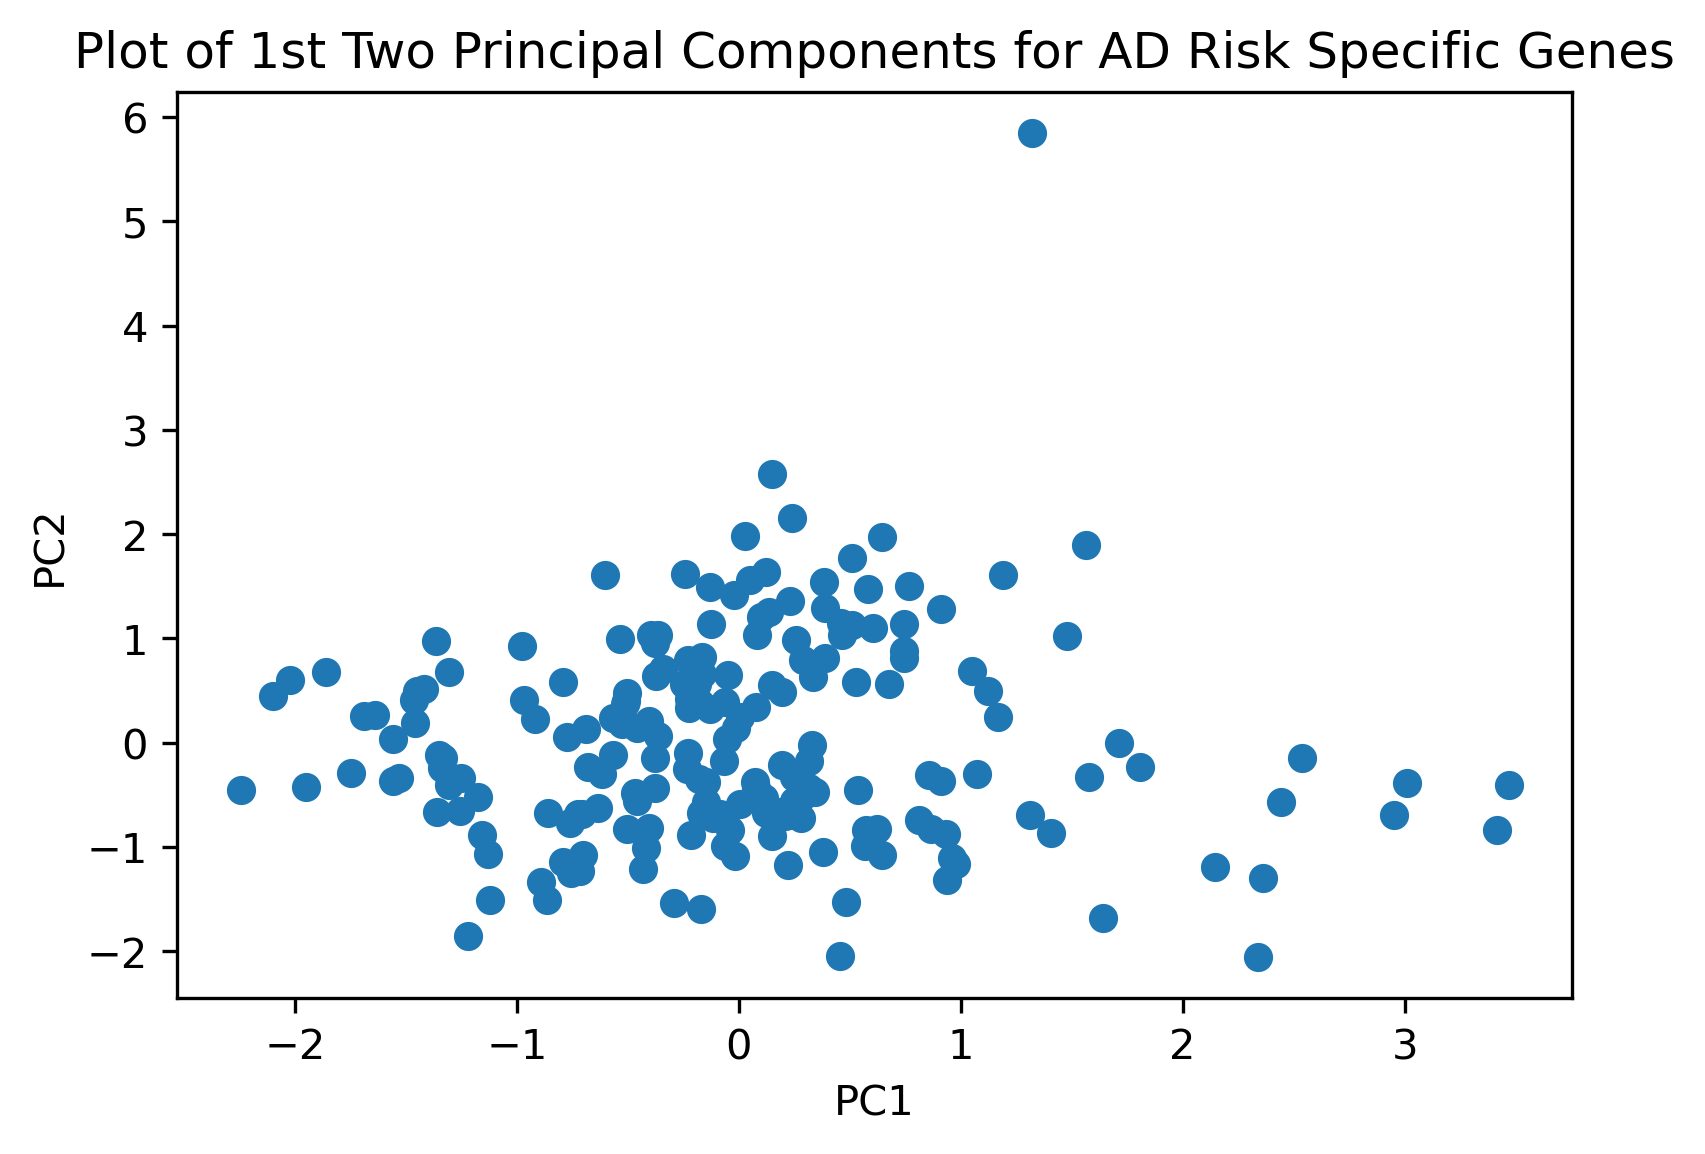

In [30]:
# Plotting full expression
plt.scatter(pc_gene_copy_df['PC1'], pc_gene_copy_df['PC2']) # PC1v2
plt.title('Plot of 1st Two Principal Components for AD Risk Specific Genes')
plt.xlabel('PC1')
plt.ylabel('PC2')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

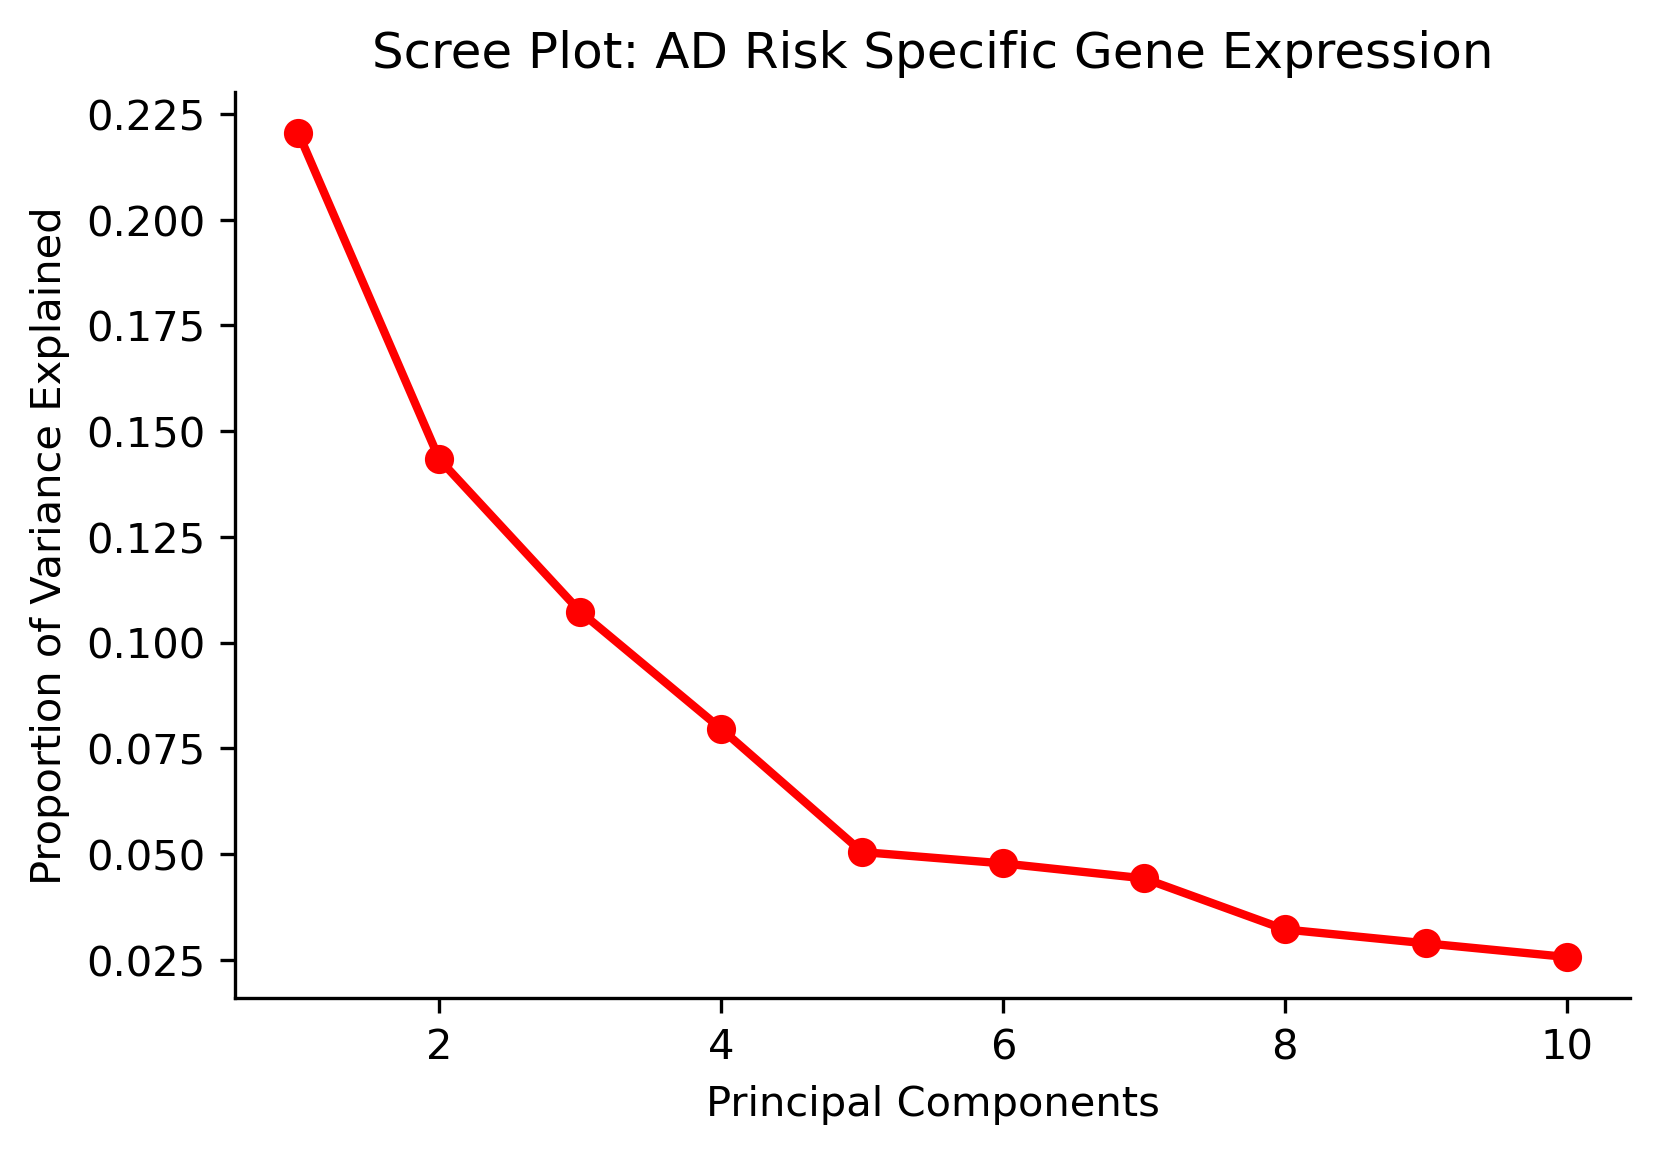

In [31]:
PC_values_gene = np.arange(pca10_gene.n_components_) + 1
plt.plot(PC_values_gene, pca10_gene.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot: AD Risk Specific Gene Expression')
plt.xlabel('Principal Components')
plt.ylabel('Proportion of Variance Explained')
sns.despine()

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

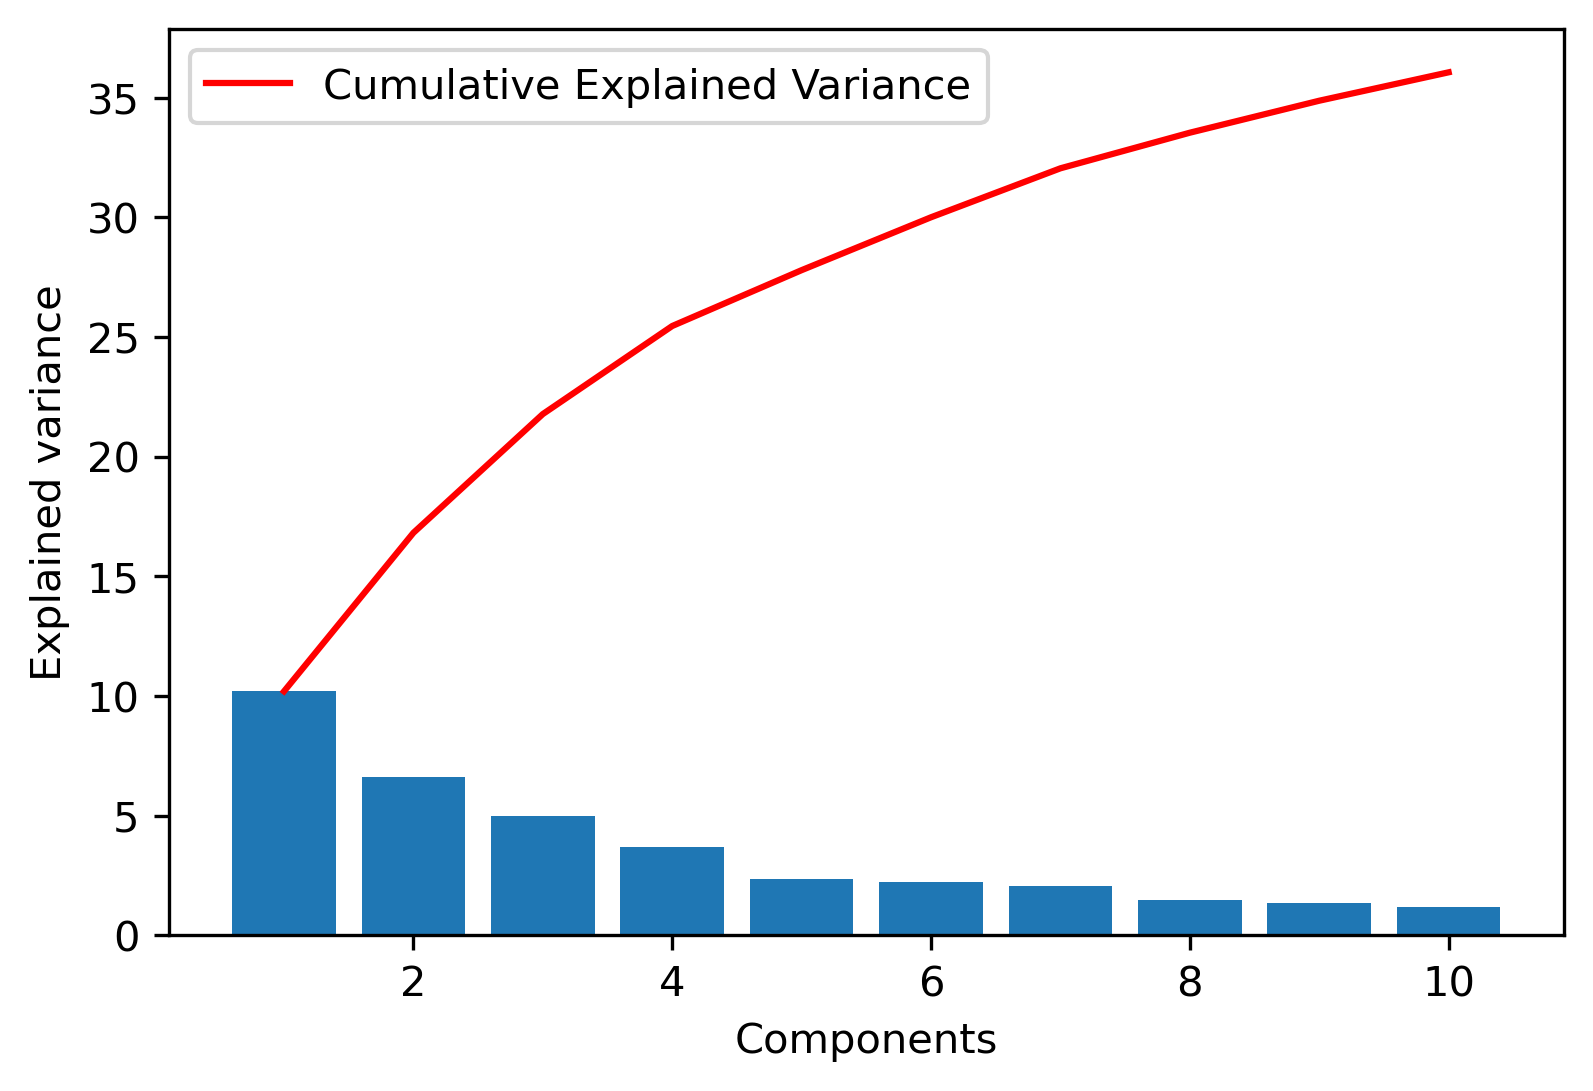

In [32]:
# Plotting explained variance for full expression 
plt.bar(range(1,len(pca10_gene.explained_variance_ )+1),pca10_gene.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pca10_gene.explained_variance_ )+1),
         np.cumsum(pca10_gene.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

In [33]:
PC1_gene = pc_gene_copy_df['PC1'].to_numpy()
PC2_gene = pc_gene_copy_df['PC2'].to_numpy()
PC3_gene = pc_gene_copy_df['PC3'].to_numpy()
PC4_gene = pc_gene_copy_df['PC4'].to_numpy()
PC5_gene = pc_gene_copy_df['PC5'].to_numpy()

<IPython.core.display.Javascript object>

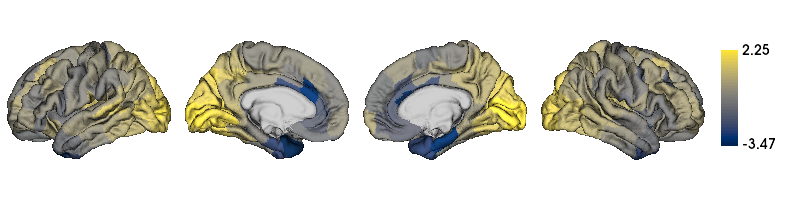

In [34]:
# Plotting all expression PC1
vertexwise = map_to_labels(
    -PC1_gene,
    schaefer,
    mask=schaefer != 0,
    fill=np.nan,
)
plot_hemispheres(
    surfaces[0],
    surfaces[1],
    vertexwise,
    cmap='cividis',
    color_bar=True,
    embed_nb=True,
    size=(800, 200),
    zoom=1.2,
    scale=(1,1),
    nan_color=(0.7, 0.7, 0.7, 1), # makes NA's grey 
    layout_style='row', # alternative is grid
    cb__labelTextProperty={"fontSize": 14},
)

<IPython.core.display.Javascript object>

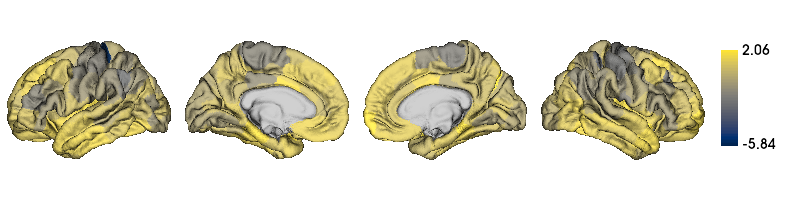

In [35]:
# Plotting all expression PC2
vertexwise = map_to_labels(
    -PC2_gene,
    schaefer,
    mask=schaefer != 0,
    fill=np.nan,
)
plot_hemispheres(
    surfaces[0],
    surfaces[1],
    vertexwise,
    cmap='cividis',
    color_bar=True,
    embed_nb=True,
    size=(800, 200),
    zoom=1.2,
    scale=(1,1),
    nan_color=(0.7, 0.7, 0.7, 1), # makes NA's grey 
    layout_style='row', # alternative is grid
    cb__labelTextProperty={"fontSize": 14},
)

<IPython.core.display.Javascript object>

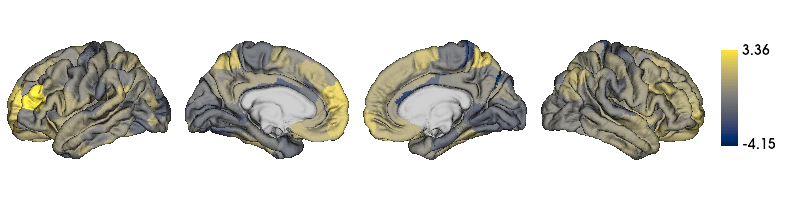

In [36]:
# Plotting all expression PC3
vertexwise = map_to_labels(
    -PC3_gene,
    schaefer,
    mask=schaefer != 0,
    fill=np.nan,
)
plot_hemispheres(
    surfaces[0],
    surfaces[1],
    vertexwise,
    cmap='cividis',
    color_bar=True,
    embed_nb=True,
    size=(800, 200),
    zoom=1.2,
    scale=(1,1),
    nan_color=(0.7, 0.7, 0.7, 1), # makes NA's grey 
    layout_style='row', # alternative is grid
    cb__labelTextProperty={"fontSize": 14},
)

<IPython.core.display.Javascript object>

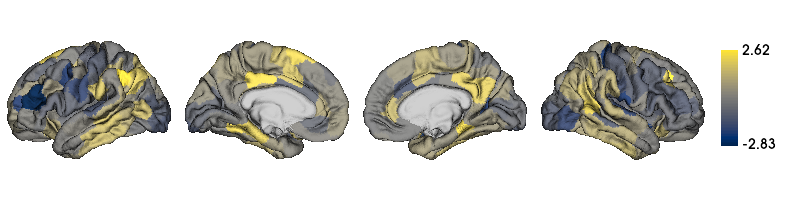

In [37]:
# Plotting all expression PC4
vertexwise = map_to_labels(
    -PC4_gene,
    schaefer,
    mask=schaefer != 0,
    fill=np.nan,
)
plot_hemispheres(
    surfaces[0],
    surfaces[1],
    vertexwise,
    cmap='cividis',
    color_bar=True,
    embed_nb=True,
    size=(800, 200),
    zoom=1.2,
    scale=(1,1),
    nan_color=(0.7, 0.7, 0.7, 1), # makes NA's grey 
    layout_style='row', # alternative is grid
    cb__labelTextProperty={"fontSize": 14},
)

<IPython.core.display.Javascript object>

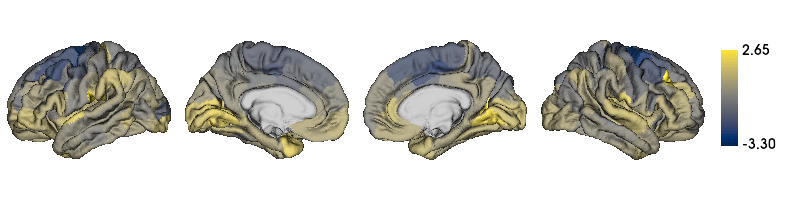

In [38]:
# Plotting all expression PC5
vertexwise = map_to_labels(
    -PC5_gene,
    schaefer,
    mask=schaefer != 0,
    fill=np.nan,
)
plot_hemispheres(
    surfaces[0],
    surfaces[1],
    vertexwise,
    cmap='cividis',
    color_bar=True,
    embed_nb=True,
    size=(800, 200),
    zoom=1.2,
    scale=(1,1),
    nan_color=(0.7, 0.7, 0.7, 1), # makes NA's grey 
    layout_style='row', # alternative is grid
    cb__labelTextProperty={"fontSize": 14},
)

In [39]:
# Import ADRC information in Schaefer200 space
tau_data = pd.read_csv('/Users/hobbsd/Documents/GitHub/Neuromaps_Toolbox/regional_tau_data_schaefer7_,200_220822.csv', sep=",")
tau_summary = tau_data[['ROI.Label','region','hemi','baseline_taudif_symptomatic_control']]
tau_diff = tau_summary['baseline_taudif_symptomatic_control'].to_numpy()
scaled_tau_diff =pd.DataFrame(tau_diff.copy())
scaler.fit(scaled_tau_diff)
scaled_tau_diff = scaler.transform(scaled_tau_diff) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:
print(scaled_tau_diff)

[[ 1.02160889]
 [ 0.73304117]
 [ 1.52732883]
 [ 0.19188113]
 [-0.73192876]
 [ 0.51079883]
 [-0.94979918]
 [ 0.86263275]
 [-0.22623829]
 [-0.11669744]
 [ 0.49602744]
 [ 0.42197907]
 [-0.20389469]
 [ 0.61132732]
 [-0.26503602]
 [-0.17362021]
 [-0.69341167]
 [-0.98271621]
 [-0.52090623]
 [-1.68740707]
 [-1.24221357]
 [-0.92042662]
 [-1.83773675]
 [-1.62157232]
 [-0.73704446]
 [-2.43159626]
 [-1.00082336]
 [-1.20125764]
 [-1.57509458]
 [-2.43799234]
 [ 2.13632826]
 [ 0.8561142 ]
 [ 0.81730899]
 [-0.69841373]
 [-0.67549606]
 [ 0.19026346]
 [-0.23705067]
 [-0.43766686]
 [ 0.26596924]
 [-0.8908588 ]
 [-0.1767325 ]
 [ 0.01236689]
 [-0.15330473]
 [ 0.16969448]
 [-0.78591863]
 [-0.12963696]
 [-0.13716969]
 [-0.13454771]
 [-0.32316071]
 [-0.2151349 ]
 [-0.5403906 ]
 [-0.55233351]
 [-0.02075549]
 [-0.89257626]
 [-0.18278337]
 [-0.15150121]
 [ 1.95355237]
 [ 2.5070804 ]
 [ 1.68068934]
 [ 0.33749655]
 [ 0.1261909 ]
 [ 0.56631528]
 [ 0.29667697]
 [ 1.84961165]
 [-0.77399982]
 [-1.09467654]
 [-0.65968

<IPython.core.display.Javascript object>

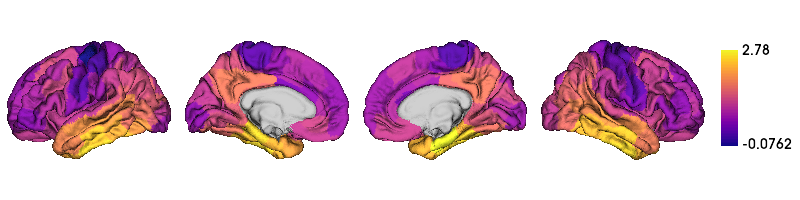

In [41]:
# Plotting all expression PC4
vertexwise = map_to_labels(
    tau_diff,
    schaefer,
    mask=schaefer != 0,
    fill=np.nan,
)
plot_hemispheres(
    surfaces[0],
    surfaces[1],
    vertexwise,
    cmap='plasma',
    color_bar=True,
    embed_nb=True,
    size=(800, 200),
    zoom=1.2,
    scale=(1,1),
    nan_color=(0.7, 0.7, 0.7, 1), # makes NA's grey 
    layout_style='row', # alternative is grid
    cb__labelTextProperty={"fontSize": 14},
)

In [42]:
from neuromaps.nulls import alexander_bloch
rotated_PC_exp = alexander_bloch(data=PC1_exp, atlas='fsaverage', density='164k', n_perm=100, seed=1234, parcellation=schaefer_gii)
rotated_PC_gene = alexander_bloch(data=PC1_gene, atlas='fsaverage', density='164k', n_perm=100, seed=1234, parcellation=schaefer_gii)
rotated_tau_diff = alexander_bloch(data=tau_diff, atlas='fsaverage', density='164k', n_perm=100, seed=1234, parcellation=schaefer_gii)


In [43]:
from neuromaps import compare_images
corr, pval = compare_images(PC1_exp, tau_diff, metric='spearmanr', nulls=rotated_PC_exp)
print(f'r = {corr:.3f}, p = {pval:.3f}')

r = -0.122, p = 0.812


In [44]:
corr, pval = compare_images(tau_diff, PC1_exp, metric='spearmanr', nulls=rotated_tau_diff)
print(f'r = {corr:.3f}, p = {pval:.3f}')

r = -0.122, p = 0.812


In [45]:
corr, pval = compare_images(PC1_gene, tau_diff, metric='spearmanr', nulls=rotated_PC_gene)
print(f'r = {corr:.3f}, p = {pval:.3f}')

r = -0.217, p = 0.455


In [46]:
corr, pval = compare_images(tau_diff, PC1_gene, metric='spearmanr', nulls=rotated_tau_diff)
print(f'r = {corr:.3f}, p = {pval:.3f}')

r = -0.217, p = 0.554


In [221]:
corr, pval = compare_images(PC1_exp, PC1_gene, metric='spearmanr', nulls=rotated_PC_exp)
print(f'r = {corr:.3f}, p = {pval:.3f}')

r = -0.715, p = 0.010


## Create Schaefer Parcellator 

In [47]:
from neuromaps import images
from neuromaps import parcellate

schaefer_fs_lh, schaefer_fs_rh = schaefer_fs
print(schaefer_fs_lh.agg_data().shape)

parcellation = images.relabel_gifti(schaefer_fs)
print(parcellation)
par_lh, par_rh = parcellation
print(par_lh.agg_data().shape)

schaefer_parc = parcellate.Parcellater(parcellation, 'fsaverage', resampling_target='parcellation')

(163842,)
(<nibabel.gifti.gifti.GiftiImage object at 0x7f85b3c26970>, <nibabel.gifti.gifti.GiftiImage object at 0x7f85b4a213a0>)
(163842,)


/opt/anaconda3/lib/python3.9/site-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


# Other Maps 

In [48]:
from neuromaps.datasets import available_annotations
for annotation in available_annotations():
    print(annotation)

('abagen', 'genepc1', 'fsaverage', '10k')
('aghourian2017', 'feobv', 'MNI152', '1mm')
('alarkurtti2015', 'raclopride', 'MNI152', '3mm')
('bedard2019', 'feobv', 'MNI152', '1mm')
('beliveau2017', 'az10419369', 'MNI152', '1mm')
('beliveau2017', 'cimbi36', 'MNI152', '1mm')
('beliveau2017', 'cumi101', 'MNI152', '1mm')
('beliveau2017', 'dasb', 'MNI152', '1mm')
('beliveau2017', 'sb207145', 'MNI152', '1mm')
('ding2010', 'mrb', 'MNI152', '1mm')
('dubois2015', 'abp688', 'MNI152', '1mm')
('dukart2018', 'flumazenil', 'MNI152', '3mm')
('dukart2018', 'fpcit', 'MNI152', '3mm')
('fazio2016', 'madam', 'MNI152', '3mm')
('finnema2016', 'ucbj', 'MNI152', '1mm')
('gallezot2010', 'p943', 'MNI152', '1mm')
('gallezot2017', 'gsk189254', 'MNI152', '1mm')
('hcps1200', 'megalpha', 'fsLR', '4k')
('hcps1200', 'megbeta', 'fsLR', '4k')
('hcps1200', 'megdelta', 'fsLR', '4k')
('hcps1200', 'meggamma1', 'fsLR', '4k')
('hcps1200', 'meggamma2', 'fsLR', '4k')
('hcps1200', 'megtheta', 'fsLR', '4k')
('hcps1200', 'megtimescale

## Microstructure: T1/T2

In [49]:
from neuromaps.datasets import fetch_annotation
# Grab T1/T2 glasser 360 map 
myelinmap = fetch_annotation(source='hcps1200', desc='myelinmap', space='fsLR', den='32k')

In [50]:
# Convert into fsaverage space 
myelinmap_fs = transforms.fslr_to_fsaverage(myelinmap, '164k', method='linear')

In [51]:
# Parcellate the map into schaefer space 
myelinmap_parc = schaefer_parc.fit_transform(myelinmap_fs, 'fsaverage', ignore_background_data=True)
np.set_printoptions(precision=3)
print(myelinmap_parc)

<IPython.core.display.Javascript object>

[1.377 1.444 1.332 1.51  1.495 1.52  1.524 1.43  1.504 1.539 1.381 1.497
 1.463 1.459 1.392 1.524 1.423 1.299 1.327 1.486 1.523 1.35  1.437 1.566
 1.341 1.635 1.431 1.368 1.509 1.546 1.289 1.243 1.363 1.306 1.349 1.375
 1.327 1.384 1.249 1.275 1.357 1.267 1.308 1.301 1.256 1.221 1.169 1.23
 1.201 1.243 1.208 1.222 1.267 1.298 1.265 1.205 1.172 1.198 1.126 1.148
 1.246 1.342 1.298 1.222 1.239 1.216 1.234 1.246 1.329 1.326 1.381 1.766
 1.261 1.126 1.238 1.245 1.284 1.334 1.327 1.268 1.245 1.264 1.2   1.169
 1.267 1.194 1.29  1.156 1.167 1.166 1.179 1.214 1.26  1.243 1.205 1.432
 1.385 1.313 1.305 1.35  1.308 1.336 1.448 1.515 1.411 1.497 1.507 1.484
 1.573 1.517 1.388 1.489 1.505 1.445 1.386 1.564 1.391 1.388 1.505 1.286
 1.291 1.474 1.277 1.391 1.55  1.412 1.573 1.348 1.64  1.435 1.357 1.383
 1.566 1.557 1.316 1.396 1.255 1.311 1.337 1.323 1.369 1.375 1.246 1.284
 1.358 1.274 1.276 1.344 1.337 1.28  1.3   1.115 1.251 1.252 1.189 1.219
 1.29  1.269 1.184 1.276 1.201 1.119 1.167 1.27  1.2

In [52]:
scaled_myelin=pd.DataFrame(myelinmap_parc.copy())
scaler.fit(scaled_myelin)
scaled_myelin = scaler.transform(scaled_myelin)

<IPython.core.display.Javascript object>

## Microstructure: Cortical Thickness

In [53]:
# Grab cortical thickness map 
thickness = fetch_annotation(source='hcps1200', desc='thickness', space='fsLR', den='32k')

In [54]:
# Convert into fsaverage space 
thickness_fs = transforms.fslr_to_fsaverage(thickness, '164k', method='linear')

In [55]:
# Parcellate the map into schaefer space 
thickness_parc = schaefer_parc.fit_transform(thickness_fs, 'fsaverage', ignore_background_data=True)
print(thickness_parc)

[2.64  2.523 2.74  2.272 2.24  2.075 1.963 2.581 2.165 2.025 2.534 2.214
 2.155 2.335 2.824 2.766 2.715 2.868 2.866 2.313 2.66  2.771 2.363 1.954
 2.26  2.801 2.055 2.646 2.5   1.745 2.975 2.902 2.403 2.459 2.344 2.353
 2.337 2.282 2.442 2.276 2.638 2.715 2.76  2.771 2.712 2.755 3.228 2.966
 2.862 2.877 2.579 2.934 2.486 2.884 3.025 2.644 3.264 2.983 3.664 2.926
 2.628 2.459 2.513 2.995 2.716 2.672 2.471 2.566 2.598 2.712 2.361 2.136
 2.083 3.269 3.106 2.991 2.91  2.837 2.744 2.661 2.742 2.714 3.195 2.852
 2.767 2.66  2.771 3.056 2.761 2.936 2.811 3.126 2.752 2.709 2.968 2.725
 2.832 3.116 2.589 2.666 3.015 2.62  2.608 2.277 2.643 1.991 2.183 2.226
 1.992 2.108 2.467 2.149 2.16  2.282 2.432 2.751 2.943 2.766 2.645 2.832
 2.886 2.363 2.692 2.36  2.405 2.856 1.982 2.289 2.764 2.142 2.648 2.202
 2.608 1.763 2.811 2.617 2.611 2.503 2.386 2.335 2.336 2.312 2.412 2.267
 2.643 2.712 2.778 2.812 2.795 2.724 2.738 3.097 2.971 2.889 3.007 2.92
 2.486 2.894 2.6   3.097 2.694 3.531 3.017 3.053 2.7

In [56]:
scaled_thickness=pd.DataFrame(thickness_parc.copy())
scaler.fit(scaled_thickness)
scaled_thickness = scaler.transform(scaled_thickness)

<IPython.core.display.Javascript object>

## Metabolism: CBF

In [57]:
# Grab CBF map 
cbf = fetch_annotation(source='raichle', desc='cbf', space='fsLR', den='164k')
meancbf = fetch_annotation(source='satterthwaite2014', desc='meancbf', space='MNI152', den='1mm')

In [58]:
from neuromaps import resample_images
# Convert into fsaverage space 
meancbf_fs, cbf_fs = resample_images(src=meancbf, trg=cbf,
                                  src_space='MNI152', trg_space='fsLR',
                                  method='linear', resampling='transform_to_alt',
                                  alt_spec=('fsaverage', '164k'))

In [59]:
# Parcellate the map into schaefer space 
cbf_parc = schaefer_parc.fit_transform(cbf_fs, 'fsaverage', ignore_background_data=True)
print(cbf_parc)
meancbf_parc = schaefer_parc.fit_transform(meancbf_fs, 'fsaverage', ignore_background_data=True)
print(meancbf_parc)

[5609.439 6173.5   5488.374 6603.973 5781.826 5883.827 6787.656 5603.313
 5582.803 6538.537 5378.682 6202.664 6122.202 5716.596 5778.868 6082.706
 6055.607 6134.036 6090.997 5923.452 6160.862 6018.161 5560.661 6233.98
 5731.928 6025.002 5869.802 5844.589 6091.805 6338.188 5661.154 5575.257
 5986.376 5720.064 5839.324 6153.918 6009.377 5714.95  6188.119 5557.5
 6139.755 6073.463 6212.408 5914.725 5904.148 5776.635 5839.732 6109.194
 5936.066 6451.958 6199.935 6277.104 5814.159 6283.207 6022.977 5899.424
 4851.716 5225.915 4645.384 4947.135 6019.616 6269.636 6080.175 5425.724
 5978.421 5927.266 6302.582 6230.411 6428.402 6321.168 6550.04  6404.035
 6210.681 4855.709 5294.824 5257.791 5530.099 5736.111 5798.764 5565.27
 5933.432 5882.013 6208.414 6301.336 6076.073 5864.243 6169.974 6196.529
 5922.638 6223.221 5590.086 6436.522 6107.319 6171.958 5988.995 6089.798
 6579.211 6657.222 6535.351 5487.903 5365.604 5378.086 6047.534 6384.01
 5364.216 6807.007 5727.432 5588.06  7065.683 5773.326 5

In [60]:
scaled_cbf=pd.DataFrame(cbf_parc.copy())
scaler.fit(scaled_cbf)
scaled_cbf = scaler.transform(scaled_cbf)

scaled_meancbf=pd.DataFrame(meancbf_parc.copy())
scaler.fit(scaled_meancbf)
scaled_meancbf = scaler.transform(scaled_meancbf)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Metabolism: CBV

In [61]:
# Grab CBV map 
cbv = fetch_annotation(source='raichle', desc='cbv', space='fsLR', den='164k')

In [62]:
# Convert into fsaverage space 
cbv_fs = transforms.fslr_to_fsaverage(cbv, '164k', method='linear')

In [63]:
# Parcellate the map into schaefer space 
cbv_parc = schaefer_parc.fit_transform(cbv_fs, 'fsaverage', ignore_background_data=True)
print(cbv_parc)

[ 4543.203  7777.021  6294.683  6607.478  8015.807  6051.984 10473.729
  4126.852  3980.831  5485.226  3684.769  4523.366  7910.362  4086.731
  5383.205  5170.891  5207.751  4923.467  5018.113  3950.694  4162.173
  4695.898  3561.607  3345.646  3006.478  3817.782  3511.865  4042.772
  6808.067  3796.122  5665.418  5019.838  4050.424  4134.592  4148.399
  3987.558  6054.413  3639.466  6890.211  4178.691  4054.105  3944.027
  4003.832  4354.653  4528.048  4094.761  5480.299  4446.522  4606.552
  4579.835  3632.872  4906.182  4237.611  5543.345  4461.464  3111.798
  4514.782  3586.097  5061.101  6678.99   4124.235  3827.362  4005.043
  5134.183  3556.015  3261.985  3384.09   3583.979  4192.999  4117.081
  6496.688  6112.725  5264.728  4284.804  4119.494  4492.582  4414.383
  4664.998  4595.489  3545.126  4469.536  4205.774  5296.719  4628.828
  4469.287  3342.489  4047.708  4438.258  3986.719  4853.514  3851.131
  5019.216  3735.274  3858.216  5176.213  6188.606  5567.495  5242.31
  5119.

In [64]:
scaled_cbv=pd.DataFrame(cbv_parc.copy())
scaler.fit(scaled_cbv)
scaled_cbv = scaler.transform(scaled_cbv)

<IPython.core.display.Javascript object>

## Metabolism: CMRO2

In [65]:
# Grab CMRO2 map 
cmr02 = fetch_annotation(source='raichle', desc='cmr02', space='fsLR', den='164k')

In [66]:
# Convert into fsaverage space
cmr02_fs = transforms.fslr_to_fsaverage(cmr02, '164k', method='nearest')

In [67]:
# Parcellate the map into schaefer space 
cmr02_parc = schaefer_parc.fit_transform(cmr02_fs, 'fsaverage', ignore_background_data=True)
print(cmr02_parc)

[5290.867 5671.039 5072.712 6138.524 5312.371 5130.113 6126.514 5235.697
 5170.569 6104.589 5106.119 5693.499 5566.815 5319.791 5055.719 5449.688
 5155.399 5206.575 5325.229 5300.369 5390.726 5088.77  4935.565 5564.926
 5198.863 5226.608 5224.985 5062.988 5221.374 5462.219 5076.793 5003.53
 5394.494 5085.931 5239.465 5597.154 5314.016 5213.835 5492.852 4904.321
 5390.397 5072.791 5387.098 5213.247 5040.679 4949.145 4595.535 5060.23
 4992.541 5385.289 5271.312 5159.585 4958.636 5290.067 4962.44  4916.054
 3997.251 4473.932 3693.747 3964.424 5278.358 5576.878 5414.578 4777.323
 5025.227 5073.394 5431.112 5285.166 5429.284 5393.507 5757.09  5123.235
 4864.191 4289.77  4606.178 4732.849 5031.664 5200.009 5207.835 5065.433
 5241.226 5184.938 5001.453 5034.275 5129.934 5067.791 5262.835 4953.502
 4984.772 4922.416 4631.138 5165.157 5119.595 5134.378 4905.799 5384.538
 5683.367 5518.499 5781.793 4523.865 4844.013 4651.891 5541.689 5969.674
 5036.04  6067.461 5053.663 5204.988 6569.615 5351.51

In [68]:
scaled_cmr02=pd.DataFrame(cmr02_parc.copy())
scaler.fit(scaled_cmr02)
scaled_cmr02 = scaler.transform(scaled_cmr02)

<IPython.core.display.Javascript object>

## Metabolism: CMRGlu

In [69]:
# Grab CMRGlu map 
cmruglu = fetch_annotation(source='raichle', desc='cmruglu', space='fsLR', den='164k')

In [70]:
# Convert into fsaverage space 
cmruglu_fs = transforms.fslr_to_fsaverage(cmruglu, '164k', method='nearest')

In [71]:
# Parcellate the map into schaefer space 
cmruglu_parc = schaefer_parc.fit_transform(cmruglu_fs, 'fsaverage', ignore_background_data=True)
print(cmruglu_parc)

[5979.313 6752.02  6161.429 7045.925 6403.734 5747.538 7149.644 6346.113
 6478.954 6963.742 6328.963 6820.75  6702.039 6682.384 5789.61  6485.855
 6184.301 6222.614 6214.634 6432.528 6763.23  6068.86  6232.993 6839.795
 6282.628 6673.583 6532.453 6489.579 6549.739 6895.957 6027.788 6067.005
 7090.91  6193.534 6417.13  7095.917 6877.726 6703.066 6751.894 6137.337
 6960.714 6841.561 6969.737 6218.981 6041.453 6242.079 5174.146 6376.888
 5863.799 6872.783 6892.96  6317.282 6106.716 6752.832 6270.3   6241.771
 4577.475 5389.967 4205.722 4249.213 6909.283 7367.455 6980.261 6061.974
 6664.446 6800.626 7273.779 7104.75  7384.816 7193.795 7640.118 7040.769
 5829.659 5042.624 5871.822 5641.754 6094.117 6182.143 6311.674 6334.626
 6603.527 6706.    6285.791 6274.448 6723.427 6571.211 6961.104 6217.799
 6456.817 6211.623 6208.103 6971.478 7035.708 7038.657 6697.455 6633.063
 7411.96  7208.695 7220.871 5117.551 5573.652 5300.234 6565.475 6764.643
 6044.172 7102.506 5746.919 6394.077 7404.666 6186.

In [72]:
scaled_cmruglu=pd.DataFrame(cmruglu_parc.copy())
scaler.fit(scaled_cmruglu)
scaled_cmruglu = scaler.transform(scaled_cmruglu)

<IPython.core.display.Javascript object>

## Function: Intersubject Variability 

In [73]:
# Grab intersubject variability map 
intersubjvar = fetch_annotation(source='mueller2013', desc='intersubjvar', space='fsLR', den='164k')

In [74]:
# Convert into fsaverage space 
intersubjvar_fs = transforms.fslr_to_fsaverage(intersubjvar, '164k', method='linear')

In [75]:
# Parcellate the map into schaefer space 
intersubjvar_parc = schaefer_parc.fit_transform(intersubjvar_fs, 'fsaverage', ignore_background_data=True)
print(intersubjvar_parc)

[0.569 0.567 0.59  0.556 0.587 0.554 0.547 0.632 0.569 0.55  0.594 0.592
 0.573 0.588 0.599 0.588 0.578 0.589 0.592 0.564 0.583 0.58  0.571 0.557
 0.585 0.563 0.569 0.572 0.572 0.561 0.604 0.64  0.632 0.604 0.622 0.636
 0.596 0.605 0.601 0.583 0.613 0.606 0.623 0.64  0.633 0.682 0.612 0.625
 0.607 0.625 0.664 0.604 0.635 0.584 0.614 0.624 0.584 0.589 0.593 0.604
 0.617 0.63  0.613 0.628 0.643 0.615 0.644 0.653 0.678 0.654 0.612 0.598
 0.62  0.615 0.613 0.621 0.634 0.654 0.692 0.668 0.643 0.652 0.611 0.621
 0.635 0.616 0.643 0.62  0.621 0.624 0.629 0.63  0.63  0.632 0.634 0.573
 0.59  0.605 0.595 0.566 0.596 0.59  0.566 0.559 0.594 0.545 0.561 0.583
 0.544 0.564 0.599 0.569 0.579 0.586 0.622 0.61  0.608 0.591 0.576 0.595
 0.591 0.567 0.604 0.572 0.576 0.566 0.561 0.59  0.556 0.569 0.569 0.57
 0.567 0.56  0.603 0.669 0.603 0.641 0.61  0.607 0.622 0.6   0.615 0.574
 0.628 0.622 0.651 0.673 0.663 0.641 0.635 0.611 0.628 0.631 0.617 0.596
 0.62  0.602 0.605 0.604 0.601 0.589 0.593 0.582 0.6

In [76]:
scaled_intersubjvar=pd.DataFrame(intersubjvar_parc.copy())
scaler.fit(scaled_intersubjvar)
scaled_intersubjvar = scaler.transform(scaled_intersubjvar)

<IPython.core.display.Javascript object>

## Function:  PC1 NeuroSynth

In [77]:
# Grab PC1 NeuroSynth map 
cogpc1 = fetch_annotation(source='neurosynth', desc='cogpc1', space='MNI152', den='2mm')

In [78]:
# Convert into fsaverage space 
cogpc1_fs = transforms.mni152_to_fsaverage(cogpc1, '164k', method='linear')

In [79]:
# Parcellate the map into schaefer space 
cogpc1_parc = schaefer_parc.fit_transform(cogpc1_fs, 'fsaverage', ignore_background_data=True)
print(cogpc1_parc)

[-2.885e-04  7.193e-05  1.533e-03 -3.172e-04  1.844e-04 -1.687e-03
  4.559e-04  2.595e-03  4.295e-04  1.392e-04  4.142e-04 -1.051e-03
  7.977e-04  9.889e-04  8.357e-04  2.653e-03  1.285e-03  2.451e-03
  3.848e-03  2.586e-03  3.556e-03  2.560e-03  3.815e-03  4.482e-03
  4.011e-03  4.378e-03  3.009e-03  3.786e-03  2.222e-03  1.457e-03
 -1.289e-03  1.141e-03  1.046e-03  3.642e-03  4.813e-03  3.098e-03
  2.814e-03  4.239e-03  1.104e-03  2.721e-03  4.678e-03  2.413e-03
  1.762e-03  2.325e-03  3.585e-03  1.707e-03 -6.374e-04  2.253e-04
  1.116e-03  2.372e-03 -5.643e-04  2.514e-03  2.822e-05  5.748e-03
 -2.410e-03 -1.856e-03 -2.043e-03 -1.496e-03 -2.119e-03 -9.876e-04
 -1.304e-03 -1.202e-03  2.740e-03 -2.342e-03 -1.877e-03 -1.890e-03
 -1.776e-03 -5.675e-04 -1.473e-03  4.892e-04 -1.496e-03 -1.897e-03
 -7.294e-04 -2.188e-03 -2.006e-03 -9.500e-04 -1.120e-03  7.502e-04
 -6.081e-04 -1.766e-03 -1.851e-03 -2.624e-03 -2.919e-03 -2.932e-03
 -2.621e-03 -1.982e-03 -2.118e-03 -2.921e-03 -3.154e-03 -9.991

In [80]:
scaled_cogpc1=pd.DataFrame(cogpc1_parc.copy())
scaler.fit(scaled_cogpc1)
scaled_cogpc1 = scaler.transform(scaled_cogpc1)

<IPython.core.display.Javascript object>

## Function: Functional Gradient

In [81]:
# Grab functional gradient map 
fcgradient01 = fetch_annotation(source='margulies2016', desc='fcgradient01', space='fsLR', den='32k')
fcgradient02 = fetch_annotation(source='margulies2016', desc='fcgradient02', space='fsLR', den='32k')
fcgradient03 = fetch_annotation(source='margulies2016', desc='fcgradient03', space='fsLR', den='32k')
fcgradient04 = fetch_annotation(source='margulies2016', desc='fcgradient04', space='fsLR', den='32k')
fcgradient05 = fetch_annotation(source='margulies2016', desc='fcgradient05', space='fsLR', den='32k')
fcgradient06 = fetch_annotation(source='margulies2016', desc='fcgradient06', space='fsLR', den='32k')
fcgradient07 = fetch_annotation(source='margulies2016', desc='fcgradient07', space='fsLR', den='32k')
fcgradient08 = fetch_annotation(source='margulies2016', desc='fcgradient08', space='fsLR', den='32k')
fcgradient09 = fetch_annotation(source='margulies2016', desc='fcgradient09', space='fsLR', den='32k')
fcgradient10 = fetch_annotation(source='margulies2016', desc='fcgradient10', space='fsLR', den='32k')

In [82]:
# Convert into fsaverage space 
fcgradient01_fs = transforms.fslr_to_fsaverage(fcgradient01, '164k', method='linear')
fcgradient02_fs = transforms.fslr_to_fsaverage(fcgradient02, '164k', method='linear')
fcgradient03_fs = transforms.fslr_to_fsaverage(fcgradient03, '164k', method='linear')
fcgradient04_fs = transforms.fslr_to_fsaverage(fcgradient04, '164k', method='linear')
fcgradient05_fs = transforms.fslr_to_fsaverage(fcgradient05, '164k', method='linear')
fcgradient06_fs = transforms.fslr_to_fsaverage(fcgradient06, '164k', method='linear')
fcgradient07_fs = transforms.fslr_to_fsaverage(fcgradient07, '164k', method='linear')
fcgradient08_fs = transforms.fslr_to_fsaverage(fcgradient08, '164k', method='linear')
fcgradient09_fs = transforms.fslr_to_fsaverage(fcgradient09, '164k', method='linear')
fcgradient10_fs = transforms.fslr_to_fsaverage(fcgradient10, '164k', method='linear')

In [83]:
# Parcellate the map into schaefer space 
fcgradient01_parc = schaefer_parc.fit_transform(fcgradient01_fs, 'fsaverage', ignore_background_data=True)
fcgradient02_parc = schaefer_parc.fit_transform(fcgradient02_fs, 'fsaverage', ignore_background_data=True)
fcgradient03_parc = schaefer_parc.fit_transform(fcgradient03_fs, 'fsaverage', ignore_background_data=True)
fcgradient04_parc = schaefer_parc.fit_transform(fcgradient04_fs, 'fsaverage', ignore_background_data=True)
fcgradient05_parc = schaefer_parc.fit_transform(fcgradient05_fs, 'fsaverage', ignore_background_data=True)
fcgradient06_parc = schaefer_parc.fit_transform(fcgradient06_fs, 'fsaverage', ignore_background_data=True)
fcgradient07_parc = schaefer_parc.fit_transform(fcgradient07_fs, 'fsaverage', ignore_background_data=True)
fcgradient08_parc = schaefer_parc.fit_transform(fcgradient08_fs, 'fsaverage', ignore_background_data=True)
fcgradient09_parc = schaefer_parc.fit_transform(fcgradient09_fs, 'fsaverage', ignore_background_data=True)
fcgradient10_parc = schaefer_parc.fit_transform(fcgradient10_fs, 'fsaverage', ignore_background_data=True)
print(fcgradient01_parc)
print(fcgradient02_parc)
print(fcgradient03_parc)
print(fcgradient04_parc)
print(fcgradient05_parc)
print(fcgradient06_parc)
print(fcgradient07_parc)
print(fcgradient08_parc)
print(fcgradient09_parc)
print(fcgradient10_parc)

[-3.891 -4.158 -3.456 -4.376 -0.127 -3.385 -3.123 -3.809 -3.068 -4.042
 -3.911 -4.357 -4.459 -4.204 -3.254 -3.549 -4.347 -3.992 -4.51  -4.804
 -4.145 -4.7   -5.344 -5.347 -4.856 -5.255 -5.241 -4.98  -5.214 -4.849
 -1.352 -0.763 -0.901 -3.448 -4.221 -1.364 -2.264 -3.816 -0.994 -4.29
 -2.521 -0.565 -0.472 -1.809 -2.809  0.422 -2.635 -0.672 -3.374 -0.349
  0.7   -2.845 -2.974 -3.693  2.759  5.009  1.384  1.951  2.351 -1.148
  5.608  4.466  2.335  5.278  3.078  5.679  4.281  1.427  3.493  2.493
  1.766  1.784  1.726  5.613  6.211  3.109  5.037  0.24   2.076  1.73
  5.94   6.498  3.949  5.485  4.708  5.967  4.91   4.179  6.263 -0.164
  6.565  4.935  6.348  5.391  4.187  2.76   6.113  5.016  3.705  1.626
 -1.665 -1.1   -4.236 -4.42  -4.123 -2.687 -3.422 -1.671 -3.988 -4.206
 -4.027 -4.411 -4.466 -4.476 -2.876 -3.614 -3.265 -4.462 -4.487 -3.947
 -4.552 -4.794 -3.695 -5.301 -4.699 -5.195 -5.337 -4.987 -5.236 -5.247
 -4.831 -5.188 -5.243 -4.924 -2.457 -2.579 -4.067  0.709 -4.184 -1.171
 -1.934 

In [84]:
scaled_fcg1=pd.DataFrame(fcgradient01_parc.copy())
scaler.fit(scaled_fcg1)
scaled_fcg1 = scaler.transform(scaled_fcg1)

scaled_fcg2=pd.DataFrame(fcgradient02_parc.copy())
scaler.fit(scaled_fcg2)
scaled_fcg2 = scaler.transform(scaled_fcg2)

scaled_fcg3=pd.DataFrame(fcgradient03_parc.copy())
scaler.fit(scaled_fcg3)
scaled_fcg3 = scaler.transform(scaled_fcg3)

scaled_fcg4=pd.DataFrame(fcgradient04_parc.copy())
scaler.fit(scaled_fcg4)
scaled_fcg4 = scaler.transform(scaled_fcg4)

scaled_fcg5=pd.DataFrame(fcgradient05_parc.copy())
scaler.fit(scaled_fcg5)
scaled_fcg5 = scaler.transform(scaled_fcg5)

scaled_fcg6=pd.DataFrame(fcgradient06_parc.copy())
scaler.fit(scaled_fcg6)
scaled_fcg6 = scaler.transform(scaled_fcg6)

scaled_fcg7=pd.DataFrame(fcgradient07_parc.copy())
scaler.fit(scaled_fcg7)
scaled_fcg7 = scaler.transform(scaled_fcg7)

scaled_fcg8=pd.DataFrame(fcgradient08_parc.copy())
scaler.fit(scaled_fcg8)
scaled_fcg8 = scaler.transform(scaled_fcg8)

scaled_fcg9=pd.DataFrame(fcgradient09_parc.copy())
scaler.fit(scaled_fcg9)
scaled_fcg9 = scaler.transform(scaled_fcg9)

scaled_fcg10=pd.DataFrame(fcgradient10_parc.copy())
scaler.fit(scaled_fcg10)
scaled_fcg10 = scaler.transform(scaled_fcg10)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Expansion: Evolutionary Expansion

In [85]:
# Grab evolutionary expansion map 
evoexp_xu = fetch_annotation(source='xu2020', desc='evoexp', space='fsLR', den='32k')
evoexp_hill = fetch_annotation(source='hill2010', desc='evoexp', space='fsLR', den='164k')

In [86]:
# Convert into fsaverage space 
evoexp_xu_fs = transforms.fslr_to_fsaverage(evoexp_xu, '164k', method='linear')
# evoexp_hill_fs = transforms.fslr_to_fsaverage(evoexp_hill, '164k', method='linear')
# Error: only 1 hemisphere supplied

In [87]:
# Parcellate the map into schaefer space 
evoexp_xu_parc = schaefer_parc.fit_transform(evoexp_xu_fs, 'fsaverage', ignore_background_data=True)
print(evoexp_xu_parc)

[10.619  7.147 11.238  9.538  3.4    8.524  2.682  8.741  4.397 12.537
 10.722 29.973  9.024  8.295  9.999  9.113 11.946  8.961 11.669  9.909
 10.001 12.017 11.502 13.182 12.779 12.481  7.359 21.204  7.362  5.574
 16.488 33.367  8.977  5.644  8.224  7.871  8.791  9.551 13.268  7.706
 26.191 23.96  12.128 20.523  9.977 27.105  9.302  9.546 11.301 10.877
  9.077 15.118 20.773 14.829 17.355 13.484  9.514 13.534  8.466  7.733
 34.716 18.392  8.224 31.385 18.846 14.963 14.79  13.093 22.069 18.167
 31.122 19.21   5.503 14.129 21.712  9.16  26.226 13.083 24.624 50.041
 40.182 76.877  9.385  6.816  9.536 12.421 10.993  8.995 13.348 11.041
 14.479 26.676 20.38  11.893 19.394 36.396 51.785 35.049 30.721  5.013
 17.007  3.937 10.297  4.857 11.109  2.934  4.623  6.962  7.904 16.879
 14.725  6.107 23.364  8.161 11.788  7.449  8.221 10.826  7.643  6.673
  9.848 13.865  8.995  6.612 11.549 10.354 11.832 12.295 12.233  8.221
 27.142  5.351  6.476 11.829 27.676 19.657  7.404  6.07   8.049  7.699
  7.02

In [88]:
scaled_evoexp_xu=pd.DataFrame(evoexp_xu_parc.copy())
scaler.fit(scaled_evoexp_xu)
scaled_evoexp_xu = scaler.transform(scaled_evoexp_xu)

<IPython.core.display.Javascript object>

## Expansion: Developmental Expansion 

In [89]:
# Grab developmental expansion map 
devexp = fetch_annotation(source='hill2010', desc='devexp', space='fsLR', den='164k')

In [90]:
# Convert into fsaverage space 
# devexp_fs = transforms.fslr_to_fsaverage(devexp, '164k', method='linear')
# Error: Only 1 hemisphere supplied 

In [91]:
# # Parcellate the map into schaefer space 
# devexp_parc = schaefer_parc.fit_transform(devexp_fs, 'fsaverage', ignore_background_data=True)
# print(devexp_parc)

In [92]:
# scaled_devexp=pd.DataFrame(devexp_parc.copy())
# scaler.fit(scaled_devexp)
# scaled_devexp = scaler.transform(scaled_devexp)

## Expansion: Allometric Scaling (NIH) 

In [93]:
# Grab allometric scaling NIH map 
scalingnih = fetch_annotation(source='reardon2018', desc='scalingnih', space='civet', den='41k')

In [94]:
# Convert into fsaverage space 
scalingnih_fs = transforms.civet_to_fsaverage(scalingnih, '164k', method='linear')

In [95]:
# Parcellate the map into schaefer space 
scalingnih_parc = schaefer_parc.fit_transform(scalingnih_fs, 'fsaverage', ignore_background_data=True)
print(scalingnih_parc)

[0.821 1.094 1.097 0.827 1.021 0.74  0.842 1.004 0.933 0.778 0.855 1.097
 0.858 0.843 0.954 0.983 1.126 0.959 1.161 1.126 0.92  0.978 1.034 0.764
 0.903 0.863 0.825 1.078 0.79  0.818 1.078 1.096 1.043 1.35  1.316 1.135
 0.976 1.014 0.935 0.866 1.166 1.227 1.108 1.227 1.262 1.394 0.867 0.89
 0.986 0.866 0.968 1.112 0.904 1.067 1.077 1.01  0.929 1.08  0.808 0.731
 1.186 1.011 1.249 1.198 0.972 0.934 0.835 0.917 1.005 1.112 1.012 0.862
 0.757 1.074 1.282 1.11  1.201 1.185 1.002 0.911 1.199 0.951 0.81  1.153
 0.853 0.996 0.759 1.187 1.081 1.037 1.176 1.165 1.131 1.202 1.177 1.12
 1.188 1.049 1.118 0.784 0.982 0.906 1.066 0.921 1.182 0.847 0.78  0.91
 0.793 0.947 1.287 0.844 0.886 0.895 1.214 0.919 0.884 1.191 1.169 0.848
 1.    0.975 1.048 1.048 0.861 1.045 0.766 1.062 0.787 0.92  0.971 0.812
 0.987 0.928 1.124 1.468 1.116 1.359 1.38  0.884 1.203 0.952 1.048 1.017
 0.969 0.975 0.899 1.341 1.138 1.161 1.081 0.892 0.906 0.856 0.937 0.94
 1.011 1.026 0.924 0.955 0.896 0.831 1.112 0.8   1.204 

In [96]:
scaled_scalingnih=pd.DataFrame(scalingnih_parc.copy())
scaler.fit(scaled_scalingnih)
scaled_scalingnih = scaler.transform(scaled_scalingnih)

<IPython.core.display.Javascript object>

## Expansion: Allometric Scaling (PNC)

In [97]:
# Grab allometric scaling PNC map 
scalingpnc = fetch_annotation(source='reardon2018', desc='scalingpnc', space='civet', den='41k')

In [98]:
# Convert into fsaverage space 
scalingpnc_fs = transforms.civet_to_fsaverage(scalingpnc, '164k', method='linear')

In [99]:
# Parcellate the map into schaefer space 
scalingpnc_parc = schaefer_parc.fit_transform(scalingpnc_fs, 'fsaverage', ignore_background_data=True)
print(scalingpnc_parc)

[0.942 1.033 1.072 0.873 0.985 0.718 0.663 1.079 1.044 0.807 1.063 0.939
 0.897 1.011 0.969 1.04  1.109 0.859 1.053 1.095 1.017 0.967 1.09  0.952
 0.966 0.821 1.01  0.96  0.89  0.831 0.974 1.129 1.067 1.199 1.174 1.126
 0.968 1.088 0.981 1.059 1.076 1.081 1.164 1.351 1.217 1.404 0.833 1.001
 1.004 0.862 1.265 1.09  0.863 1.01  0.878 0.734 0.776 0.885 0.589 0.705
 1.109 0.968 1.112 1.141 1.039 1.051 1.072 1.179 1.066 1.18  1.053 0.974
 0.898 0.995 1.171 1.164 1.151 1.043 1.117 0.992 1.181 1.142 0.912 1.077
 1.057 1.084 0.894 1.113 1.04  1.013 1.108 1.107 1.243 1.171 1.044 1.099
 1.125 1.004 1.049 0.69  1.033 0.863 1.064 1.023 1.242 0.846 0.755 1.
 0.686 1.035 1.105 0.819 0.823 0.963 1.1   0.901 0.678 1.101 1.106 0.995
 0.939 1.016 0.986 0.982 0.801 1.01  0.808 0.948 0.848 0.966 0.994 0.986
 0.814 0.901 1.157 1.186 1.114 1.14  1.126 1.023 1.125 0.997 1.072 1.074
 0.953 1.045 1.028 1.095 1.066 1.074 0.932 0.846 1.009 1.019 0.906 0.967
 0.931 1.01  0.827 0.956 1.058 0.739 0.993 0.819 1.114

In [100]:
scaled_scalingpnc=pd.DataFrame(scalingpnc_parc.copy())
scaler.fit(scaled_scalingpnc)
scaled_scalingpnc = scaler.transform(scaled_scalingpnc)

<IPython.core.display.Javascript object>

## Expansion: Allometric Scaling (HCP)

In [101]:
scalinghcp = fetch_annotation(source='reardon2018', desc='scalinghcp', space='civet', den='41k')

In [102]:
# Convert into fsaverage space 
scalinghcp_fs = transforms.civet_to_fsaverage(scalinghcp, '164k', method='linear')

In [103]:
# Parcellate the map into schaefer space 
scalinghcp_parc = schaefer_parc.fit_transform(scalinghcp_fs, 'fsaverage', ignore_background_data=True)
print(scalinghcp_parc)

[0.958 0.87  1.001 0.919 0.873 1.016 0.815 1.031 0.983 0.965 1.074 0.98
 0.931 1.059 0.929 0.941 0.878 0.991 1.058 1.002 0.948 1.083 0.995 0.919
 1.039 0.866 0.966 0.893 0.843 0.852 1.008 1.054 1.085 1.092 1.019 1.014
 1.042 1.091 1.022 0.984 0.973 1.023 1.038 1.062 1.127 1.115 0.906 0.885
 0.869 0.98  1.109 1.105 0.995 1.067 1.019 0.959 0.986 1.06  0.87  0.88
 0.998 0.999 1.041 1.056 0.915 0.916 1.041 1.003 1.05  1.072 0.967 1.056
 0.99  0.996 1.078 1.002 0.979 0.952 0.941 1.076 1.001 0.945 0.98  1.003
 0.857 0.953 0.891 1.022 1.01  1.072 1.017 1.022 1.129 1.074 1.053 1.016
 1.113 1.049 1.06  0.918 1.098 1.008 0.96  0.91  1.036 0.837 1.026 0.974
 0.889 1.046 1.098 0.946 0.977 0.966 1.01  0.88  0.88  0.865 0.896 0.998
 1.011 0.96  1.068 1.013 0.941 1.118 0.905 1.082 0.879 0.966 0.968 0.905
 0.912 0.827 1.073 1.04  1.092 1.029 1.057 0.948 1.063 0.957 0.946 0.965
 1.052 1.093 1.017 0.987 0.932 1.017 1.04  0.866 0.918 0.848 0.929 1.146
 1.    1.066 0.918 0.998 0.926 0.856 1.082 0.959 0.97

In [104]:
scaled_scalinghcp=pd.DataFrame(scalinghcp_parc.copy())
scaler.fit(scaled_scalinghcp)
scaled_scalinghcp = scaler.transform(scaled_scalinghcp)

<IPython.core.display.Javascript object>

## Electrophysiology: Delta Power

In [105]:
megdelta = fetch_annotation(source='hcps1200', desc='megdelta', space='fsLR', den='4k')

In [106]:
# Convert into fsaverage space 
megdelta_fs = transforms.fslr_to_fsaverage(megdelta, '164k', method='linear')

In [107]:
# Parcellate the map into schaefer space 
megdelta_parc = schaefer_parc.fit_transform(megdelta_fs, 'fsaverage', ignore_background_data=True)
print(megdelta_parc)

[0.314 0.299 0.294 0.308 0.295 0.318 0.283 0.285 0.28  0.29  0.28  0.264
 0.249 0.263 0.328 0.304 0.312 0.324 0.302 0.313 0.3   0.315 0.263 0.267
 0.259 0.279 0.262 0.297 0.28  0.27  0.315 0.301 0.262 0.284 0.267 0.267
 0.248 0.255 0.256 0.257 0.313 0.326 0.34  0.289 0.295 0.281 0.341 0.361
 0.338 0.343 0.37  0.33  0.29  0.314 0.381 0.393 0.357 0.342 0.381 0.362
 0.275 0.27  0.271 0.319 0.389 0.38  0.38  0.37  0.356 0.334 0.254 0.311
 0.319 0.369 0.342 0.344 0.313 0.298 0.288 0.273 0.283 0.278 0.372 0.385
 0.374 0.387 0.358 0.374 0.376 0.355 0.366 0.349 0.349 0.354 0.335 0.3
 0.285 0.303 0.268 0.321 0.322 0.316 0.3   0.307 0.29  0.289 0.315 0.286
 0.276 0.298 0.277 0.253 0.255 0.243 0.26  0.321 0.31  0.315 0.302 0.33
 0.313 0.309 0.313 0.267 0.288 0.312 0.262 0.261 0.277 0.262 0.3   0.268
 0.289 0.275 0.305 0.287 0.288 0.273 0.269 0.253 0.264 0.255 0.259 0.258
 0.304 0.322 0.338 0.296 0.291 0.29  0.323 0.365 0.34  0.365 0.347 0.328
 0.289 0.319 0.398 0.384 0.391 0.378 0.356 0.346 0.282

In [108]:
scaled_megdelta=pd.DataFrame(megdelta_parc.copy())
scaler.fit(scaled_megdelta)
scaled_megdelta = scaler.transform(scaled_megdelta)

<IPython.core.display.Javascript object>

## Electrophysiology: Theta Power 

In [109]:
megtheta = fetch_annotation(source='hcps1200', desc='megtheta', space='fsLR', den='4k')

In [110]:
# Convert into fsaverage space 
megtheta_fs = transforms.fslr_to_fsaverage(megtheta, '164k', method='linear')

In [111]:
# Parcellate the map into schaefer space 
megtheta_parc = schaefer_parc.fit_transform(megtheta_fs, 'fsaverage', ignore_background_data=True)
print(megtheta_parc)

[0.237 0.219 0.232 0.225 0.215 0.239 0.215 0.232 0.212 0.221 0.221 0.214
 0.205 0.214 0.243 0.247 0.251 0.252 0.252 0.266 0.272 0.281 0.242 0.251
 0.248 0.271 0.257 0.293 0.267 0.265 0.245 0.243 0.227 0.253 0.24  0.243
 0.227 0.24  0.238 0.247 0.294 0.311 0.284 0.25  0.257 0.253 0.25  0.277
 0.261 0.27  0.301 0.297 0.26  0.302 0.262 0.261 0.24  0.242 0.249 0.252
 0.245 0.238 0.243 0.248 0.269 0.272 0.286 0.285 0.287 0.297 0.219 0.258
 0.274 0.248 0.247 0.246 0.248 0.246 0.24  0.229 0.245 0.24  0.268 0.277
 0.272 0.28  0.274 0.299 0.303 0.303 0.316 0.318 0.305 0.313 0.317 0.234
 0.241 0.264 0.241 0.241 0.233 0.234 0.217 0.224 0.217 0.214 0.234 0.212
 0.211 0.224 0.214 0.2   0.207 0.206 0.218 0.238 0.236 0.244 0.243 0.247
 0.245 0.261 0.271 0.243 0.263 0.284 0.253 0.254 0.271 0.259 0.293 0.256
 0.274 0.268 0.227 0.226 0.25  0.238 0.241 0.226 0.241 0.237 0.24  0.249
 0.288 0.304 0.271 0.235 0.238 0.246 0.28  0.243 0.239 0.27  0.254 0.292
 0.26  0.304 0.256 0.254 0.274 0.24  0.235 0.235 0.

In [112]:
scaled_megtheta=pd.DataFrame(megtheta_parc.copy())
scaler.fit(scaled_megtheta)
scaled_megtheta = scaler.transform(scaled_megtheta)

<IPython.core.display.Javascript object>

## Electrophysiology: Alpha Power 

In [113]:
megalpha = fetch_annotation(source='hcps1200', desc='megalpha', space='fsLR', den='4k')

In [114]:
# Convert into fsaverage space 
megalpha_fs = transforms.fslr_to_fsaverage(megalpha, '164k', method='linear')

In [115]:
# Parcellate the map into schaefer space 
megalpha_parc = schaefer_parc.fit_transform(megalpha_fs, 'fsaverage', ignore_background_data=True)
print(megalpha_parc)

[0.334 0.37  0.362 0.359 0.373 0.321 0.398 0.372 0.395 0.38  0.384 0.408
 0.431 0.409 0.307 0.333 0.311 0.29  0.318 0.274 0.275 0.255 0.332 0.318
 0.338 0.287 0.321 0.252 0.299 0.309 0.326 0.34  0.383 0.311 0.342 0.348
 0.389 0.361 0.369 0.346 0.242 0.217 0.23  0.336 0.307 0.321 0.281 0.225
 0.268 0.243 0.188 0.231 0.305 0.234 0.229 0.217 0.281 0.297 0.247 0.267
 0.338 0.357 0.339 0.315 0.202 0.198 0.189 0.199 0.21  0.223 0.401 0.283
 0.26  0.253 0.292 0.292 0.328 0.339 0.356 0.379 0.341 0.352 0.226 0.205
 0.214 0.184 0.221 0.193 0.178 0.208 0.178 0.193 0.2   0.193 0.202 0.344
 0.345 0.283 0.358 0.319 0.328 0.332 0.373 0.361 0.381 0.392 0.33  0.388
 0.412 0.365 0.396 0.437 0.426 0.431 0.401 0.322 0.332 0.308 0.328 0.279
 0.31  0.281 0.266 0.329 0.292 0.256 0.323 0.332 0.291 0.322 0.252 0.327
 0.28  0.304 0.356 0.374 0.309 0.345 0.342 0.388 0.352 0.367 0.361 0.342
 0.253 0.225 0.241 0.352 0.345 0.322 0.245 0.264 0.296 0.225 0.26  0.237
 0.308 0.229 0.217 0.232 0.181 0.255 0.286 0.297 0.

In [116]:
scaled_megalpha=pd.DataFrame(megalpha_parc.copy())
scaler.fit(scaled_megalpha)
scaled_megalpha = scaler.transform(scaled_megalpha)

<IPython.core.display.Javascript object>

## Electrophysiology: Beta Power

In [117]:
megbeta = fetch_annotation(source='hcps1200', desc='megbeta', space='fsLR', den='4k')

In [118]:
# Convert into fsaverage space 
megbeta_fs = transforms.fslr_to_fsaverage(megbeta, '164k', method='linear')

In [119]:
# Parcellate the map into schaefer space 
megbeta_parc = schaefer_parc.fit_transform(megbeta_fs, 'fsaverage', ignore_background_data=True)
print(megbeta_parc)

[0.084 0.082 0.082 0.082 0.084 0.087 0.079 0.085 0.084 0.083 0.086 0.089
 0.09  0.09  0.088 0.089 0.095 0.097 0.1   0.112 0.12  0.113 0.132 0.134
 0.124 0.13  0.128 0.122 0.122 0.123 0.083 0.085 0.103 0.121 0.124 0.116
 0.108 0.116 0.109 0.119 0.118 0.111 0.11  0.098 0.108 0.113 0.089 0.099
 0.096 0.105 0.099 0.107 0.113 0.114 0.086 0.084 0.081 0.08  0.078 0.083
 0.113 0.11  0.119 0.083 0.091 0.096 0.096 0.101 0.107 0.111 0.099 0.107
 0.108 0.082 0.079 0.082 0.082 0.089 0.091 0.093 0.102 0.103 0.091 0.092
 0.095 0.093 0.102 0.096 0.095 0.1   0.096 0.103 0.109 0.103 0.107 0.091
 0.099 0.114 0.106 0.085 0.083 0.085 0.083 0.081 0.084 0.079 0.087 0.085
 0.079 0.087 0.088 0.085 0.088 0.094 0.097 0.09  0.092 0.098 0.101 0.103
 0.101 0.115 0.112 0.13  0.125 0.114 0.132 0.124 0.127 0.125 0.12  0.117
 0.123 0.12  0.083 0.088 0.12  0.118 0.122 0.105 0.117 0.114 0.111 0.12
 0.121 0.114 0.112 0.091 0.098 0.113 0.115 0.086 0.089 0.1   0.098 0.107
 0.113 0.112 0.084 0.087 0.094 0.081 0.081 0.082 0.1

In [120]:
scaled_megbeta=pd.DataFrame(megbeta_parc.copy())
scaler.fit(scaled_megbeta)
scaled_megbeta = scaler.transform(scaled_megbeta)

<IPython.core.display.Javascript object>

## Electrophysiology: Low Gamma Power

In [121]:
meggamma1 = fetch_annotation(source='hcps1200', desc='meggamma1', space='fsLR', den='4k')

In [122]:
# Convert into fsaverage space 
meggamma1_fs = transforms.fslr_to_fsaverage(meggamma1, '164k', method='linear')

In [123]:
# Parcellate the map into schaefer space 
meggamma1_parc = schaefer_parc.fit_transform(meggamma1_fs, 'fsaverage', ignore_background_data=True)
print(meggamma1_parc)

[0.019 0.018 0.018 0.017 0.02  0.022 0.016 0.017 0.018 0.016 0.018 0.016
 0.017 0.017 0.021 0.017 0.02  0.022 0.019 0.023 0.023 0.025 0.022 0.023
 0.022 0.025 0.024 0.026 0.024 0.024 0.019 0.018 0.017 0.021 0.019 0.019
 0.019 0.02  0.02  0.022 0.024 0.025 0.024 0.018 0.021 0.021 0.024 0.025
 0.024 0.025 0.027 0.024 0.023 0.025 0.026 0.027 0.024 0.022 0.026 0.022
 0.019 0.018 0.019 0.021 0.03  0.033 0.031 0.029 0.026 0.024 0.018 0.027
 0.026 0.027 0.022 0.021 0.017 0.017 0.016 0.017 0.018 0.018 0.027 0.026
 0.028 0.034 0.028 0.025 0.03  0.023 0.028 0.026 0.026 0.025 0.027 0.02
 0.02  0.025 0.019 0.021 0.02  0.02  0.017 0.017 0.017 0.016 0.021 0.018
 0.015 0.017 0.017 0.016 0.016 0.018 0.017 0.018 0.019 0.022 0.017 0.025
 0.02  0.023 0.026 0.022 0.023 0.024 0.023 0.022 0.025 0.023 0.026 0.023
 0.025 0.024 0.018 0.016 0.022 0.018 0.019 0.019 0.019 0.019 0.021 0.022
 0.025 0.025 0.026 0.017 0.018 0.02  0.025 0.025 0.022 0.026 0.025 0.025
 0.022 0.026 0.028 0.027 0.036 0.027 0.025 0.023 0.0

In [124]:
scaled_meggamma1=pd.DataFrame(meggamma1_parc.copy())
scaler.fit(scaled_meggamma1)
scaled_meggamma1 = scaler.transform(scaled_meggamma1)

<IPython.core.display.Javascript object>

## Electrophysiology: High Gamma Power

In [125]:
meggamma2 = fetch_annotation(source='hcps1200', desc='meggamma2', space='fsLR', den='4k')

In [126]:
# Convert into fsaverage space 
meggamma2_fs = transforms.fslr_to_fsaverage(meggamma2, '164k', method='linear')

In [127]:
# Parcellate the map into schaefer space 
meggamma2_parc = schaefer_parc.fit_transform(meggamma2_fs, 'fsaverage', ignore_background_data=True)
print(meggamma2_parc)

[0.012 0.01  0.011 0.01  0.012 0.014 0.009 0.01  0.011 0.009 0.01  0.008
 0.009 0.008 0.013 0.01  0.011 0.014 0.01  0.012 0.01  0.011 0.009 0.008
 0.008 0.009 0.009 0.01  0.009 0.009 0.013 0.012 0.008 0.01  0.008 0.008
 0.009 0.008 0.008 0.009 0.009 0.01  0.012 0.01  0.012 0.011 0.016 0.014
 0.014 0.015 0.015 0.011 0.009 0.01  0.016 0.017 0.018 0.016 0.019 0.015
 0.01  0.008 0.008 0.015 0.019 0.021 0.018 0.017 0.013 0.011 0.008 0.015
 0.013 0.021 0.017 0.015 0.011 0.011 0.009 0.009 0.01  0.009 0.017 0.015
 0.017 0.022 0.016 0.013 0.017 0.011 0.015 0.011 0.012 0.012 0.012 0.011
 0.01  0.011 0.008 0.014 0.013 0.013 0.01  0.01  0.01  0.009 0.013 0.011
 0.008 0.009 0.009 0.009 0.008 0.009 0.008 0.01  0.011 0.013 0.008 0.016
 0.011 0.011 0.012 0.009 0.009 0.009 0.008 0.008 0.009 0.008 0.01  0.009
 0.009 0.009 0.011 0.009 0.011 0.008 0.007 0.009 0.007 0.008 0.008 0.009
 0.009 0.01  0.013 0.01  0.01  0.01  0.012 0.017 0.014 0.014 0.016 0.011
 0.008 0.01  0.018 0.017 0.024 0.019 0.018 0.016 0.

In [128]:
scaled_meggamma2=pd.DataFrame(meggamma2_parc.copy())
scaler.fit(scaled_meggamma2)
scaled_meggamma2 = scaler.transform(scaled_meggamma2)

<IPython.core.display.Javascript object>

## Electrophysiology: Intrinsic Timescale 

In [129]:
megtimescale = fetch_annotation(source='hcps1200', desc='megtimescale', space='fsLR', den='4k')

In [130]:
# Convert into fsaverage space 
megtimescale_fs = transforms.fslr_to_fsaverage(megtimescale, '164k', method='linear')

In [131]:
# Parcellate the map into schaefer space 
megtimescale_parc = schaefer_parc.fit_transform(megtimescale_fs, 'fsaverage', ignore_background_data=True)
print(megtimescale_parc)

[17.919 14.916 16.03  15.84  14.364 19.528 13.382 14.598 13.05  14.88
 13.722 13.587 12.282 12.396 20.749 16.898 16.477 17.829 14.648 16.754
 14.768 16.565 11.61  11.406 11.342 12.552 11.956 15.859 13.651 12.739
 18.334 17.208 11.995 12.792 11.22  11.653 11.918 11.575 12.109 11.76
 16.038 19.807 19.67  14.205 15.102 13.271 22.588 22.673 18.627 20.207
 27.625 18.211 14.371 17.724 29.257 35.011 27.355 23.751 35.66  25.843
 12.952 12.046 12.131 19.807 34.675 36.244 35.319 26.578 20.891 19.79
 12.545 17.69  16.791 30.411 25.242 24.543 19.075 17.112 14.613 13.162
 13.646 12.941 26.358 30.137 26.608 40.891 22.769 27.354 33.009 21.85
 32.8   23.599 23.52  23.801 22.956 16.913 14.376 15.606 12.615 20.764
 21.126 20.41  16.322 16.341 15.901 14.073 19.324 14.002 13.712 16.019
 13.68  12.44  13.254 12.263 12.42  17.405 16.256 17.889 14.461 18.176
 15.501 14.556 17.717 11.432 12.442 15.432 10.782 11.084 12.039 11.286
 15.606 12.247 14.517 12.825 18.028 15.094 12.386 11.621 11.114 12.625
 11.017 11

In [132]:
scaled_megtimescale=pd.DataFrame(megtimescale_parc.copy())
scaler.fit(scaled_megtimescale)
scaled_megtimescale = scaler.transform(scaled_megtimescale)

<IPython.core.display.Javascript object>

## Receptors: Carfentanil (MOR)

In [133]:
carfentanil_kantonen = fetch_annotation(source='kantonen2020', desc='carfentanil', space='MNI152', den='3mm')
carfentanil_turtonen = fetch_annotation(source='turtonen2020', desc='carfentanil', space='MNI152', den='1mm')


In [134]:
# Convert into fsaverage space 
carfentanil_kantonen_fs = transforms.mni152_to_fsaverage(carfentanil_kantonen, '164k', method='linear')
carfentanil_turtonen_fs = transforms.mni152_to_fsaverage(carfentanil_turtonen, '164k', method='linear')


In [135]:
# Parcellate the map into schaefer space 
carfentanil_kantonen_parc = schaefer_parc.fit_transform(carfentanil_kantonen_fs, 'fsaverage', ignore_background_data=True)
carfentanil_turtonen_parc = schaefer_parc.fit_transform(carfentanil_turtonen_fs, 'fsaverage', ignore_background_data=True)
print(carfentanil_kantonen_parc)
print(carfentanil_turtonen_parc)

[ 1.255e+01  5.296e+00  1.653e+01  2.482e+00  1.705e+00  1.103e+01
 -9.000e-03  1.777e+01  1.525e+00  2.035e+00  1.151e+01  6.331e+00
  4.171e+00  7.053e+00  2.205e+01  1.509e+01  2.102e+01  2.747e+01
  2.754e+01  1.520e+01  1.620e+01  3.029e+01  1.607e+01  8.475e+00
  1.866e+01  1.177e+01  1.301e+01  2.327e+01  1.490e+01  6.881e+00
  2.298e+01  2.601e+01  1.430e+01  2.453e+01  2.147e+01  2.078e+01
  1.800e+01  1.773e+01  2.356e+01  2.105e+01  2.399e+01  2.676e+01
  2.571e+01  2.395e+01  3.076e+01  3.078e+01  3.306e+01  3.337e+01
  3.429e+01  3.035e+01  3.328e+01  3.682e+01  2.455e+01  2.688e+01
  3.161e+01  3.421e+01  2.706e+01  2.607e+01  3.107e+01  2.729e+01
  2.724e+01  1.937e+01  2.534e+01  2.699e+01  2.897e+01  3.305e+01
  3.224e+01  3.224e+01  2.564e+01  2.594e+01  1.440e+01  6.940e+00
  1.766e+01  3.110e+01  2.779e+01  2.754e+01  2.421e+01  2.303e+01
  2.433e+01  2.288e+01  2.958e+01  2.532e+01  3.338e+01  3.560e+01
  2.663e+01  3.069e+01  2.876e+01  3.889e+01  3.198e+01  3.388

In [136]:
scaled_carfentanil_kantonen=pd.DataFrame(carfentanil_kantonen_parc.copy())
scaler.fit(scaled_carfentanil_kantonen)
scaled_carfentanil_kantonen = scaler.transform(scaled_carfentanil_kantonen)

scaled_carfentanil_turtonen=pd.DataFrame(carfentanil_turtonen_parc.copy())
scaler.fit(scaled_carfentanil_turtonen)
scaled_carfentanil_turtonen = scaler.transform(scaled_carfentanil_turtonen)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Receptors: LSN3172176 (M1)

In [137]:
lsn3172176 = fetch_annotation(source='naganawa2020', desc='lsn3172176', space='MNI152', den='1mm')

In [138]:
# Convert into fsaverage space 
lsn3172176_fs = transforms.mni152_to_fsaverage(lsn3172176, '164k', method='linear')

In [139]:
# Parcellate the map into schaefer space 
lsn3172176_parc = schaefer_parc.fit_transform(lsn3172176_fs, 'fsaverage', ignore_background_data=True)
print(lsn3172176_parc)

[3.523 3.592 3.604 2.602 4.085 1.79  4.076 3.936 4.083 4.239 4.214 4.217
 4.198 3.987 4.153 3.289 3.    4.234 4.113 3.381 3.056 3.943 4.087 3.185
 3.646 2.796 3.327 2.634 3.357 2.709 3.544 4.337 3.606 3.707 3.427 3.574
 4.126 3.856 4.255 3.64  2.474 3.128 2.747 3.769 4.588 4.613 4.286 3.178
 4.036 3.911 3.396 3.903 3.619 3.468 3.149 3.921 3.3   3.931 3.331 3.359
 4.544 4.214 4.032 3.393 2.822 4.004 3.458 3.533 2.678 2.944 4.271 1.654
 2.432 3.675 3.438 4.04  3.632 3.858 3.404 4.692 4.813 4.277 3.696 3.841
 3.5   4.18  3.871 3.98  4.114 3.434 3.728 4.016 3.898 2.802 3.493 3.243
 4.126 4.42  4.761 2.626 3.827 3.161 3.872 3.514 4.531 4.141 2.361 4.331
 4.595 3.296 4.266 4.161 4.132 4.356 3.808 4.42  4.664 3.74  3.794 4.283
 4.528 3.385 3.153 3.977 3.014 3.899 2.871 3.571 2.493 3.22  2.91  3.462
 2.998 2.774 4.026 4.186 4.53  3.776 2.965 4.285 4.004 4.003 4.078 3.653
 3.039 3.253 3.752 4.061 4.081 4.181 3.87  3.669 4.7   3.661 4.694 3.727
 3.663 3.519 3.961 3.749 4.213 3.808 4.322 2.464 4.

In [140]:
scaled_lsn3172176=pd.DataFrame(lsn3172176_parc.copy())
scaler.fit(scaled_lsn3172176)
scaled_lsn3172176 = scaler.transform(scaled_lsn3172176)

<IPython.core.display.Javascript object>

## Receptors: WAY100635 (5-HT1a)

In [141]:
way100635 = fetch_annotation(source='savli2012', desc='way100635', space='MNI152', den='3mm')

In [142]:
# Convert into fsaverage space 
way100635_fs = transforms.mni152_to_fsaverage(way100635, '164k', method='linear')

In [143]:
# Parcellate the map into schaefer space 
way100635_parc = schaefer_parc.fit_transform(way100635_fs, 'fsaverage', ignore_background_data=True)
print(way100635_parc)

[26.967 21.47  36.23  22.37  18.39  22.891 15.373 36.433 18.762 16.692
 27.354 24.02  20.685 24.696 38.273 30.508 27.709 37.547 35.927 22.923
 20.444 27.679 22.929 18.442 25.576 17.164 21.648 23.882 20.854 18.038
 38.773 42.962 25.346 33.092 28.621 28.98  25.636 25.685 29.967 26.854
 26.034 27.603 26.866 30.706 36.375 33.657 51.427 30.829 38.722 38.051
 34.308 30.887 26.561 26.578 33.844 34.977 52.604 49.848 45.782 47.722
 32.857 28.017 32.866 44.879 31.542 31.757 33.373 32.194 27.83  27.638
 25.433 15.671 19.574 47.971 43.616 43.159 35.292 33.716 37.64  29.351
 37.547 32.044 37.547 37.826 28.41  37.292 31.344 35.205 36.118 28.063
 31.294 30.237 29.927 28.034 27.377 23.072 30.178 36.5   30.223 43.536
 45.62  41.997 23.328 22.937 30.825 16.036 23.743 20.521 16.77  16.577
 31.426 22.408 24.709 19.362 26.384 34.063 30.206 29.142 25.433 30.929
 34.355 21.595 27.373 24.253 19.997 27.194 17.671 25.118 17.155 20.846
 24.517 20.899 19.652 17.382 36.962 38.487 33.071 31.956 26.661 25.627
 29.26

In [144]:
scaled_way100635=pd.DataFrame(way100635_parc.copy())
scaler.fit(scaled_way100635)
scaled_way100635 = scaler.transform(scaled_way100635)

<IPython.core.display.Javascript object>

## Receptors: ABP688 (mGluR5)

In [145]:
abp688_dubois = fetch_annotation(source='dubois2015', desc='abp688', space='MNI152', den='1mm')
abp688_rosaneto = fetch_annotation(source='rosaneto', desc='abp688', space='MNI152', den='1mm')
abp688_smart = fetch_annotation(source='smart2019', desc='abp688', space='MNI152', den='1mm')

In [146]:
# Convert into fsaverage space 
abp688_dubois_fs = transforms.mni152_to_fsaverage(abp688_dubois, '164k', method='linear')
abp688_rosaneto_fs = transforms.mni152_to_fsaverage(abp688_rosaneto, '164k', method='linear')
abp688_smart_fs = transforms.mni152_to_fsaverage(abp688_smart, '164k', method='linear')

In [147]:
# Parcellate the map into schaefer space 
abp688_dubois_parc = schaefer_parc.fit_transform(abp688_dubois_fs, 'fsaverage', ignore_background_data=True)
abp688_rosaneto_parc = schaefer_parc.fit_transform(abp688_rosaneto_fs, 'fsaverage', ignore_background_data=True)
abp688_smart_parc = schaefer_parc.fit_transform(abp688_smart_fs, 'fsaverage', ignore_background_data=True)
print(abp688_dubois_parc)
print(abp688_rosaneto_parc)
print(abp688_smart_parc)

[2.306 2.239 2.317 2.264 2.288 1.965 2.251 2.461 2.216 2.352 2.395 2.501
 2.316 2.224 2.63  2.53  2.466 2.792 2.744 2.355 2.228 2.581 2.245 2.158
 2.241 2.029 2.137 2.265 2.152 2.034 2.411 2.675 2.251 2.411 2.222 2.279
 2.294 2.22  2.477 2.247 2.274 2.299 2.433 2.595 2.692 2.597 2.523 2.637
 2.73  2.677 2.528 2.734 2.545 2.358 2.304 2.491 2.225 2.396 2.158 2.169
 2.492 2.398 2.574 2.565 2.37  2.572 2.461 2.59  2.428 2.474 2.443 1.946
 2.203 2.368 2.494 2.568 2.445 2.525 2.564 2.565 2.648 2.532 2.505 2.679
 2.631 2.535 2.623 2.81  2.641 2.62  2.363 2.619 2.515 2.37  2.332 2.316
 2.622 2.88  2.696 2.141 2.429 2.275 2.239 2.245 2.453 2.211 2.108 2.281
 2.311 2.266 2.411 2.266 2.428 2.299 2.268 2.618 2.667 2.613 2.518 2.688
 2.764 2.377 2.604 2.341 2.223 2.462 2.117 2.218 2.014 2.145 2.207 2.124
 2.091 1.996 2.376 2.547 2.584 2.465 2.305 2.339 2.292 2.214 2.375 2.201
 2.294 2.347 2.527 2.64  2.614 2.673 2.457 2.354 2.611 2.663 2.826 2.685
 2.545 2.37  2.442 2.435 2.524 2.264 2.469 1.916 2.

In [148]:
scaled_abp688_dubois=pd.DataFrame(abp688_dubois_parc.copy())
scaler.fit(scaled_abp688_dubois)
scaled_abp688_dubois = scaler.transform(scaled_abp688_dubois)

scaled_abp688_rosaneto=pd.DataFrame(abp688_rosaneto_parc.copy())
scaler.fit(scaled_abp688_rosaneto)
scaled_abp688_rosaneto = scaler.transform(scaled_abp688_rosaneto)

scaled_abp688_smart=pd.DataFrame(abp688_smart_parc.copy())
scaler.fit(scaled_abp688_smart)
scaled_abp688_smart = scaler.transform(scaled_abp688_smart)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Genomics: PC1 Gene Expression 

In [149]:
genepc1 = fetch_annotation(source='abagen', desc='genepc1', space='fsaverage', den='10k')

In [150]:
# Convert into fsaverage space 
genepc1_fs = transforms.fsaverage_to_fsaverage(genepc1, '164k', method='linear')

In [151]:
# Parcellate the map into schaefer space 
genepc1_parc = schaefer_parc.fit_transform(genepc1_fs, 'fsaverage', ignore_background_data=True)
print(genepc1_parc)

[ 7.154e-01  1.671e+00  5.589e-01  2.151e+00  2.150e+00  2.479e-01
  2.519e+00  7.270e-01  2.059e+00  2.161e+00  1.102e+00  1.517e+00
  1.683e+00  1.404e+00 -3.934e-01  4.845e-01  2.096e-01 -1.259e-01
  5.596e-01  7.354e-01  1.012e+00 -6.027e-01  8.504e-01  1.373e+00
  4.124e-01  1.077e+00  9.077e-01  1.848e-01  6.997e-01  1.088e+00
 -2.588e-01 -1.903e-01  7.867e-01  2.526e-01  2.921e-01  2.519e-01
  4.886e-01  5.588e-01  3.602e-01  3.708e-01 -1.387e-01 -4.250e-01
 -1.549e-01  1.628e-03  9.666e-02 -1.631e-01 -1.059e+00 -1.076e+00
 -9.399e-01 -7.630e-01 -6.169e-01 -1.048e+00 -2.998e-02 -9.317e-02
 -1.197e+00 -1.437e+00 -1.859e+00 -1.380e+00 -2.083e+00 -1.661e+00
  7.224e-03  4.039e-01  9.128e-02 -7.543e-01 -3.817e-01 -5.332e-01
 -4.792e-01 -4.846e-01 -1.435e-01 -8.906e-02  8.962e-01  7.731e-02
 -1.235e+00 -1.571e+00 -1.133e+00 -9.105e-01 -5.021e-01 -4.356e-02
  2.203e-01  3.572e-01 -1.592e-01  1.615e-01 -1.167e+00 -1.788e+00
 -5.856e-01 -8.527e-01 -5.855e-01 -1.766e+00 -9.587e-01 -1.637

In [152]:
scaled_genepc1=pd.DataFrame(genepc1_parc.copy())
scaler.fit(scaled_genepc1)
scaled_genepc1 = scaler.transform(scaled_genepc1)

<IPython.core.display.Javascript object>

## MISC 

In [153]:
altanserin = fetch_annotation(source='savli2012', desc='altanserin', space='MNI152', den='3mm')
az10419369 = fetch_annotation(source='beliveau2017', desc='az10419369', space='MNI152', den='1mm')
cimbi36 = fetch_annotation(source='beliveau2017', desc='cimbi36', space='MNI152', den='1mm')
cumi101 = fetch_annotation(source='beliveau2017', desc='cumi101', space='MNI152', den='1mm')
dasb_beliveau = fetch_annotation(source='beliveau2017', desc='dasb', space='MNI152', den='1mm')
dasb_savli = fetch_annotation(source='savli2012', desc='dasb', space='MNI152', den='3mm')
fallypride = fetch_annotation(source='jaworska2020', desc='fallypride', space='MNI152', den='1mm')
FChomology = fetch_annotation(source='xu2020', desc='FChomology', space='fsLR', den='32k')
feobv_aghourian = fetch_annotation(source='aghourian2017', desc='feobv', space='MNI152', den='1mm')
feobv_bedard = fetch_annotation(source='bedard2019', desc='feobv', space='MNI152', den='1mm')
feobv_tuominen = fetch_annotation(source='tuominen', desc='feobv', space='MNI152', den='2mm')
fepe2i = fetch_annotation(source='sasaki2012', desc='fepe2i', space='MNI152', den='1mm')
flb457_sandiego = fetch_annotation(source='sandiego2015', desc='flb457', space='MNI152', den='1mm')
flb457_smith = fetch_annotation(source='smith2017', desc='flb457', space='MNI152', den='1mm')
flubatine = fetch_annotation(source='hillmer2016', desc='flubatine', space='MNI152', den='1mm')
flumazenil_dukart = fetch_annotation(source='dukart2018', desc='flumazenil', space='MNI152', den='3mm')
# flumazenil_norgaard = fetch_annotation(source='norgaard2020', desc='flumazenil', space='MNI152', den='1mm') 
# Error with html path
fmpepd2 = fetch_annotation(source='laurikainen2018', desc='fmpepd2', space='MNI152', den='1mm')
fpcit = fetch_annotation(source='dukart2018', desc='fpcit', space='MNI152', den='3mm')
gsk215083 = fetch_annotation(source='radnakrishnan2018', desc='gsk215083', space='MNI152', den='1mm')
gsk189254 = fetch_annotation(source='gallezot2017', desc='gsk189254', space='MNI152', den='1mm')
madam = fetch_annotation(source='fazio2016', desc='madam', space='MNI152', den='3mm')
methylreboxetine = fetch_annotation(source='hesse2017', desc='methylreboxetine', space='MNI152', den='3mm')
mrb = fetch_annotation(source='ding2010', desc='mrb', space='MNI152', den='1mm')
omar = fetch_annotation(source='normandin2015', desc='omar', space='MNI152', den='1mm')
p943_gallezot = fetch_annotation(source='gallezot2010', desc='p943', space='MNI152', den='1mm')
p943_savli = fetch_annotation(source='savli2012', desc='p943', space='MNI152', den='3mm')
raclopride = fetch_annotation(source='alarkurtti2015', desc='raclopride', space='MNI152', den='3mm')
SAaxis = fetch_annotation(source='sydnor2021', desc='SAaxis', space='fsLR', den='32k')
sb207145 = fetch_annotation(source='beliveau2017', desc='sb207145', space='MNI152', den='1mm')
sch23390 = fetch_annotation(source='kaller2017', desc='sch23390', space='MNI152', den='3mm')
ucbj = fetch_annotation(source='finnema2016', desc='ucbj', space='MNI152', den='1mm')

In [154]:
# Convert into fsaverage space 
altanserin_fs = transforms.mni152_to_fsaverage(altanserin, '164k', method='linear')
az10419369_fs = transforms.mni152_to_fsaverage(az10419369, '164k', method='linear')
cimbi36_fs = transforms.mni152_to_fsaverage(cimbi36, '164k', method='linear')
cumi101_fs = transforms.mni152_to_fsaverage(cumi101, '164k', method='linear')
dasb_beliveau_fs = transforms.mni152_to_fsaverage(dasb_beliveau, '164k', method='linear')
dasb_savli_fs = transforms.mni152_to_fsaverage(dasb_savli, '164k', method='linear')
fallypride_fs = transforms.mni152_to_fsaverage(fallypride, '164k', method='linear')
FChomology_fs = transforms.fslr_to_fsaverage(FChomology, '164k', method='linear')
feobv_aghourian_fs = transforms.mni152_to_fsaverage(feobv_aghourian, '164k', method='linear')
feobv_bedard_fs = transforms.mni152_to_fsaverage(feobv_bedard, '164k', method='linear')
feobv_tuominen_fs = transforms.mni152_to_fsaverage(feobv_tuominen, '164k', method='linear')
fepe2i_fs = transforms.mni152_to_fsaverage(fepe2i, '164k', method='linear')
flb457_sandiego_fs = transforms.mni152_to_fsaverage(flb457_sandiego, '164k', method='linear')
flb457_smith_fs = transforms.mni152_to_fsaverage(flb457_smith, '164k', method='linear')
flubatine_fs = transforms.mni152_to_fsaverage(flubatine, '164k', method='linear')
flumazenil_dukart_fs = transforms.mni152_to_fsaverage(flumazenil_dukart, '164k', method='linear')
#flumazenil_norgaard_fs = transforms.mni152_to_fsaverage(flumazenil_norgaard, '164k', method='linear')
fmpepd2_fs = transforms.mni152_to_fsaverage(fmpepd2, '164k', method='linear')
fpcit_fs = transforms.mni152_to_fsaverage(fpcit, '164k', method='linear')
gsk215083_fs = transforms.mni152_to_fsaverage(gsk215083, '164k', method='linear')
gsk189254_fs = transforms.mni152_to_fsaverage(gsk189254, '164k', method='linear')
madam_fs = transforms.mni152_to_fsaverage(madam, '164k', method='linear')
methylreboxetine_fs = transforms.mni152_to_fsaverage(methylreboxetine, '164k', method='linear')
mrb_fs = transforms.mni152_to_fsaverage(mrb, '164k', method='linear')
omar_fs = transforms.mni152_to_fsaverage(omar, '164k', method='linear')
p943_gallezot_fs = transforms.mni152_to_fsaverage(p943_gallezot, '164k', method='linear')
p943_savli_fs = transforms.mni152_to_fsaverage(p943_savli, '164k', method='linear')
raclopride_fs = transforms.mni152_to_fsaverage(raclopride, '164k', method='linear')
SAaxis_fs = transforms.fslr_to_fsaverage(SAaxis, '164k', method='linear')
sb207145_fs = transforms.mni152_to_fsaverage(sb207145, '164k', method='linear')
sch23390_fs = transforms.mni152_to_fsaverage(sch23390, '164k', method='linear')
ucbj_fs = transforms.mni152_to_fsaverage(ucbj, '164k', method='linear')

In [155]:
# Parcellate the map into schaefer space 
altanserin_parc = schaefer_parc.fit_transform(altanserin_fs, 'fsaverage', ignore_background_data=True)
az10419369_parc = schaefer_parc.fit_transform(az10419369_fs, 'fsaverage', ignore_background_data=True)
cimbi36_parc = schaefer_parc.fit_transform(cimbi36_fs, 'fsaverage', ignore_background_data=True)
cumi101_parc = schaefer_parc.fit_transform(cumi101_fs, 'fsaverage', ignore_background_data=True)
dasb_beliveau_parc = schaefer_parc.fit_transform(dasb_beliveau_fs, 'fsaverage', ignore_background_data=True)
dasb_savli_parc = schaefer_parc.fit_transform(dasb_savli_fs, 'fsaverage', ignore_background_data=True)
fallypride1_parc = schaefer_parc.fit_transform(fallypride_fs, 'fsaverage', ignore_background_data=True)
FChomology_parc = schaefer_parc.fit_transform(FChomology_fs, 'fsaverage', ignore_background_data=True)
feobv_aghourian_parc = schaefer_parc.fit_transform(feobv_aghourian_fs, 'fsaverage', ignore_background_data=True)
feobv_bedard_parc = schaefer_parc.fit_transform(feobv_bedard_fs, 'fsaverage', ignore_background_data=True)
feobv_tuominen_parc = schaefer_parc.fit_transform(feobv_tuominen_fs, 'fsaverage', ignore_background_data=True)
fepe2i_parc = schaefer_parc.fit_transform(fepe2i_fs, 'fsaverage', ignore_background_data=True)
flb457_sandiego_parc = schaefer_parc.fit_transform(flb457_sandiego_fs, 'fsaverage', ignore_background_data=True)
flb457_smith_parc = schaefer_parc.fit_transform(flb457_smith_fs, 'fsaverage', ignore_background_data=True)
flubatine_parc = schaefer_parc.fit_transform(flubatine_fs, 'fsaverage', ignore_background_data=True)
flumazenil_dukart_parc = schaefer_parc.fit_transform(flumazenil_dukart_fs, 'fsaverage', ignore_background_data=True)
fmpepd2_parc = schaefer_parc.fit_transform(fmpepd2_fs, 'fsaverage', ignore_background_data=True)
fpcit_parc = schaefer_parc.fit_transform(fpcit_fs, 'fsaverage', ignore_background_data=True)
gsk215083_parc = schaefer_parc.fit_transform(gsk215083_fs, 'fsaverage', ignore_background_data=True)
gsk189254_parc = schaefer_parc.fit_transform(gsk189254_fs, 'fsaverage', ignore_background_data=True)
madam_parc = schaefer_parc.fit_transform(madam_fs, 'fsaverage', ignore_background_data=True)
methylreboxetine_parc = schaefer_parc.fit_transform(methylreboxetine_fs, 'fsaverage', ignore_background_data=True)
mrb_parc = schaefer_parc.fit_transform(mrb_fs, 'fsaverage', ignore_background_data=True)
omar_parc = schaefer_parc.fit_transform(omar_fs, 'fsaverage', ignore_background_data=True)
p943_gallezot_parc = schaefer_parc.fit_transform(p943_gallezot_fs, 'fsaverage', ignore_background_data=True)
p943_savli_parc = schaefer_parc.fit_transform(p943_savli_fs, 'fsaverage', ignore_background_data=True)
raclopride_parc = schaefer_parc.fit_transform(raclopride_fs, 'fsaverage', ignore_background_data=True)
SAaxis_parc = schaefer_parc.fit_transform(SAaxis_fs, 'fsaverage', ignore_background_data=True)
sb207145_parc = schaefer_parc.fit_transform(sb207145_fs, 'fsaverage', ignore_background_data=True)
sch23390_parc = schaefer_parc.fit_transform(sch23390_fs, 'fsaverage', ignore_background_data=True)
ucbj_parc = schaefer_parc.fit_transform(ucbj_fs, 'fsaverage', ignore_background_data=True)
print(altanserin_parc)
print(az10419369_parc)
print(cimbi36_parc)
print(cumi101_parc)
print(dasb_beliveau_parc)
print(dasb_savli_parc)
print(FChomology_parc)
print(fallypride1_parc)
print(feobv_aghourian_parc)
print(feobv_bedard_parc)
print(feobv_tuominen_parc)
print(fepe2i_parc)
print(flb457_sandiego_parc)
print(flb457_smith_parc)
print(flubatine_parc)
print(flumazenil_dukart_parc)
print(fmpepd2_parc)
print(fpcit_parc)
print(gsk215083_parc)
print(gsk189254_parc)
print(madam_parc)
print(methylreboxetine_parc)
print(mrb_parc)
print(omar_parc)
print(p943_gallezot_parc)
print(p943_savli_parc)
print(raclopride_parc)
print(SAaxis_parc)
print(sb207145_parc)
print(sch23390_parc)
print(ucbj_parc)

[53.479 65.722 71.09  63.46  58.921 35.99  68.406 71.274 56.825 62.262
 62.556 57.768 54.345 58.788 63.898 61.117 58.041 66.86  70.067 48.339
 45.544 50.502 52.174 40.697 49.374 36.681 42.18  40.818 36.439 33.268
 71.259 79.41  60.364 66.078 59.351 60.843 56.435 59.919 60.489 51.807
 50.627 53.173 57.051 64.641 67.85  71.819 53.784 67.514 69.72  68.428
 72.502 56.504 49.898 47.608 60.444 55.27  57.603 62.939 44.823 50.201
 72.892 65.868 67.984 80.873 70.086 74.872 71.225 74.151 64.368 59.812
 58.417 29.715 27.537 72.142 75.835 74.759 68.917 70.802 75.588 63.633
 78.706 72.193 61.364 69.27  63.485 67.613 65.987 64.703 68.195 52.148
 60.596 63.817 66.501 58.355 55.407 54.317 69.704 76.452 67.721 43.82
 70.696 48.713 62.388 64.576 66.548 67.409 43.066 62.745 74.703 53.531
 71.077 62.292 60.911 50.088 59.826 64.043 63.893 58.646 58.396 61.213
 66.048 46.831 49.887 54.63  43.727 46.779 39.739 52.324 34.464 42.632
 43.894 39.775 32.77  31.276 74.296 79.886 70.512 64.224 63.62  59.073
 59.791

In [156]:
scaled_altanserin=pd.DataFrame(altanserin_parc.copy())
scaler.fit(scaled_altanserin)
scaled_altanserin = scaler.transform(scaled_altanserin)

scaled_az10419369=pd.DataFrame(az10419369_parc.copy())
scaler.fit(scaled_az10419369)
scaled_az10419369 = scaler.transform(scaled_az10419369)

scaled_cimbi36=pd.DataFrame(cimbi36_parc.copy())
scaler.fit(scaled_cimbi36)
scaled_cimbi36 = scaler.transform(scaled_cimbi36)

scaled_cumi101=pd.DataFrame(cumi101_parc.copy())
scaler.fit(scaled_cumi101)
scaled_cumi101 = scaler.transform(scaled_cumi101)

scaled_dasb_beliveau=pd.DataFrame(dasb_beliveau_parc.copy())
scaler.fit(scaled_dasb_beliveau)
scaled_dasb_beliveau = scaler.transform(scaled_dasb_beliveau)

scaled_dasb_savli=pd.DataFrame(dasb_savli_parc.copy())
scaler.fit(scaled_dasb_savli)
scaled_dasb_savli = scaler.transform(scaled_dasb_savli)

scaled_FChomology=pd.DataFrame(FChomology_parc.copy())
scaler.fit(scaled_FChomology)
scaled_FChomology = scaler.transform(scaled_FChomology)

scaled_fallypride1=pd.DataFrame(fallypride1_parc.copy())
scaler.fit(scaled_fallypride1)
scaled_fallypride1 = scaler.transform(scaled_fallypride1)

scaled_feobv_aghourian=pd.DataFrame(feobv_aghourian_parc.copy())
scaler.fit(scaled_feobv_aghourian)
scaled_feobv_aghourian = scaler.transform(scaled_feobv_aghourian)

scaled_feobv_bedard=pd.DataFrame(feobv_bedard_parc.copy())
scaler.fit(scaled_feobv_bedard)
scaled_feobv_bedard = scaler.transform(scaled_feobv_bedard)

scaled_feobv_tuominen=pd.DataFrame(feobv_tuominen_parc.copy())
scaler.fit(scaled_feobv_tuominen)
scaled_feobv_tuominen = scaler.transform(scaled_feobv_tuominen)

scaled_fepe2i=pd.DataFrame(fepe2i_parc.copy())
scaler.fit(scaled_fepe2i)
scaled_fepe2i = scaler.transform(scaled_fepe2i)

scaled_flb457_sandiego=pd.DataFrame(flb457_sandiego_parc.copy())
scaler.fit(scaled_flb457_sandiego)
scaled_flb457_sandiego = scaler.transform(scaled_flb457_sandiego)

scaled_flb457_smith=pd.DataFrame(flb457_smith_parc.copy())
scaler.fit(scaled_flb457_smith)
scaled_flb457_smith = scaler.transform(scaled_flb457_smith)


scaled_flubatine=pd.DataFrame(flubatine_parc.copy())
scaler.fit(scaled_flubatine)
scaled_flubatine = scaler.transform(scaled_flubatine)

scaled_flumazenil_dukart=pd.DataFrame(flumazenil_dukart_parc.copy())
scaler.fit(scaled_flumazenil_dukart)
scaled_flumazenil_dukart = scaler.transform(scaled_flumazenil_dukart)

scaled_fmpepd2=pd.DataFrame(fmpepd2_parc.copy())
scaler.fit(scaled_fmpepd2)
scaled_fmpepd2 = scaler.transform(scaled_fmpepd2)

scaled_fpcit=pd.DataFrame(fpcit_parc.copy())
scaler.fit(scaled_fpcit)
scaled_fpcit = scaler.transform(scaled_fpcit)

scaled_gsk215083=pd.DataFrame(gsk215083_parc.copy())
scaler.fit(scaled_gsk215083)
scaled_gsk215083 = scaler.transform(scaled_gsk215083)

scaled_gsk189254=pd.DataFrame(gsk189254_parc.copy())
scaler.fit(scaled_gsk189254)
scaled_gsk189254 = scaler.transform(scaled_gsk189254)

scaled_madam=pd.DataFrame(madam_parc.copy())
scaler.fit(scaled_madam)
scaled_madam = scaler.transform(scaled_madam)

scaled_methylreboxetine=pd.DataFrame(methylreboxetine_parc.copy())
scaler.fit(scaled_methylreboxetine)
scaled_methylreboxetine = scaler.transform(scaled_methylreboxetine)

scaled_mrb=pd.DataFrame(mrb_parc.copy())
scaler.fit(scaled_mrb)
scaled_mrb = scaler.transform(scaled_mrb)

scaled_omar=pd.DataFrame(omar_parc.copy())
scaler.fit(scaled_omar)
scaled_omar = scaler.transform(scaled_omar)


scaled_p943_gallezot=pd.DataFrame(p943_gallezot_parc.copy())
scaler.fit(scaled_p943_gallezot)
scaled_p943_gallezot = scaler.transform(scaled_p943_gallezot)

scaled_p943_savli=pd.DataFrame(p943_savli_parc.copy())
scaler.fit(scaled_p943_savli)
scaled_p943_savli = scaler.transform(scaled_p943_savli)

scaled_raclopride=pd.DataFrame(raclopride_parc.copy())
scaler.fit(scaled_raclopride)
scaled_raclopride= scaler.transform(scaled_raclopride)

scaled_SAaxis=pd.DataFrame(SAaxis_parc.copy())
scaler.fit(scaled_SAaxis)
scaled_SAaxis = scaler.transform(scaled_SAaxis)

scaled_sb207145=pd.DataFrame(sb207145_parc.copy())
scaler.fit(scaled_sb207145)
scaled_sb207145 = scaler.transform(scaled_sb207145)

scaled_sch23390=pd.DataFrame(sch23390_parc.copy())
scaler.fit(scaled_sch23390)
scaled_sch23390 = scaler.transform(scaled_sch23390)

scaled_ucbj=pd.DataFrame(ucbj_parc.copy())
scaler.fit(scaled_ucbj)
scaled_ucbj = scaler.transform(scaled_ucbj)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# FUNCTIONAL GRADIENTS

<IPython.core.display.Javascript object>

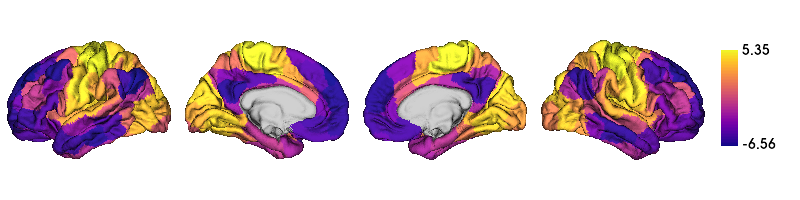

In [157]:
# Plotting all expression PC2
vertexwise = map_to_labels(
    -fcgradient01_parc,
    schaefer,
    mask=schaefer != 0,
    fill=np.nan,
)
plot_hemispheres(
    surfaces[0],
    surfaces[1],
    vertexwise,
    cmap='plasma',
    color_bar=True,
    embed_nb=True,
    size=(800, 200),
    zoom=1.2,
    scale=(1,1),
    nan_color=(0.7, 0.7, 0.7, 1), # makes NA's grey 
    layout_style='row', # alternative is grid
    cb__labelTextProperty={"fontSize": 14},
)

<IPython.core.display.Javascript object>

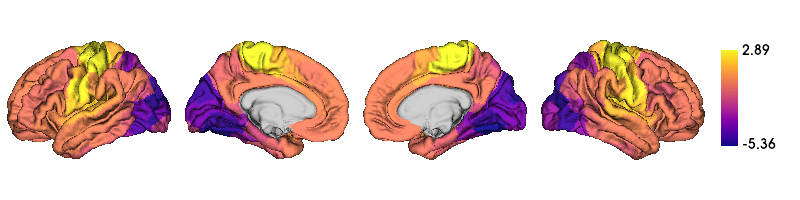

In [158]:
# Plotting all expression PC2
vertexwise = map_to_labels(
    -fcgradient02_parc,
    schaefer,
    mask=schaefer != 0,
    fill=np.nan,
)
plot_hemispheres(
    surfaces[0],
    surfaces[1],
    vertexwise,
    cmap='plasma',
    color_bar=True,
    embed_nb=True,
    size=(800, 200),
    zoom=1.2,
    scale=(1,1),
    nan_color=(0.7, 0.7, 0.7, 1), # makes NA's grey 
    layout_style='row', # alternative is grid
    cb__labelTextProperty={"fontSize": 14},
)

<IPython.core.display.Javascript object>

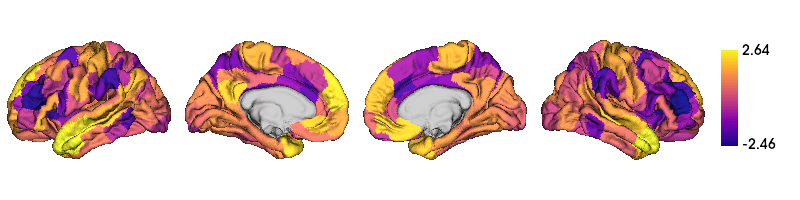

In [159]:
# Plotting all expression PC2
vertexwise = map_to_labels(
    -fcgradient03_parc,
    schaefer,
    mask=schaefer != 0,
    fill=np.nan,
)
plot_hemispheres(
    surfaces[0],
    surfaces[1],
    vertexwise,
    cmap='plasma',
    color_bar=True,
    embed_nb=True,
    size=(800, 200),
    zoom=1.2,
    scale=(1,1),
    nan_color=(0.7, 0.7, 0.7, 1), # makes NA's grey 
    layout_style='row', # alternative is grid
    cb__labelTextProperty={"fontSize": 14},
)

<IPython.core.display.Javascript object>

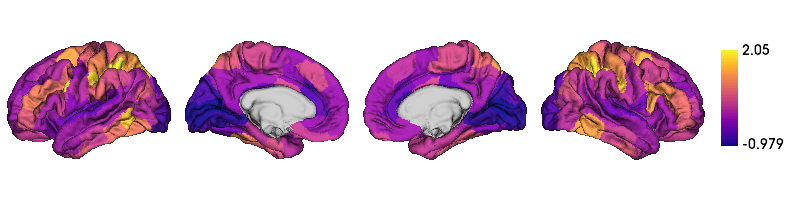

In [160]:
# Plotting all expression PC2
vertexwise = map_to_labels(
    -fcgradient04_parc,
    schaefer,
    mask=schaefer != 0,
    fill=np.nan,
)
plot_hemispheres(
    surfaces[0],
    surfaces[1],
    vertexwise,
    cmap='plasma',
    color_bar=True,
    embed_nb=True,
    size=(800, 200),
    zoom=1.2,
    scale=(1,1),
    nan_color=(0.7, 0.7, 0.7, 1), # makes NA's grey 
    layout_style='row', # alternative is grid
    cb__labelTextProperty={"fontSize": 14},
)

<IPython.core.display.Javascript object>

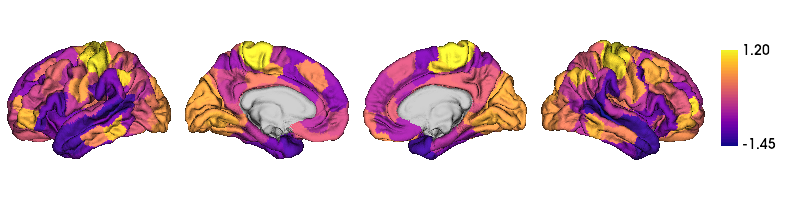

In [161]:
# Plotting all expression PC2
vertexwise = map_to_labels(
    -fcgradient05_parc,
    schaefer,
    mask=schaefer != 0,
    fill=np.nan,
)
plot_hemispheres(
    surfaces[0],
    surfaces[1],
    vertexwise,
    cmap='plasma',
    color_bar=True,
    embed_nb=True,
    size=(800, 200),
    zoom=1.2,
    scale=(1,1),
    nan_color=(0.7, 0.7, 0.7, 1), # makes NA's grey 
    layout_style='row', # alternative is grid
    cb__labelTextProperty={"fontSize": 14},
)

# OTHER MAPS FOR COMPARISON

<IPython.core.display.Javascript object>

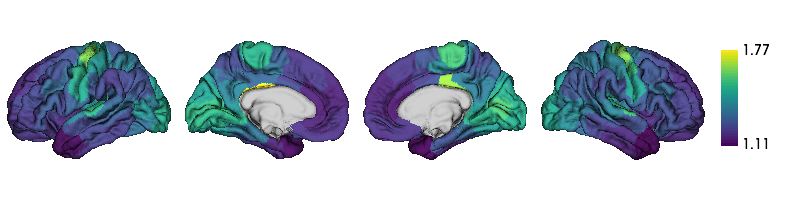

In [162]:
# Plotting all expression PC2
vertexwise = map_to_labels(
    myelinmap_parc,
    schaefer,
    mask=schaefer != 0,
    fill=np.nan,
)
plot_hemispheres(
    surfaces[0],
    surfaces[1],
    vertexwise,
    color_bar=True,
    embed_nb=True,
    size=(800, 200),
    zoom=1.2,
    scale=(1,1),
    nan_color=(0.7, 0.7, 0.7, 1), # makes NA's grey 
    layout_style='row', # alternative is grid
    cb__labelTextProperty={"fontSize": 14},
)

<IPython.core.display.Javascript object>

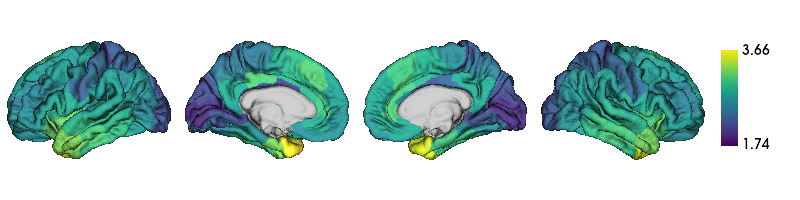

In [163]:
# Plotting all expression PC2
vertexwise = map_to_labels(
    thickness_parc,
    schaefer,
    mask=schaefer != 0,
    fill=np.nan,
)
plot_hemispheres(
    surfaces[0],
    surfaces[1],
    vertexwise,
    color_bar=True,
    embed_nb=True,
    size=(800, 200),
    zoom=1.2,
    scale=(1,1),
    nan_color=(0.7, 0.7, 0.7, 1), # makes NA's grey 
    layout_style='row', # alternative is grid
    cb__labelTextProperty={"fontSize": 14},
)

<IPython.core.display.Javascript object>

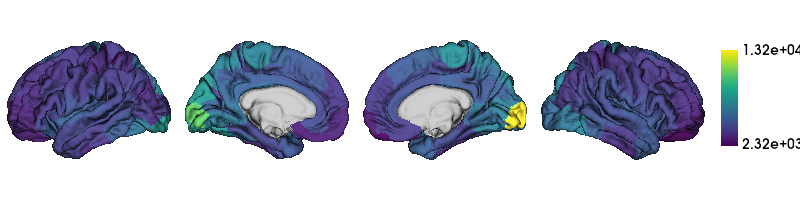

In [164]:
# Plotting all expression PC2
vertexwise = map_to_labels(
    cbv_parc,
    schaefer,
    mask=schaefer != 0,
    fill=np.nan,
)
plot_hemispheres(
    surfaces[0],
    surfaces[1],
    vertexwise,
    color_bar=True,
    embed_nb=True,
    size=(800, 200),
    zoom=1.2,
    scale=(1,1),
    nan_color=(0.7, 0.7, 0.7, 1), # makes NA's grey 
    layout_style='row', # alternative is grid
    cb__labelTextProperty={"fontSize": 14},
)

<IPython.core.display.Javascript object>

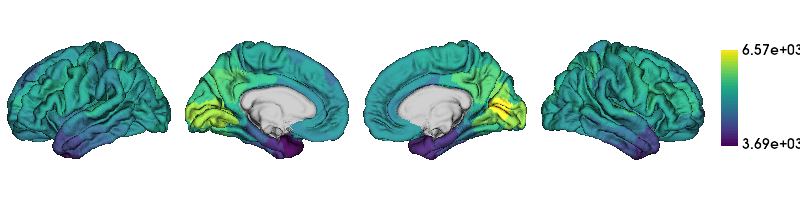

In [165]:
# Plotting all expression PC2
vertexwise = map_to_labels(
    cmr02_parc,
    schaefer,
    mask=schaefer != 0,
    fill=np.nan,
)
plot_hemispheres(
    surfaces[0],
    surfaces[1],
    vertexwise,
    color_bar=True,
    embed_nb=True,
    size=(800, 200),
    zoom=1.2,
    scale=(1,1),
    nan_color=(0.7, 0.7, 0.7, 1), # makes NA's grey 
    layout_style='row', # alternative is grid
    cb__labelTextProperty={"fontSize": 14},
)

<IPython.core.display.Javascript object>

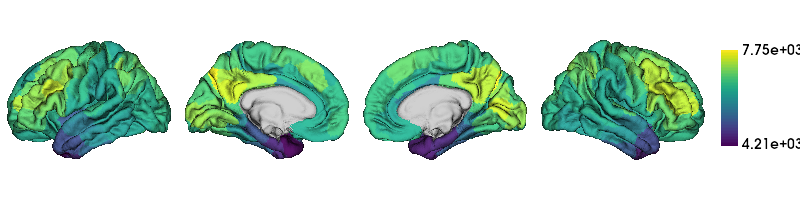

In [166]:
# Plotting all expression PC2
vertexwise = map_to_labels(
    cmruglu_parc,
    schaefer,
    mask=schaefer != 0,
    fill=np.nan,
)
plot_hemispheres(
    surfaces[0],
    surfaces[1],
    vertexwise,
    color_bar=True,
    embed_nb=True,
    size=(800, 200),
    zoom=1.2,
    scale=(1,1),
    nan_color=(0.7, 0.7, 0.7, 1), # makes NA's grey 
    layout_style='row', # alternative is grid
    cb__labelTextProperty={"fontSize": 14},
)

<IPython.core.display.Javascript object>

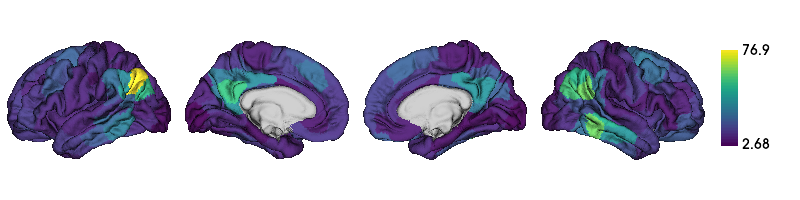

In [167]:
# Plotting all expression PC2
vertexwise = map_to_labels(
    evoexp_xu_parc,
    schaefer,
    mask=schaefer != 0,
    fill=np.nan,
)
plot_hemispheres(
    surfaces[0],
    surfaces[1],
    vertexwise,
    color_bar=True,
    embed_nb=True,
    size=(800, 200),
    zoom=1.2,
    scale=(1,1),
    nan_color=(0.7, 0.7, 0.7, 1), # makes NA's grey 
    layout_style='row', # alternative is grid
    cb__labelTextProperty={"fontSize": 14},
)

# Regression 

In [168]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [169]:
df = pd.DataFrame({'genepc1': genepc1_parc[0:200],
                   'PC1_exp': PC1_exp[0:200],
                   'PC2_exp': PC2_exp[0:200],
                   'PC3_exp': PC3_exp[0:200],
                   'PC4_exp': PC4_exp[0:200],
                   'PC1_gene': PC1_gene[0:200],
                   'PC2_gene': PC2_gene[0:200],
                   'PC3_gene': PC3_gene[0:200],
                   'PC4_gene': PC4_gene[0:200],
                   'myelinmap': myelinmap_parc[0:200],
                   'thickness': thickness_parc[0:200],
                   'cbf': cbf_parc[0:200],
                   'meancbf': meancbf_parc[0:200],
                   'cbv': cbv_parc[0:200],
                   'cmr02': cmr02_parc[0:200],
                   'cmruglu': cmruglu_parc[0:200],
                   'intersubjvar': intersubjvar_parc[0:200],
                   'cogpc1': cogpc1_parc[0:200],
                   'fcgradient01': fcgradient01_parc[0:200],
                   'fcgradient02': fcgradient02_parc[0:200],
                   'fcgradient03': fcgradient03_parc[0:200],
                   'fcgradient04': fcgradient04_parc[0:200],
                   'fcgradient05': fcgradient05_parc[0:200],
                   'fcgradient06': fcgradient06_parc[0:200],
                   'fcgradient07': fcgradient07_parc[0:200],
                   'fcgradient08': fcgradient08_parc[0:200],
                   'fcgradient09': fcgradient09_parc[0:200],
                   'fcgradient010': fcgradient10_parc[0:200],
                   # 'evoexp_hill': evoexp_hill_parc[0:200], (only 1 hemi supplied, fix)
                   'evoexp_xu': evoexp_xu_parc[0:200],
                   #'devexp': devexp_parc[0:200], (only 1 hemi supplied, fix)
                   'scalingnih': scalingnih_parc[0:200],
                   'scalingpnc': scalingpnc_parc[0:200],
                   'scalinghcp': scalinghcp_parc[0:200],
                   'megdelta': megdelta_parc[0:200],
                   'megtheta': megtheta_parc[0:200],
                   'megalpha': megalpha_parc[0:200],
                   'megbeta': megbeta_parc[0:200],
                   'meggamma1': meggamma1_parc[0:200],
                   'meggamma2': meggamma2_parc[0:200],
                   'megtimescale': megtimescale_parc[0:200],
                   'carfentanil_kantonen': carfentanil_kantonen_parc[0:200],
                   'carfentanil_turtonen': carfentanil_turtonen_parc[0:200],
                   'lsn3172176': lsn3172176_parc[0:200],
                   'way100635': way100635_parc[0:200],
                   'abp688_dubois': abp688_dubois_parc[0:200],
                   'abp688_rosaneto': abp688_rosaneto_parc[0:200],
                   'abp688_smart': abp688_smart_parc[0:200],
                   'altanserin': altanserin_parc[0:200],
                   'az10419369': az10419369_parc[0:200],
                   'cimbi36': cimbi36_parc[0:200],
                   'cumi101': cumi101_parc[0:200],
                   'dasb_beliveau': dasb_beliveau_parc[0:200],
                   'dasb_savli': dasb_savli_parc[0:200],
                   'fallypride1': fallypride1_parc[0:200],
                   'FChomology': FChomology_parc[0:200],
                   'feobv_aghourian': feobv_aghourian_parc[0:200],
                   'feobv_bedard': feobv_bedard_parc[0:200],
                   'feobv_tuominen': feobv_tuominen_parc[0:200],
                   'fepe2i': fepe2i_parc[0:200],
                   'flb457_sandiego': flb457_sandiego_parc[0:200],
                   'flb457_smith': flb457_smith_parc[0:200],
                   'flubatine': flubatine_parc[0:200],
                   'flumazenil_dukart': flumazenil_dukart_parc[0:200],
                   'fmpepd2': fmpepd2_parc[0:200],
                   'fpcit': fpcit_parc[0:200],
                   'gsk215083': gsk215083_parc[0:200],
                   'gsk189254': gsk189254_parc[0:200],
                   'madam': madam_parc[0:200],
                   'methylreboxetine': methylreboxetine_parc[0:200],
                   'mrb': mrb_parc[0:200],
                   'omar': omar_parc[0:200],
                   'p943_gallezot': p943_gallezot_parc[0:200],
                   'p943_savli': p943_savli_parc[0:200],
                   'raclopride': raclopride_parc[0:200],
                   'SAaxis': SAaxis_parc[0:200],
                   'sb207145': sb207145_parc[0:200],
                   'sch23390': sch23390_parc[0:200],
                   'ucbj': ucbj_parc[0:200],
                   'tau_diff': tau_diff[0:200]
})
df.head()


<IPython.core.display.Javascript object>

genepc1   PC1_exp   PC2_exp   PC3_exp   PC4_exp  PC1_gene  PC2_gene  \
0  0.715417  0.429720 -0.357487 -1.134923  1.706228 -0.458190  0.138466   
1  1.670555  1.509218 -0.958748 -0.887719  0.042366 -1.558723 -0.366281   
2  0.558935  0.719661 -1.406354 -0.405381  0.329528 -0.704925 -1.073043   
3  2.151379  2.257864 -0.523655  0.105793  1.016550 -1.862647  0.675307   
4  2.149589  2.065628 -0.813626  1.126694 -0.136231 -1.449005  0.500494   

   PC3_gene  PC4_gene  myelinmap  ...       mrb      omar  p943_gallezot  \
0  1.009704 -2.052932   1.376906  ...  0.013844  1.264230       0.713021   
1  1.727319  0.151742   1.443711  ...  0.028011  1.246194       0.846013   
2  1.363086  0.389880   1.332497  ...  0.010367  1.230817       0.739297   
3  0.881457  0.136173   1.509792  ... -0.079092  1.101131       0.762205   
4  0.105605  1.281471   1.494526  ...  0.060294  1.248860       1.040182   

   p943_savli  raclopride    SAaxis  sb207145   sch23390      ucbj  tau_diff  
0   16.812817   19.585485 -1.022242  1.623433  17.751003  3.945719  1.797318  
1   30.634106   20.115263 -1.231583  1.421550  15.237667  3.975116  1.641049  
2   40.626358   20.925827 -0.449250  1.691888  15.082073  3.170876  2.071181  
3   48.168339   18.634007 -1.479786  1.246808  17.890377  3.013920  1.347993  
4   35.478001   19.487585 -1.162819  0.848270   9.651718  3.730988  0.847720  

[5 rows x 78 columns]

In [170]:
observed = df.iloc[:, 0:9]
predictors = df.iloc[:, 9:]
observed.head()

genepc1   PC1_exp   PC2_exp   PC3_exp   PC4_exp  PC1_gene  PC2_gene  \
0  0.715417  0.429720 -0.357487 -1.134923  1.706228 -0.458190  0.138466   
1  1.670555  1.509218 -0.958748 -0.887719  0.042366 -1.558723 -0.366281   
2  0.558935  0.719661 -1.406354 -0.405381  0.329528 -0.704925 -1.073043   
3  2.151379  2.257864 -0.523655  0.105793  1.016550 -1.862647  0.675307   
4  2.149589  2.065628 -0.813626  1.126694 -0.136231 -1.449005  0.500494   

   PC3_gene  PC4_gene  
0  1.009704 -2.052932  
1  1.727319  0.151742  
2  1.363086  0.389880  
3  0.881457  0.136173  
4  0.105605  1.281471

In [171]:
predictors.head()

myelinmap  thickness          cbf    meancbf          cbv        cmr02  \
0   1.376906   2.640251  5609.439453  53.053677  4543.202637  5290.866699   
1   1.443711   2.522920  6173.499512  52.384998  7777.021484  5671.038574   
2   1.332497   2.740239  5488.374023  59.092693  6294.683105  5072.712402   
3   1.509792   2.271831  6603.973145  60.438709  6607.477539  6138.524414   
4   1.494526   2.239628  5781.825684  59.336472  8015.806641  5312.370605   

       cmruglu  intersubjvar    cogpc1  fcgradient01  ...       mrb      omar  \
0  5979.313477      0.569494 -0.000289     -3.890635  ...  0.013844  1.264230   
1  6752.019531      0.567360  0.000072     -4.158072  ...  0.028011  1.246194   
2  6161.428711      0.590045  0.001533     -3.455742  ...  0.010367  1.230817   
3  7045.925293      0.555703 -0.000317     -4.376265  ... -0.079092  1.101131   
4  6403.733887      0.587420  0.000184     -0.126835  ...  0.060294  1.248860   

   p943_gallezot  p943_savli  raclopride    SAaxis  sb207145   sch23390  \
0       0.713021   16.812817   19.585485 -1.022242  1.623433  17.751003   
1       0.846013   30.634106   20.115263 -1.231583  1.421550  15.237667   
2       0.739297   40.626358   20.925827 -0.449250  1.691888  15.082073   
3       0.762205   48.168339   18.634007 -1.479786  1.246808  17.890377   
4       1.040182   35.478001   19.487585 -1.162819  0.848270   9.651718   

       ucbj  tau_diff  
0  3.945719  1.797318  
1  3.975116  1.641049  
2  3.170876  2.071181  
3  3.013920  1.347993  
4  3.730988  0.847720  

[5 rows x 69 columns]

In [172]:
std_scaler = StandardScaler()

# Fit and transform the dataframe
scaled_predictors = std_scaler.fit_transform(predictors)

# Convert the array back to a dataframe
scaled_predictors = pd.DataFrame(scaled_predictors, columns=predictors.columns)

scaled_predictors.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

myelinmap  thickness       cbf   meancbf       cbv     cmr02   cmruglu  \
0   0.413541  -0.019318 -0.970243 -0.808573 -0.159505  0.259852 -0.793542   
1   0.957253  -0.383637  0.443633 -0.867436  2.439284  1.252129  0.464564   
2   0.052106   0.291151 -1.273706 -0.276962  1.248035 -0.309546 -0.497025   
3   1.495073  -1.163280  1.522660 -0.158473  1.499405  2.472302  0.943096   
4   1.370823  -1.263272 -0.538138 -0.255502  2.631179  0.315979 -0.102508   

   intersubjvar    cogpc1  fcgradient01  ...       mrb      omar  \
0     -1.259527 -0.294793     -0.953026  ... -0.606674 -0.316824   
1     -1.327714 -0.126746     -1.022858  ... -0.411034 -0.481045   
2     -0.603024  0.554366     -0.839468  ... -0.654675 -0.621064   
3     -1.700082 -0.308158     -1.079832  ... -1.889999 -1.801896   
4     -0.686899 -0.074293      0.029768  ...  0.034743 -0.456776   

   p943_gallezot  p943_savli  raclopride    SAaxis  sb207145  sch23390  \
0      -0.958715   -1.873313   -0.384923 -1.091606  0.582501  0.866483   
1      -0.313435   -0.541684    0.040845 -1.313711  0.001622  0.194704   
2      -0.831224    0.421031    0.692273 -0.483679  0.779466  0.153116   
3      -0.720074    1.147672   -1.149600 -1.577047 -0.501164  0.903736   
4       0.628681   -0.074993   -0.463603 -1.240754 -1.647879 -1.298340   

       ucbj  tau_diff  
0  0.576543  1.021609  
1  0.619190  0.733041  
2 -0.547567  1.527329  
3 -0.775273  0.191881  
4  0.265020 -0.731929  

[5 rows x 69 columns]

In [173]:
std_df = pd.concat([observed,scaled_predictors], axis=1)
std_df = pd.DataFrame(std_df)
std_df.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

genepc1   PC1_exp   PC2_exp   PC3_exp   PC4_exp  PC1_gene  PC2_gene  \
0  0.715417  0.429720 -0.357487 -1.134923  1.706228 -0.458190  0.138466   
1  1.670555  1.509218 -0.958748 -0.887719  0.042366 -1.558723 -0.366281   
2  0.558935  0.719661 -1.406354 -0.405381  0.329528 -0.704925 -1.073043   
3  2.151379  2.257864 -0.523655  0.105793  1.016550 -1.862647  0.675307   
4  2.149589  2.065628 -0.813626  1.126694 -0.136231 -1.449005  0.500494   

   PC3_gene  PC4_gene  myelinmap  ...       mrb      omar  p943_gallezot  \
0  1.009704 -2.052932   0.413541  ... -0.606674 -0.316824      -0.958715   
1  1.727319  0.151742   0.957253  ... -0.411034 -0.481045      -0.313435   
2  1.363086  0.389880   0.052106  ... -0.654675 -0.621064      -0.831224   
3  0.881457  0.136173   1.495073  ... -1.889999 -1.801896      -0.720074   
4  0.105605  1.281471   1.370823  ...  0.034743 -0.456776       0.628681   

   p943_savli  raclopride    SAaxis  sb207145  sch23390      ucbj  tau_diff  
0   -1.873313   -0.384923 -1.091606  0.582501  0.866483  0.576543  1.021609  
1   -0.541684    0.040845 -1.313711  0.001622  0.194704  0.619190  0.733041  
2    0.421031    0.692273 -0.483679  0.779466  0.153116 -0.547567  1.527329  
3    1.147672   -1.149600 -1.577047 -0.501164  0.903736 -0.775273  0.191881  
4   -0.074993   -0.463603 -1.240754 -1.647879 -1.298340  0.265020 -0.731929  

[5 rows x 78 columns]

In [174]:
std_df_int = sm.add_constant(std_df, prepend=False) # add constant term

# fit the model with standardized data
results_pc1 = smf.glm(formula = 'genepc1 ~ fcgradient01 + fcgradient02 + fcgradient03 + fcgradient04 + fcgradient05',
                                    data=std_df_int).fit()

results_pc1_exp = smf.glm(formula = 'PC1_exp ~ fcgradient01 + fcgradient02 + fcgradient03 + fcgradient04 + fcgradient05',
                                    data=std_df_int).fit()
results_pc2_exp = smf.glm(formula = 'PC2_exp ~ fcgradient01 + fcgradient02 + fcgradient03 + fcgradient04 + fcgradient05',
                                    data=std_df_int).fit()
results_pc3_exp = smf.glm(formula = 'PC3_exp ~ fcgradient01 + fcgradient02 + fcgradient03 + fcgradient04 + fcgradient05',
                                    data=std_df_int).fit()
results_pc4_exp = smf.glm(formula = 'PC4_exp ~ fcgradient01 + fcgradient02 + fcgradient03 + fcgradient04 + fcgradient05',
                                    data=std_df_int).fit()


results_pc1_gene = smf.glm(formula = 'PC1_gene ~ fcgradient01 + fcgradient02 + fcgradient03 + fcgradient04 + fcgradient05',
                                    data=std_df_int).fit()
results_pc2_gene = smf.glm(formula = 'PC2_gene ~ fcgradient01 + fcgradient02 + fcgradient03 + fcgradient04 + fcgradient05',
                                    data=std_df_int).fit()
results_pc3_gene = smf.glm(formula = 'PC3_gene ~ fcgradient01 + fcgradient02 + fcgradient03 + fcgradient04 + fcgradient05',
                                    data=std_df_int).fit()
results_pc4_gene = smf.glm(formula = 'PC4_gene ~ fcgradient01 + fcgradient02 + fcgradient03 + fcgradient04 + fcgradient05',
                                    data=std_df_int).fit()

print(results_pc1_exp.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                PC1_exp   No. Observations:                  200
Model:                            GLM   Df Residuals:                      194
Model Family:                Gaussian   Df Model:                            5
Link Function:               identity   Scale:                         0.44444
Method:                          IRLS   Log-Likelihood:                -199.65
Date:                Wed, 25 Jan 2023   Deviance:                       86.220
Time:                        10:55:45   Pearson chi2:                     86.2
No. Iterations:                     3   Pseudo R-squ. (CS):             0.7221
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2.082e-17      0.047   4.42e-16   

In [175]:
#extract p-values for all predictor variables
p_pc1_exp=pd.DataFrame(results_pc1_exp.pvalues).T.rename(index={0: "PC1"})
p_pc2_exp=pd.DataFrame(results_pc2_exp.pvalues).T.rename(index={0: "PC2"})
p_pc3_exp=pd.DataFrame(results_pc3_exp.pvalues).T.rename(index={0: "PC3"})
p_pc4_exp=pd.DataFrame(results_pc4_exp.pvalues).T.rename(index={0: "PC4"})
p_pc1_gene=pd.DataFrame(results_pc1_gene.pvalues).T.rename(index={0: "PC1"})
p_pc2_gene=pd.DataFrame(results_pc2_gene.pvalues).T.rename(index={0: "PC2"})
p_pc3_gene=pd.DataFrame(results_pc3_gene.pvalues).T.rename(index={0: "PC3"})
p_pc4_gene=pd.DataFrame(results_pc4_gene.pvalues).T.rename(index={0: "PC4"})
WBExp_p_df = pd.concat([p_pc1_exp,p_pc2_exp,p_pc3_exp], axis=0)
ADExp_p_df = pd.concat([p_pc1_gene,p_pc2_gene,p_pc3_gene], axis=0)

WBExp_p_df.drop(WBExp_p_df.columns[0], axis=1, inplace=True)
ADExp_p_df.drop(ADExp_p_df.columns[0], axis=1, inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [176]:
# Extract the standardized betas
betas_std_pc1 = pd.DataFrame(results_pc1.params).T.rename(index={0: "PC1"})

betas_std_pc1_exp = pd.DataFrame(results_pc1_exp.params).T.rename(index={0: "PC1"})
betas_std_pc2_exp = pd.DataFrame(results_pc2_exp.params).T.rename(index={0: "PC2"})
betas_std_pc3_exp = pd.DataFrame(results_pc3_exp.params).T.rename(index={0: "PC3"})
betas_std_pc4_exp = pd.DataFrame(results_pc4_exp.params).T.rename(index={0: "PC4"})

betas_std_pc1_gene = pd.DataFrame(results_pc1_gene.params).T.rename(index={0: "PC1"})
betas_std_pc2_gene = pd.DataFrame(results_pc2_gene.params).T.rename(index={0: "PC2"})
betas_std_pc3_gene = pd.DataFrame(results_pc3_gene.params).T.rename(index={0: "PC3"})
betas_std_pc4_gene = pd.DataFrame(results_pc4_gene.params).T.rename(index={0: "PC4"})

WBExp_beta_df = pd.concat([betas_std_pc1_exp,betas_std_pc2_exp,betas_std_pc3_exp], axis=0)
ADExp_beta_df = pd.concat([betas_std_pc1_gene,betas_std_pc2_gene,betas_std_pc3_gene], axis=0)

WBExp_beta_df.drop(WBExp_beta_df.columns[0], axis=1, inplace=True)
ADExp_beta_df.drop(ADExp_beta_df.columns[0], axis=1, inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

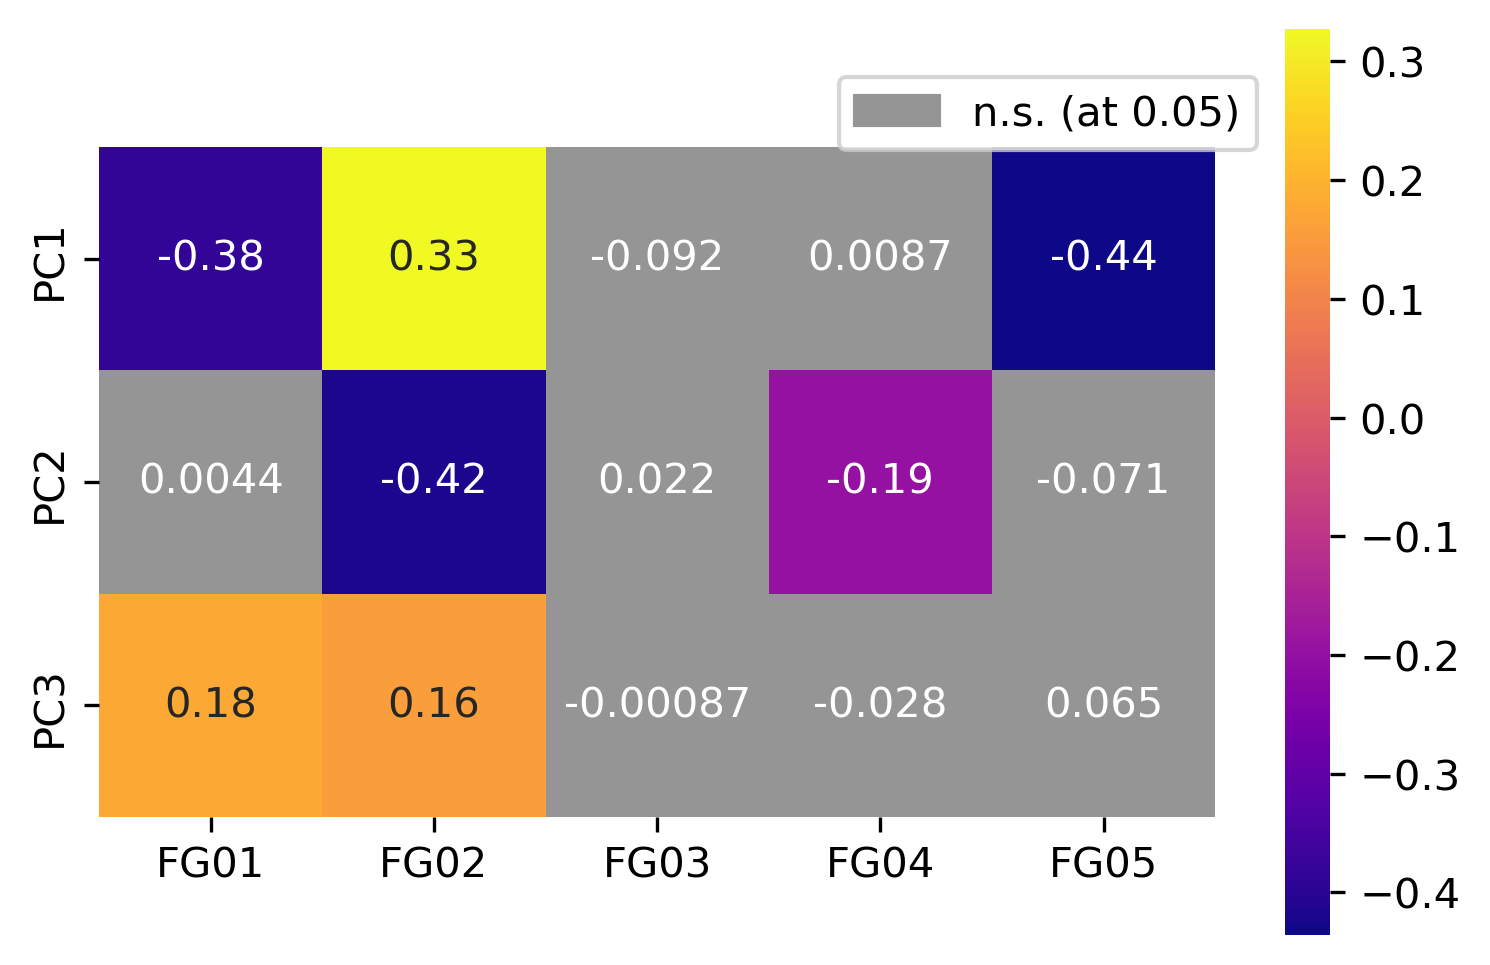

In [177]:
import matplotlib.patches as mpatches

mask = np.where(WBExp_p_df > 0.05, True, False)
mask1 = np.where(WBExp_p_df > 0.05, False, True) 

# Create the heatmap
x_axis_labels = ['FG01', 'FG02', 'FG03', 'FG04', 'FG05'] # labels for x-axis
sns.heatmap(WBExp_beta_df, xticklabels=x_axis_labels, mask=mask, cmap='plasma', annot=True)
# add another heatmap with colouring the non-significant cells
sns.heatmap(WBExp_beta_df, xticklabels=x_axis_labels, mask=mask1, annot=True, square=True, cbar=False, 
            cmap=sns.color_palette("Greys", n_colors=1, desat=1))

# add a label for the colour
# https://stackoverflow.com/questions/44098362/using-mpatches-patch-for-a-custom-legend
colors = [sns.color_palette("Greys", n_colors=1, desat=1)[0]]
texts = [f"n.s. (at 0.05)"]
patches = [ mpatches.Patch(color=colors[i], label="{:s}".format(texts[i]) ) for i in range(len(texts)) ]
plt.legend(handles=patches, bbox_to_anchor=(.85, 1.05), loc='center')

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

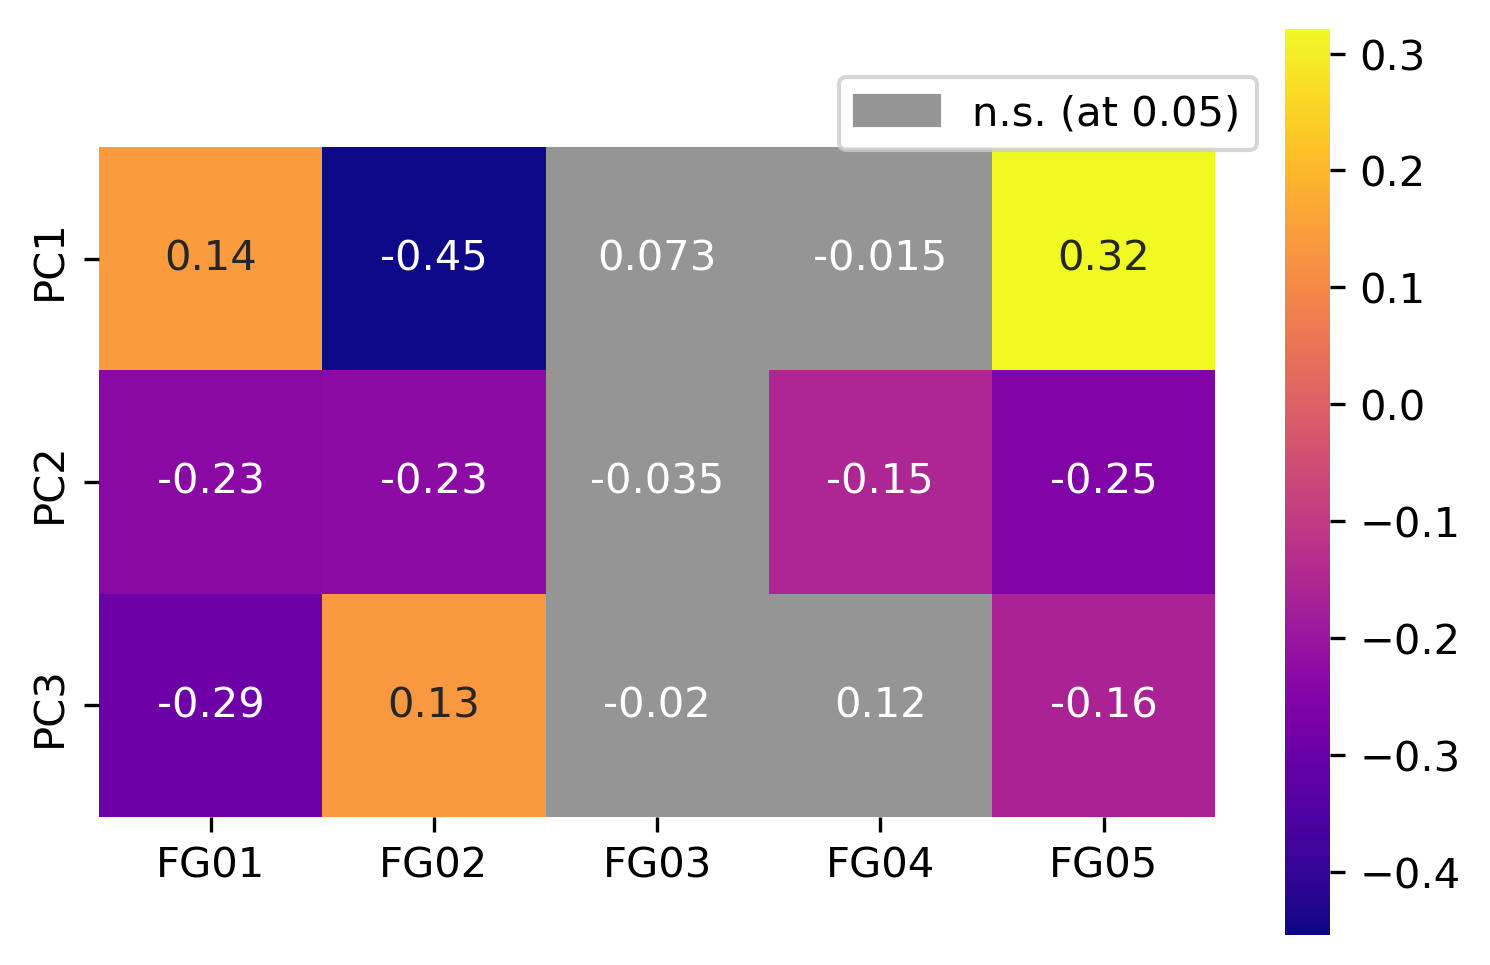

In [178]:
mask = np.where(ADExp_p_df > 0.05, True, False)
mask1 = np.where(ADExp_p_df < 0.05, True, False) 

# Create the heatmap
sns.heatmap(ADExp_beta_df, xticklabels=x_axis_labels, mask=mask, cmap='plasma', annot=True)
# Show the plot

# add another heatmap with colouring the non-significant cells
sns.heatmap(ADExp_beta_df, xticklabels=x_axis_labels, mask=mask1, annot=True, square=True, cbar=False, 
            cmap=sns.color_palette("Greys", n_colors=1, desat=1))

psig=0.05

# add a label for the colour
# https://stackoverflow.com/questions/44098362/using-mpatches-patch-for-a-custom-legend
colors = [sns.color_palette("Greys", n_colors=1, desat=1)[0]]
texts = [f"n.s. (at {psig})"]
patches = [ mpatches.Patch(color=colors[i], label="{:s}".format(texts[i]) ) for i in range(len(texts)) ]
plt.legend(handles=patches, bbox_to_anchor=(.85, 1.05), loc='center')

plt.show()

In [179]:
std_df_int = sm.add_constant(std_df, prepend=False) # add constant term

# fit the model with standardized data
results_pc1 = smf.glm(formula = 'genepc1 ~ myelinmap + thickness + cbv + cmr02 + cmruglu + evoexp_xu',
                                    data=std_df_int).fit()

results_pc1_exp = smf.glm(formula = 'PC1_exp ~ myelinmap + thickness + cbv + cmr02 + cmruglu + evoexp_xu',
                                    data=std_df_int).fit()
results_pc2_exp = smf.glm(formula = 'PC2_exp ~ myelinmap + thickness + cbv + cmr02 + cmruglu + evoexp_xu',
                                    data=std_df_int).fit()
results_pc3_exp = smf.glm(formula = 'PC3_exp ~ myelinmap + thickness + cbv + cmr02 + cmruglu + evoexp_xu',
                                    data=std_df_int).fit()
results_pc4_exp = smf.glm(formula = 'PC4_exp ~ myelinmap + thickness + cbv + cmr02 + cmruglu + evoexp_xu',
                                    data=std_df_int).fit()


results_pc1_gene = smf.glm(formula = 'PC1_gene ~ myelinmap + thickness + cbv + cmr02 + cmruglu + evoexp_xu',
                                    data=std_df_int).fit()
results_pc2_gene = smf.glm(formula = 'PC2_gene ~ myelinmap + thickness + cbv + cmr02 + cmruglu + evoexp_xu',
                                    data=std_df_int).fit()
results_pc3_gene = smf.glm(formula = 'PC3_gene ~ myelinmap + thickness + cbv + cmr02 + cmruglu + evoexp_xu',
                                    data=std_df_int).fit()
results_pc4_gene = smf.glm(formula = 'PC4_gene ~ myelinmap + thickness + cbv + cmr02 + cmruglu + evoexp_xu',
                                    data=std_df_int).fit()
print(results_pc1_exp.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                PC1_exp   No. Observations:                  200
Model:                            GLM   Df Residuals:                      193
Model Family:                Gaussian   Df Model:                            6
Link Function:               identity   Scale:                         0.23052
Method:                          IRLS   Log-Likelihood:                -133.48
Date:                Wed, 25 Jan 2023   Deviance:                       44.490
Time:                        10:55:46   Pearson chi2:                     44.5
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9657
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.082e-17      0.034   6.13e-16      1.0

In [180]:
#extract p-values for all predictor variables
p_pc1_exp=pd.DataFrame(results_pc1_exp.pvalues).T.rename(index={0: "PC1"})
p_pc2_exp=pd.DataFrame(results_pc2_exp.pvalues).T.rename(index={0: "PC2"})
p_pc3_exp=pd.DataFrame(results_pc3_exp.pvalues).T.rename(index={0: "PC3"})
p_pc4_exp=pd.DataFrame(results_pc4_exp.pvalues).T.rename(index={0: "PC4"})
p_pc1_gene=pd.DataFrame(results_pc1_gene.pvalues).T.rename(index={0: "PC1"})
p_pc2_gene=pd.DataFrame(results_pc2_gene.pvalues).T.rename(index={0: "PC2"})
p_pc3_gene=pd.DataFrame(results_pc3_gene.pvalues).T.rename(index={0: "PC3"})
p_pc4_gene=pd.DataFrame(results_pc4_gene.pvalues).T.rename(index={0: "PC4"})
WBExp_p_df = pd.concat([p_pc1_exp,p_pc2_exp,p_pc3_exp], axis=0)
ADExp_p_df = pd.concat([p_pc1_gene,p_pc2_gene,p_pc3_gene], axis=0)

WBExp_p_df.drop(WBExp_p_df.columns[0], axis=1, inplace=True)
ADExp_p_df.drop(ADExp_p_df.columns[0], axis=1, inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [181]:
# Extract the standardized betas
betas_std_pc1 = pd.DataFrame(results_pc1.params).T.rename(index={0: "PC1"})

betas_std_pc1_exp = pd.DataFrame(results_pc1_exp.params).T.rename(index={0: "PC1"})
betas_std_pc2_exp = pd.DataFrame(results_pc2_exp.params).T.rename(index={0: "PC2"})
betas_std_pc3_exp = pd.DataFrame(results_pc3_exp.params).T.rename(index={0: "PC3"})
betas_std_pc4_exp = pd.DataFrame(results_pc4_exp.params).T.rename(index={0: "PC4"})

betas_std_pc1_gene = pd.DataFrame(results_pc1_gene.params).T.rename(index={0: "PC1"})
betas_std_pc2_gene = pd.DataFrame(results_pc2_gene.params).T.rename(index={0: "PC2"})
betas_std_pc3_gene = pd.DataFrame(results_pc3_gene.params).T.rename(index={0: "PC3"})
betas_std_pc4_gene = pd.DataFrame(results_pc4_gene.params).T.rename(index={0: "PC4"})

WBExp_beta_df = pd.concat([betas_std_pc1_exp,betas_std_pc2_exp,betas_std_pc3_exp], axis=0)
ADExp_beta_df = pd.concat([betas_std_pc1_gene,betas_std_pc2_gene,betas_std_pc3_gene], axis=0)

WBExp_beta_df.drop(WBExp_beta_df.columns[0], axis=1, inplace=True)
ADExp_beta_df.drop(ADExp_beta_df.columns[0], axis=1, inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

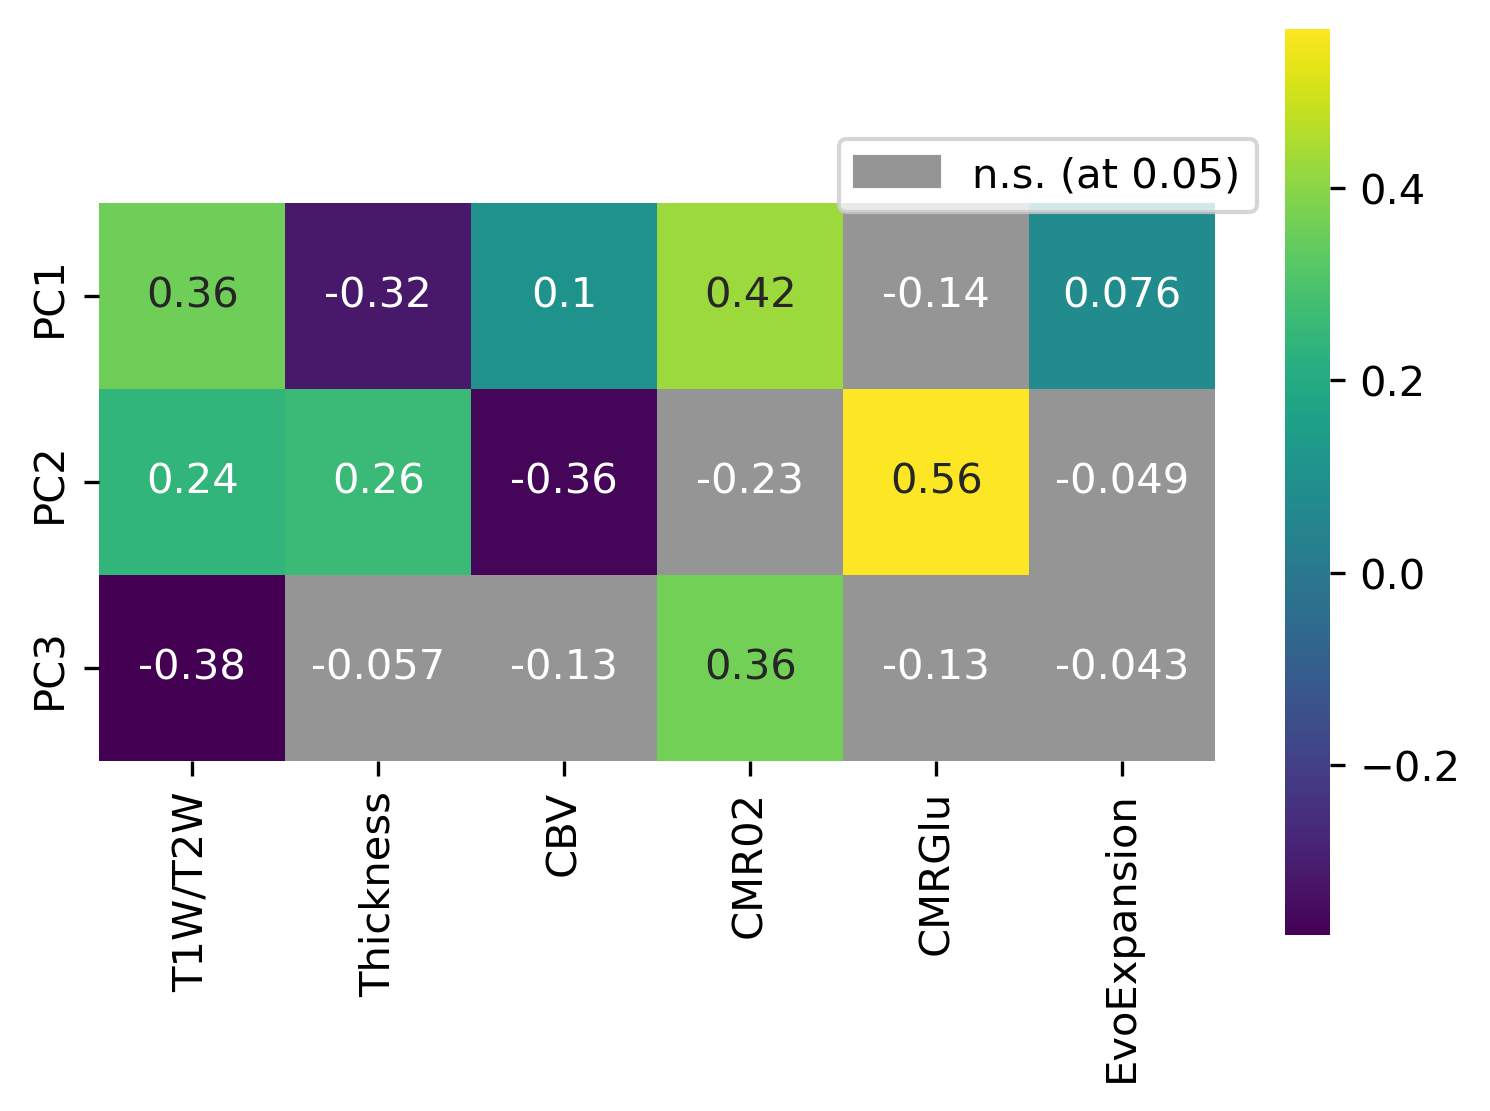

In [182]:
mask = np.where(WBExp_p_df > 0.05, True, False)
mask1 = np.where(WBExp_p_df > 0.05, False, True) 

# Create the heatmap
x_axis_labels = ['T1W/T2W', 'Thickness', 'CBV', 'CMR02', 'CMRGlu', 'EvoExpansion'] # labels for x-axis
sns.heatmap(WBExp_beta_df, xticklabels=x_axis_labels, mask=mask, cmap='viridis', annot=True)
# add another heatmap with colouring the non-significant cells
sns.heatmap(WBExp_beta_df, xticklabels=x_axis_labels, mask=mask1, annot=True, square=True, cbar=False, 
            cmap=sns.color_palette("Greys", n_colors=1, desat=1))

# add a label for the colour
# https://stackoverflow.com/questions/44098362/using-mpatches-patch-for-a-custom-legend
colors = [sns.color_palette("Greys", n_colors=1, desat=1)[0]]
texts = [f"n.s. (at 0.05)"]
patches = [ mpatches.Patch(color=colors[i], label="{:s}".format(texts[i]) ) for i in range(len(texts)) ]
plt.legend(handles=patches, bbox_to_anchor=(.85, 1.05), loc='center')

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

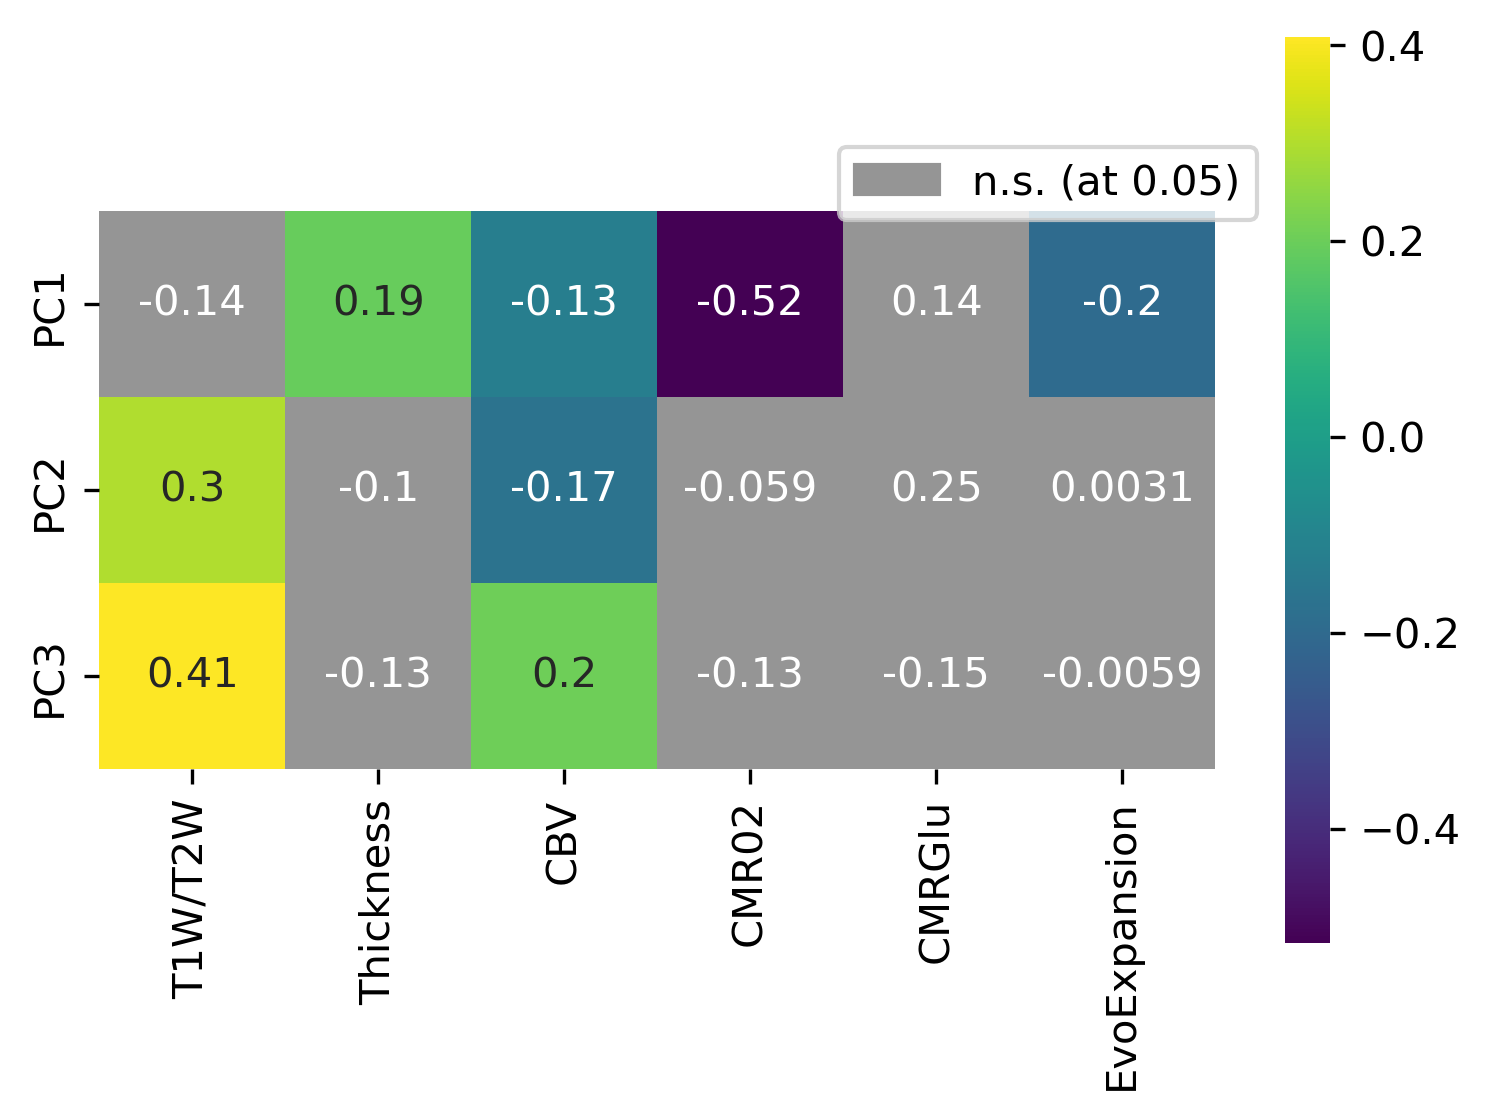

In [183]:
mask = np.where(ADExp_p_df > 0.05, True, False)
mask1 = np.where(ADExp_p_df < 0.05, True, False) 

# Create the heatmap
sns.heatmap(ADExp_beta_df, xticklabels=x_axis_labels, mask=mask, cmap='viridis', annot=True)
# Show the plot

# add another heatmap with colouring the non-significant cells
sns.heatmap(ADExp_beta_df, xticklabels=x_axis_labels, mask=mask1, annot=True, square=True, cbar=False, 
            cmap=sns.color_palette("Greys", n_colors=1, desat=1))

psig=0.05

# add a label for the colour
# https://stackoverflow.com/questions/44098362/using-mpatches-patch-for-a-custom-legend
colors = [sns.color_palette("Greys", n_colors=1, desat=1)[0]]
texts = [f"n.s. (at {psig})"]
patches = [ mpatches.Patch(color=colors[i], label="{:s}".format(texts[i]) ) for i in range(len(texts)) ]
plt.legend(handles=patches, bbox_to_anchor=(.85, 1.05), loc='center')

plt.show()

# Lasso Regression

In [184]:
# creating a class for Lasso Regression

class Lasso_Regression():

  #initiating the hyperparameters
  def __init__(self, learning_rate, no_of_iterations, lambda_parameter):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.lambda_parameter = lambda_parameter


  # fitting the dataset to the Lasso Regression model
  def fit(self, X, Y):

    # m --> number of Data points --> number of rows (200)
    # n --> number of input features(independent) --> number of columns (5 or 6)
    self.m, self.n = X.shape

    self.w = np.zeros(self.n)

    self.b = 0

    self.X = X

    self.Y = Y

    # implementing Gradient Descent algorithm for Optimization
    for i in range(no_of_iterations):
      self.update_weights()


  # function for updating the weight & bias value
  def update_weights(self):

    # linear equation of the model
    Y_prediction = self.predict(self.X)

    # gradients (dw, db)

    # gradient for weight
    dw = np.zeros(self.n)

    for i in range(self.n):

      if self.w[i]>0:

        dw[i] = (-(2*(self.X[:,i]).dot(self.Y - Y_prediction)) + self.lambda_parameter) / self.m 

      else :

        dw[i] = (-(2*(self.X[:,i]).dot(self.Y - Y_prediction)) - self.lambda_parameter) / self.m


    # gradient for bias
    db = - 2 * np.sum(self.Y - Y_prediction) / self.m


    # updating the weights & bias

    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db

    
  # Predicting the Target variable
  def predict(self,X):

    return X.dot(self.w) + self.b


In [217]:
from sklearn.model_selection import RepeatedKFold
# define model
model = Lasso(alpha=1.0)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_other, y_pc1_exp, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))


Mean MAE: 4.811 (0.876)


In [219]:
# define model
model = Lasso(alpha=1.0)
# fit model
model.fit(X_other, y_pc1_exp)
# define new data
# row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]
# make a prediction
yhat = model.predict([y_pc1_exp])
# summarize prediction
print('Predicted: %.3f' % yhat)

Predicted: -29134.200


In [211]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV


# Select x and y variables for regression
X_fcgrad = std_df[['fcgradient01','fcgradient02','fcgradient03','fcgradient04','fcgradient05']]
X_other = std_df[['myelinmap', 'thickness', 'cbv', 'cmr02', 'cmruglu', 'evoexp_xu']]
y_pc1 = std_df['genepc1']
y_pc1_exp = std_df['PC1_exp']
y_pc1_gene = std_df['PC1_gene']

In [ ]:
model = Lasso_Regression()

In [213]:
from sklearn.datasets import make_regression
X_other, y_pc1_gene = make_regression(noise=4, random_state=0)
reg = LassoCV(cv=5, random_state=0).fit(X_other, y_pc1_gene)
reg.score(X_other, y_pc1_gene)
reg.predict(X_other[:1,])

array([-78.495])

In [208]:
# from sklearn import cross_validation
from sklearn.model_selection import train_test_split


# build the lasso model 
model_lasso = Lasso(alpha=1)
lasso_model = LassoCV(alphas=np.arange(0, 1, 0.02), cv=cross_validation , n_jobs=-1)

model_lasso.fit(X_other, y_pc1_exp)
pred_lasso = model_lasso.predict(X_other)

lasso_model.fit(X_other, y_pc1_exp)



<IPython.core.display.Javascript object>

ValueError: Expected cv as an integer, cross-validation object (from sklearn.model_selection) or an iterable. Got <function train_test_split at 0x7f86f0689550>.

In [ ]:
print('alpha: %f' % lasso_model .alpha_)


In [195]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

## Evaluate the lasso model
print(np.sqrt(mean_squared_error(y_pc1_exp,pred_lasso)))
print(r2_score(y_pc1_exp, pred_lasso))
print(np.sqrt(mean_squared_error(y_pc1_exp,pred_lasso)))
print(r2_score(y_pc1_exp, pred_lasso))

<IPython.core.display.Javascript object>

1.0
0.0


<IPython.core.display.Javascript object>

1.0
0.0


In [ ]:
def lasso_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
    lassoreg.fit(data[predictors],data['y'])
    y_pred = lassoreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret


In [358]:
gradients = std_df[['fcgradient01','fcgradient02','fcgradient03','fcgradient04','fcgradient05']]
gradients_matrix = gradients.values

In [359]:
print(gradients_matrix)

[[-0.953  2.357 -0.627  0.982 -0.797]
 [-1.023  2.496 -0.73   0.998 -0.975]
 [-0.839  2.007 -0.102 -1.086 -0.116]
 [-1.08   2.223 -0.767  1.667 -1.192]
 [ 0.03   0.662  0.599  1.486 -1.012]
 [-0.821  1.333 -0.565  1.699 -0.736]
 [-0.753  1.689 -0.333  1.804 -1.023]
 [-0.932  1.791 -0.673  0.2   -0.066]
 [-0.738  1.798 -0.227  1.242 -0.976]
 [-0.992  1.713 -0.588  1.871 -0.97 ]
 [-0.958  2.387 -0.403  0.106 -0.554]
 [-1.075  2.022 -0.735  1.653 -1.109]
 [-1.101  2.207 -0.723  1.361 -1.107]
 [-1.035  2.441 -0.55   0.569 -0.846]
 [-0.787 -0.883 -0.609  1.083  0.657]
 [-0.864 -0.915 -0.729  1.159  0.303]
 [-1.072 -1.165 -0.578  0.869 -0.518]
 [-0.98  -1.084  0.073  0.725  0.402]
 [-1.115 -1.228 -0.135 -0.311 -0.14 ]
 [-1.191 -1.432 -0.986  0.183 -0.974]
 [-1.02  -0.862 -0.388  0.602 -0.145]
 [-1.164 -1.237 -0.656  0.16  -1.045]
 [-1.332 -1.545 -1.105 -1.26  -1.75 ]
 [-1.333 -1.613 -1.225 -0.77  -1.908]
 [-1.205 -1.051 -0.349 -1.163 -0.788]
 [-1.309 -1.546 -1.053 -0.686 -1.682]
 [-1.306 -1.

In [294]:
# Create a Lasso model
lasso_grad_pc1 = sm.GLM(y_pc1, gradients_intercept, family=sm.families.Gaussian(sm.families.links.log), alpha=1)
lasso_grad_pc1_exp = sm.GLM(y_pc1_exp, gradients_intercept, family=sm.families.Gaussian(sm.families.links.log), alpha=1)
lasso_grad_pc1_gene = sm.GLM(y_pc1_gene, gradients_intercept, family=sm.families.Gaussian(sm.families.links.log), alpha=1)    
lasso_oth_pc1 = sm.GLM(y_pc1, others_intercept, family=sm.families.Gaussian(sm.families.links.log), alpha=1)
lasso_oth_pc1_exp = sm.GLM(y_pc1_exp, others_intercept, family=sm.families.Gaussian(sm.families.links.log), alpha=1)
lasso_oth_pc1_gene = sm.GLM(y_pc1_gene, others_intercept, family=sm.families.Gaussian(sm.families.links.log), alpha=1)

# Fit the model
def get_stats_lasso():
    lasso_results_gradients_pc1 = lasso_grad_pc1.fit_regularized(alpha=1, refit=True)
    lasso_results_gradients_pc1_exp = lasso_grad_pc1_exp.fit_regularized(alpha=1, refit=True)
    lasso_results_gradients_pc1_gene = lasso_grad_pc1_gene.fit_regularized(alpha=1, refit=True)
    lasso_results_others_pc1 = lasso_oth_pc1.fit_regularized(alpha=1, refit=True)
    lasso_results_others_pc1_exp = lasso_oth_pc1_exp.fit_regularized(alpha=1, refit=True)
    lasso_results_others_pc1_gene = lasso_oth_pc1_gene.fit_regularized(alpha=1, refit=True)
    print(lasso_results_gradients_pc1.summary())
    print(lasso_results_gradients_pc1_exp.summary())
    print(lasso_results_gradients_pc1_gene.summary())    
    print(lasso_results_others_pc1.summary())
    print(lasso_results_others_pc1_exp.summary())
    print(lasso_results_others_pc1_gene.summary())
get_stats_lasso()

<ipython-input-294-689d974207bf>:2: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  lasso_grad_pc1 = sm.GLM(y_pc1, gradients_intercept, family=sm.families.Gaussian(sm.families.links.log), alpha=1)
<ipython-input-294-689d974207bf>:3: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  lasso_grad_pc1_exp = sm.GLM(y_pc1_exp, gradients_intercept, family=sm.families.Gaussian(sm.families.links.log), alpha=1)
<ipython-input-294-689d974207bf>:4: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  lasso_grad_pc1_gene = sm.GLM(y_pc1_gene, gradients_intercept, family=sm.families.Gaussian(sm.families.links.log), alpha=1)
<ipython-input-294-689d974207bf>:5: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class in

ValueError: NaN, inf or invalid value detected in weights, estimation infeasible.

In [312]:
lasso=Lasso(normalize=True)
search=GridSearchCV(estimator=lasso, param_grid={"alpha":np.logspace(-5,2,8)},
                   scoring="neg_mean_squared_error",n_jobs=1,refit=True, cv=10)
search.fit(gradients_intercept, y_pc1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

GridSearchCV(cv=10, estimator=Lasso(normalize=True), n_jobs=1,
             param_grid={'alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             scoring='neg_mean_squared_error')

In [310]:
from sklearn.metrics import mean_squared_error
lasso=Lasso(normalize=True, alpha=1e-05)
lasso.fit(gradients_intercept, y_pc1)
model = (mean_squared_error(y_true=y_pc1, y_pred=lasso.predict(gradients_intercept)))
print(model)
                            
                            
#                             model_lasso = Lasso(alpha=1)

# # Fit the model
# lasso_grad_pc1 = model_lasso.fit(gradients_intercept, y_pc1)

# def print_lasso_coef(model,X,y):
#     # Create a dataframe to store the values
#     results = pd.DataFrame({'Coefficients': model.coef_, 'Intercept': model.intercept_,'R-squared': model.score(X, y), 'alpha': model.get_params()['alpha']}, index=X.columns.append(pd.Index(['Intercept','R-squared','alpha'])))
#     # Print the table
#     print(results)
    
# print_lasso_coef(model, gradients_intercept, y_pc1)    

0.3373818881500473


In [311]:
coef_dict_baseline={}
for coef, feat in zip(lasso.coef_, gradients_intercept.columns):
    coef_dict_baseline[feat]=coef
coef_dict_baseline

{'fcgradient01': -0.1084278869584308,
 'fcgradient02': 0.15926541764148694,
 'fcgradient03': -0.0691886369415212,
 'fcgradient04': 0.030210496775740565,
 'fcgradient05': -0.6372348943241932,
 'const': 0.0}

In [298]:
from sklearn.linear_model import Lasso
# Create a Lasso model
model = Lasso(alpha=1)

# Fit the model
lasso_grad_pc1 = model.fit(gradients_intercept, y_pc1)
lasso_grad_pc1_exp = model.fit(gradients_intercept, y_pc1_exp)
lasso_grad_pc1_gene = model.fit(gradients_intercept, y_pc1_gene)
lasso_oth_pc1 = model.fit(others_intercept, y_pc1)
lasso_oth_pc1_exp = model.fit(others_intercept, y_pc1_exp)
lasso_oth_pc1_gene = model.fit(others_intercept, y_pc1_gene)
print(lasso_grad_pc1)
print(lasso_grad_pc1_exp)
print(lasso_grad_pc1_gene)    
print(lasso_oth_pc1)
print(lasso_oth_pc1_exp)
print(lasso_oth_pc1_gene)

print(lasso_grad_pc1.coef_)

# # Create a Lasso model
# lasso_grad_pc1 = Lasso(y_pc1, gradients_intercept, alpha=1)
# lasso_grad_pc1_exp = Lasso(y_pc1_exp, gradients_intercept, alpha=1)
# lasso_grad_pc1_gene = Lasso(y_pc1_gene, gradients_intercept, alpha=1)    
# lasso_oth_pc1 = Lasso(y_pc1, others_intercept, alpha=1)
# lasso_oth_pc1_exp = Lasso(y_pc1_exp, others_intercept, alpha=1)
# lasso_oth_pc1_gene = Lasso(y_pc1_gene, others_intercept, alpha=1)

# # Fit the model
# result = model.fit()

# # Fit the model
# def get_stats_lasso():
#     lasso_results_gradients_pc1 = lasso_grad_pc1.fit()
#     lasso_results_gradients_pc1_exp = lasso_grad_pc1_exp.fit()
#     lasso_results_gradients_pc1_gene = lasso_grad_pc1_gene.fit()
#     lasso_results_others_pc1 = lasso_oth_pc1.fit()
#     lasso_results_others_pc1_exp = lasso_oth_pc1_exp.fit()
#     lasso_results_others_pc1_gene = lasso_oth_pc1_gene.fit()
#     print(lasso_results_gradients_pc1.summary())
#     print(lasso_results_gradients_pc1_exp.summary())
#     print(lasso_results_gradients_pc1_gene.summary())    
#     print(lasso_results_others_pc1.summary())
#     print(lasso_results_others_pc1_exp.summary())
#     print(lasso_results_others_pc1_gene.summary())
# get_stats_lasso()

Lasso(alpha=1)
Lasso(alpha=1)
Lasso(alpha=1)
Lasso(alpha=1)
Lasso(alpha=1)
Lasso(alpha=1)
[-0.000e+00  0.000e+00 -9.367e-05 -1.908e-03  2.547e-04 -3.135e-03
  0.000e+00]


In [297]:
print(lasso_grad_pc1)


Lasso(alpha=1)


In [190]:
x_const = sm.add_constant(gradients, prepend=False) # add constant term

# create function to get model statistics 
def get_stats():
    results_pc1 = sm.GLM(y_pc1, x_const).fit()
    results_pc1_exp = sm.GLM(y_pc1_exp, x_const).fit()
    results_pc1_gene = sm.GLM(y_pc1_gene, x_const).fit()
    print(results_pc1.summary())
    print(results_pc1_exp.summary())
    print(results_pc1_gene.summary())
get_stats()

                 Generalized Linear Model Regression Results                  
Dep. Variable:                genepc1   No. Observations:                  200
Model:                            GLM   Df Residuals:                      194
Model Family:                Gaussian   Df Model:                            5
Link Function:               identity   Scale:                         0.34782
Method:                          IRLS   Log-Likelihood:                -175.13
Date:                Tue, 24 Jan 2023   Deviance:                       67.476
Time:                        10:02:56   Pearson chi2:                     67.5
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
fcgradient01    -0.1085      0.011     -9.646   

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [191]:
x_const.head()

fcgradient01  fcgradient02  fcgradient03  fcgradient04  fcgradient05  const
0     -3.890635      4.891490     -1.045179      0.381705     -0.450032    1.0
1     -4.158072      5.164547     -1.173713      0.392711     -0.566063    1.0
2     -3.455742      4.207092     -0.391189     -1.008065     -0.008478    1.0
3     -4.376265      4.630046     -1.220304      0.842216     -0.706792    1.0
4     -0.126835      1.575100      0.483670      0.720614     -0.589974    1.0

In [192]:
results_pc1 = sm.GLM(y_pc1, x_const).fit()
results_pc1_exp = sm.GLM(y_pc1_exp, x_const).fit()
results_pc1_gene = sm.GLM(y_pc1_gene, x_const).fit()

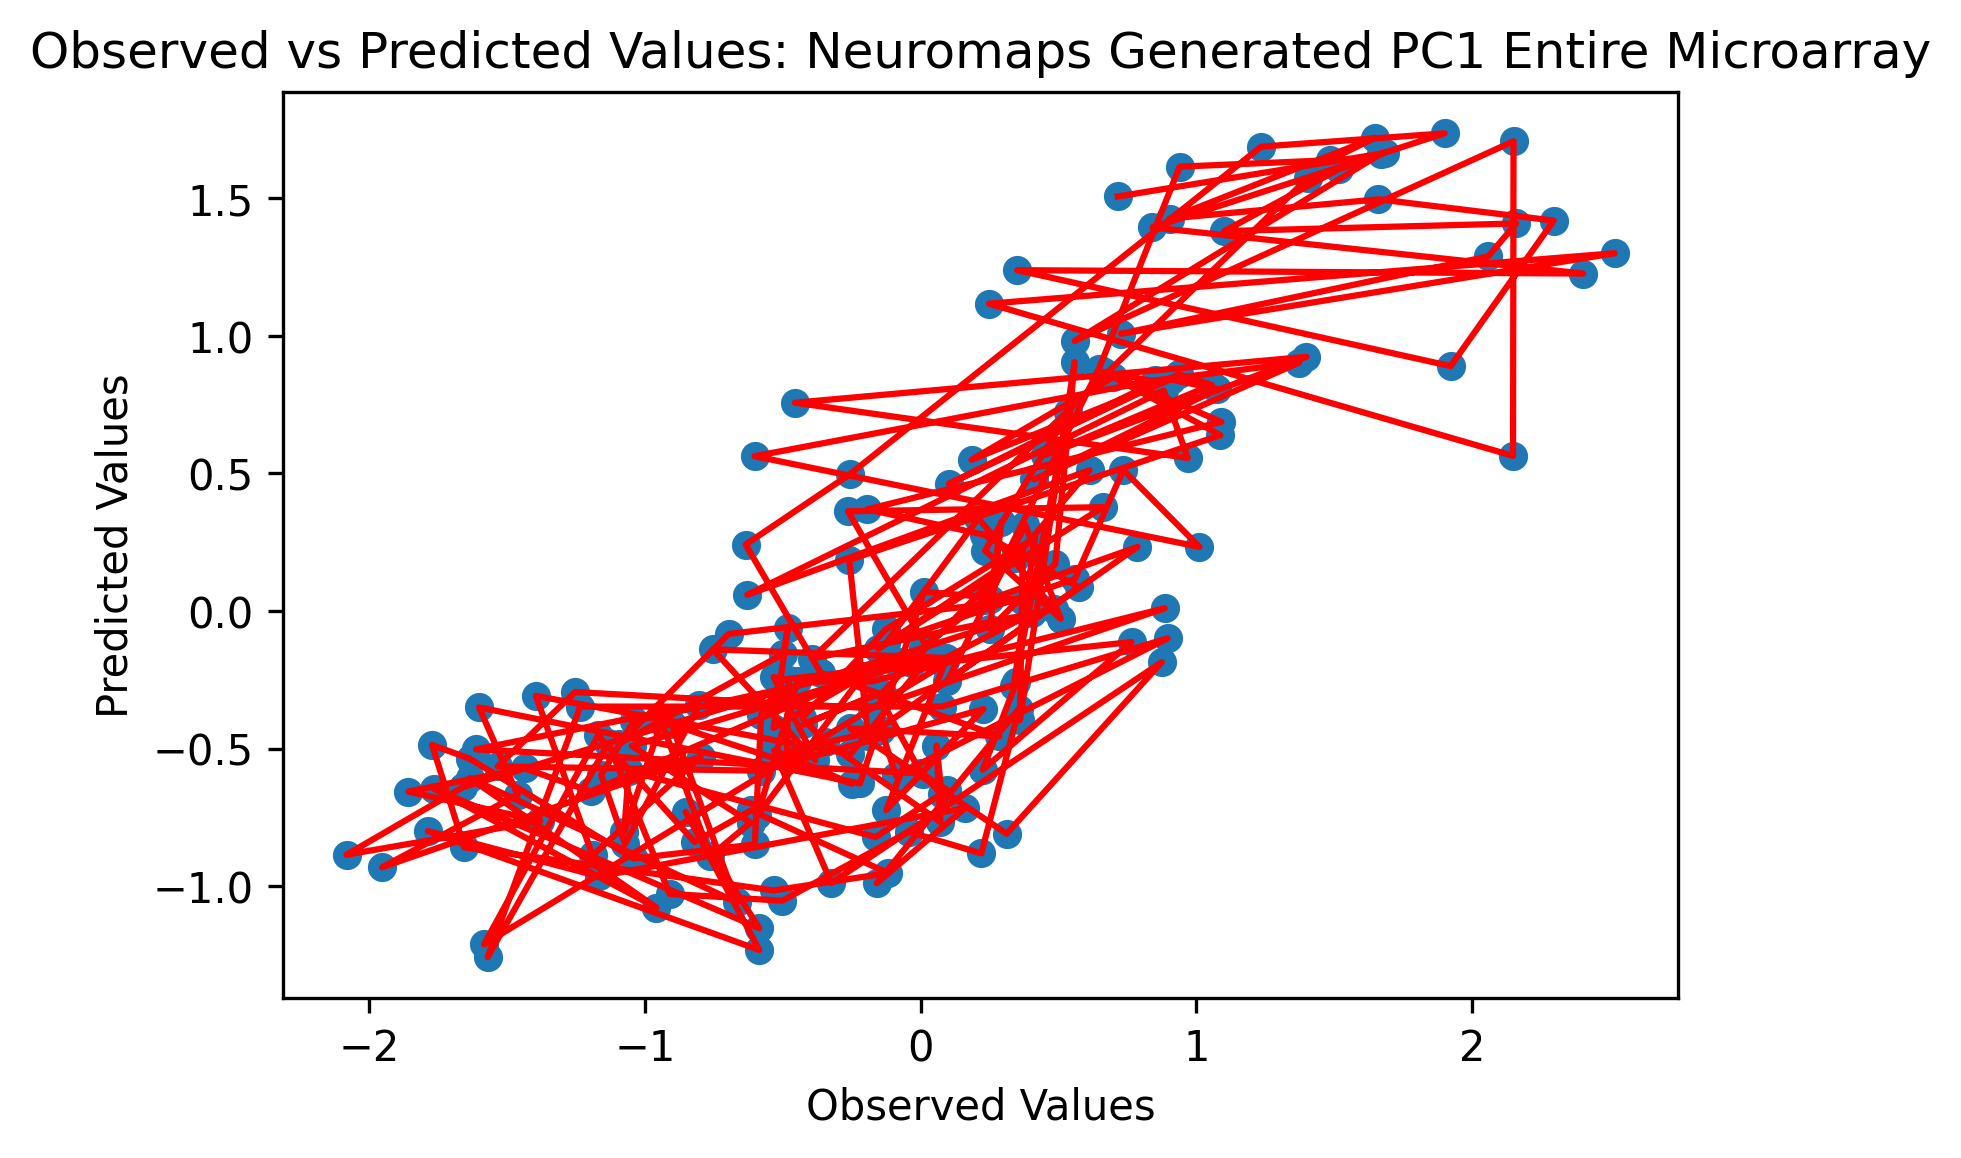

In [193]:
import matplotlib.pyplot as plt

# Predict the values using the model
y_pred = results_pc1.predict(x_const)

# Create a scatter plot of the observed and predicted values
plt.scatter(y_pc1, y_pred)

# Add a line of best fit to the plot
plt.plot(y_pc1, y_pred, color='red')

# Add a title and axis labels
plt.title('Observed vs Predicted Values: Neuromaps Generated PC1 Entire Microarray')
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')

# Show the plot
plt.show()

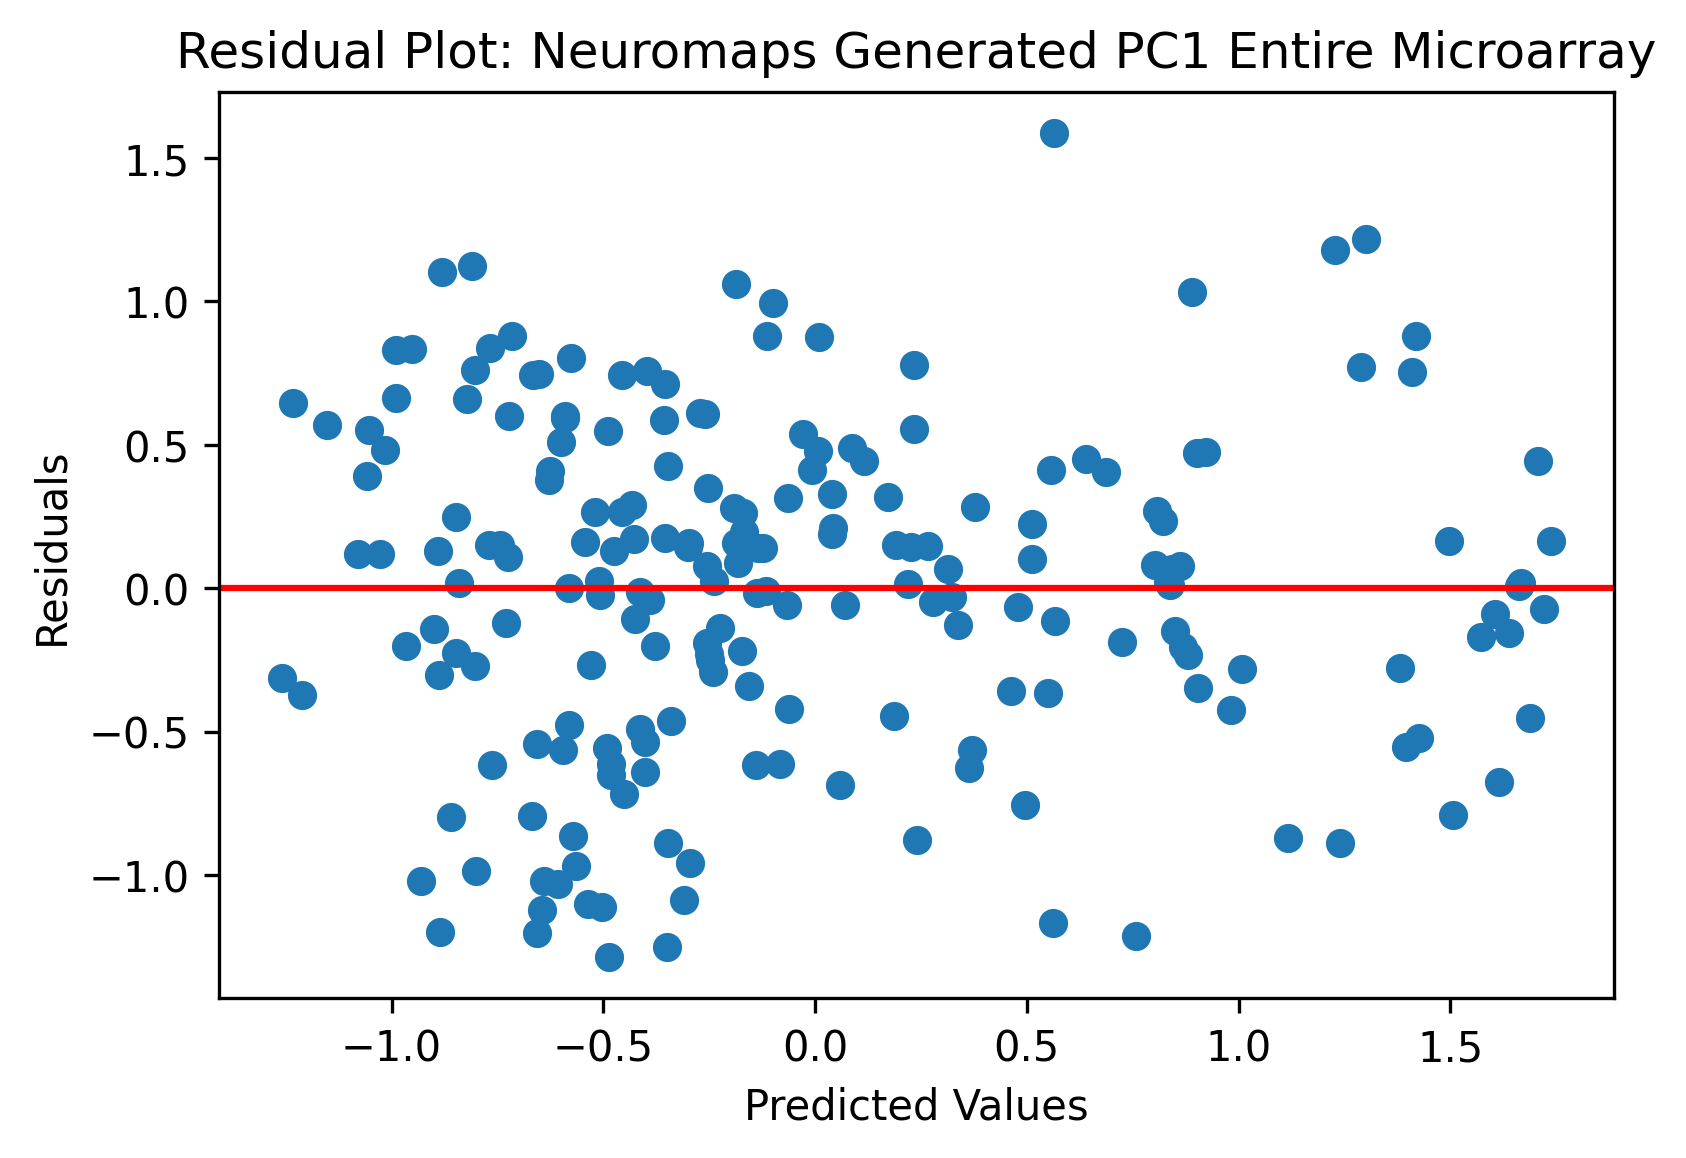

In [194]:
# Calculate the residuals
residuals = y_pc1 - y_pred

# Create a scatter plot of the residuals
plt.scatter(y_pred, residuals)

# Add a horizontal line at y = 0 to the plot
plt.axhline(y=0, color='red')

# Add a title and axis labels
plt.title('Residual Plot: Neuromaps Generated PC1 Entire Microarray')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Show the plot
plt.show()


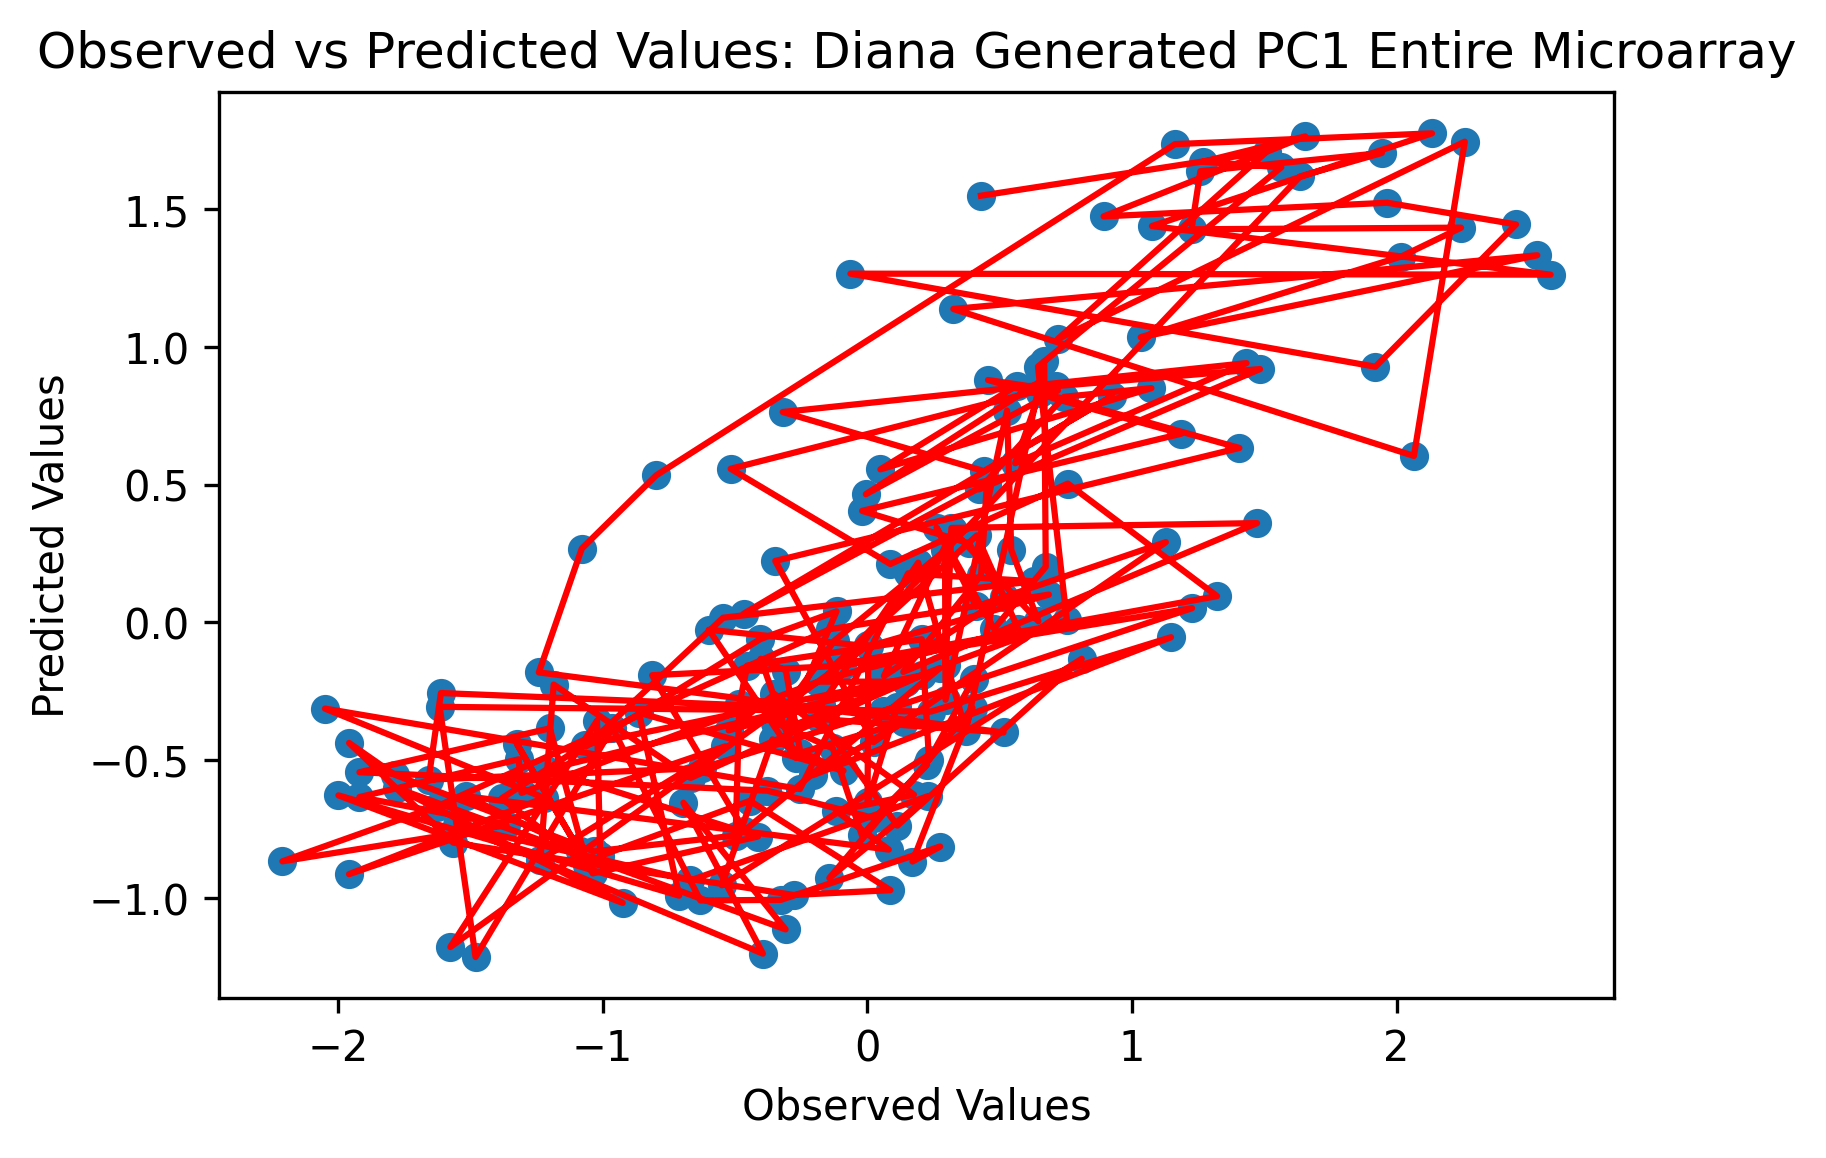

In [195]:
# Predict the values using the model
y_pred = results_pc1_exp.predict(x_const)

# Create a scatter plot of the observed and predicted values
plt.scatter(y_pc1_exp, y_pred)

# Add a line of best fit to the plot
plt.plot(y_pc1_exp, y_pred, color='red')

# Add a title and axis labels
plt.title('Observed vs Predicted Values: Diana Generated PC1 Entire Microarray')
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')

# Show the plot
plt.show()

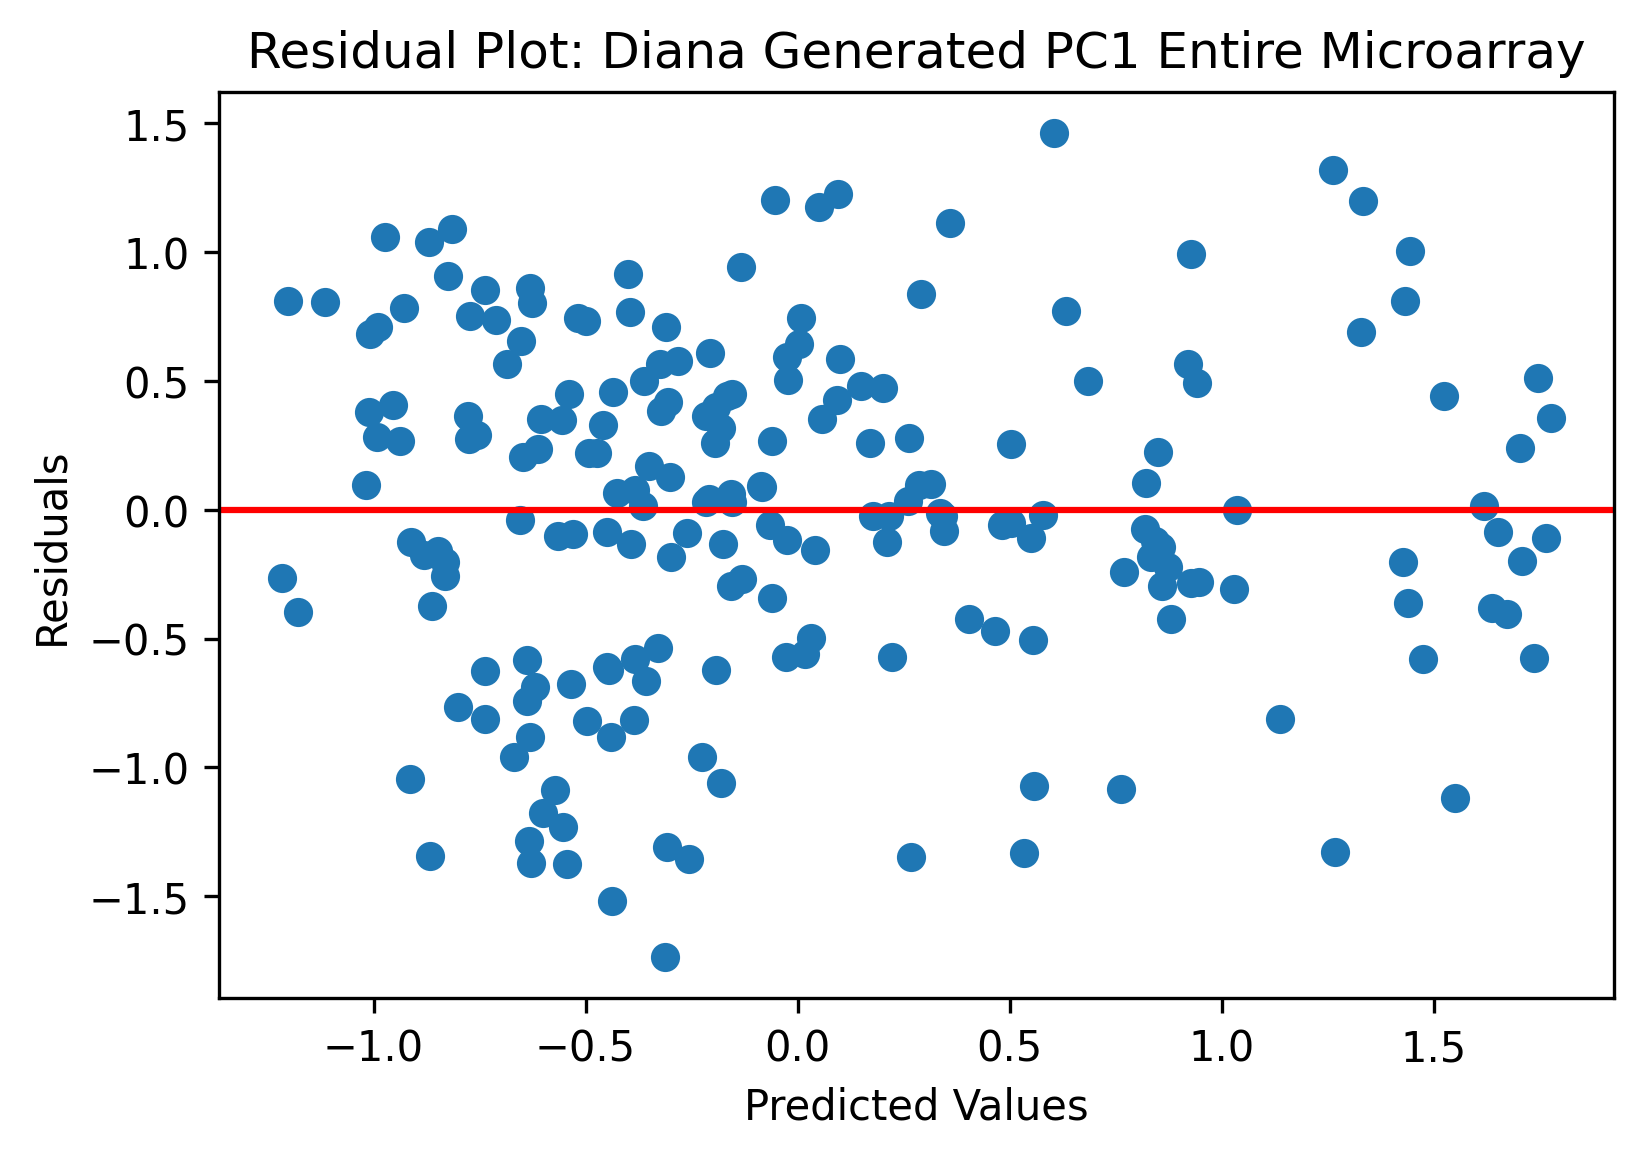

In [196]:
# Calculate the residuals
residuals = y_pc1_exp - y_pred

# Create a scatter plot of the residuals
plt.scatter(y_pred, residuals)

# Add a horizontal line at y = 0 to the plot
plt.axhline(y=0, color='red')

# Add a title and axis labels
plt.title('Residual Plot: Diana Generated PC1 Entire Microarray')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Show the plot
plt.show()


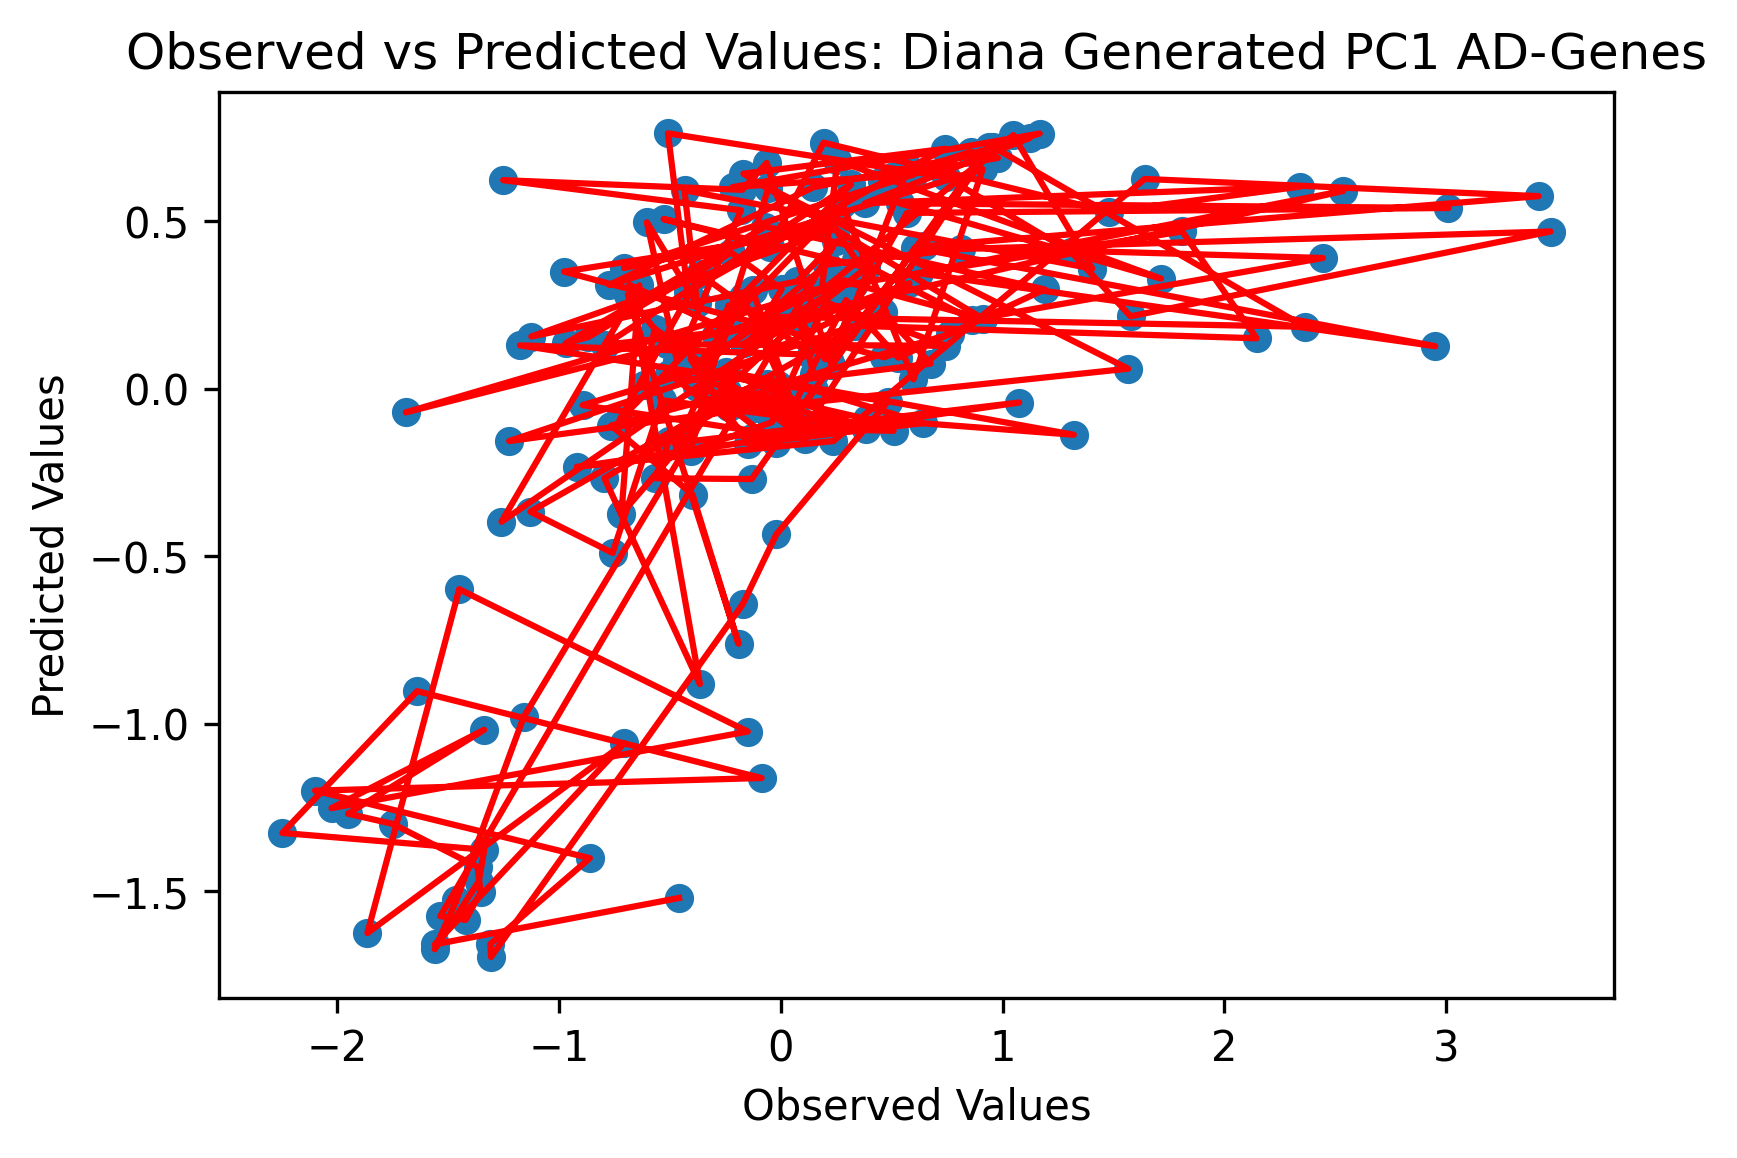

In [197]:
# Predict the values using the model
y_pred = results_pc1_gene.predict(x_const)

# Create a scatter plot of the observed and predicted values
plt.scatter(y_pc1_gene, y_pred)

# Add a line of best fit to the plot
plt.plot(y_pc1_gene, y_pred, color='red')

# Add a title and axis labels
plt.title('Observed vs Predicted Values: Diana Generated PC1 AD-Genes')
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')

# Show the plot
plt.show()

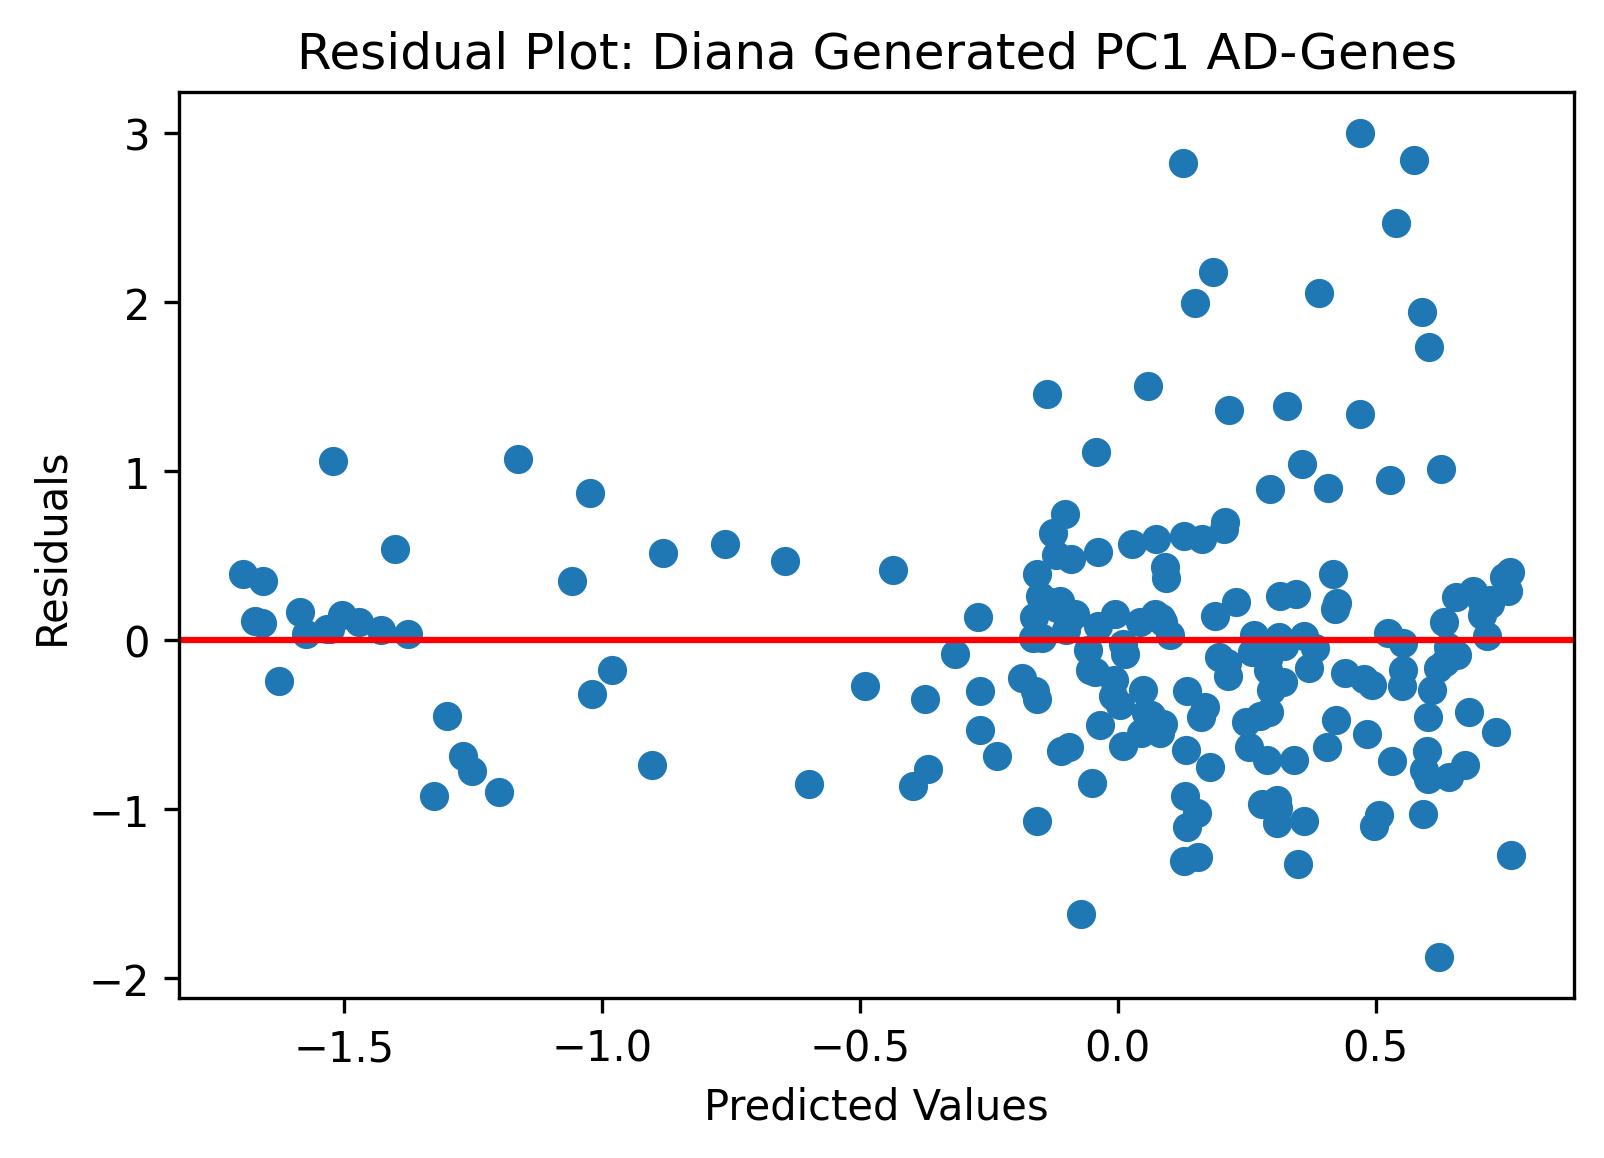

In [198]:
# Calculate the residuals
residuals = y_pc1_gene - y_pred

# Create a scatter plot of the residuals
plt.scatter(y_pred, residuals)

# Add a horizontal line at y = 0 to the plot
plt.axhline(y=0, color='red')

# Add a title and axis labels
plt.title('Residual Plot: Diana Generated PC1 AD-Genes')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Show the plot
plt.show()


In [199]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(x_columns, y_pc1)
coef = lasso_model.coef_
intercept = lasso_model.intercept_

r2 = r2_score(y_pc1, lasso_model.predict(x_columns))

x_constant = sm.add_constant(x_columns)
ols_model = sm.OLS(y_pc1, x_constant).fit()
p_values = ols_model.pvalues[0:]

print("coefficients: ", coef)
print("intercept: ", intercept)
print("r-squared: ", r2)
print("p-value: ", p_values)


coefficients:  [ 0.000e+00 -0.000e+00  7.231e-05  2.622e-03 -6.586e-04 -2.976e-03]
intercept:  -9.676906
r-squared:  0.5880515879881877
p-value:  const        1.859110e-09
myelinmap    1.402432e-15
thickness    6.679194e-11
cbv          5.222459e-03
cmr02        3.319360e-07
cmruglu      5.191738e-03
evoexp_xu    1.364825e-02
dtype: float64


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [200]:
# Create dataframe from coefficients, p-values, and other statistics
data = {'Coefficients': coef, 'P-values': p_values}
df = pd.DataFrame(data, columns = ['Coefficients', 'P-values'], index = x_columns.columns)

# Add R-squared value to dataframe
df['R-squared'] = r2

# Print dataframe
print(df)

<IPython.core.display.Javascript object>

           Coefficients      P-values  R-squared
myelinmap      0.000000  1.402432e-15   0.588052
thickness     -0.000000  6.679194e-11   0.588052
cbv            0.000072  5.222459e-03   0.588052
cmr02          0.002622  3.319360e-07   0.588052
cmruglu       -0.000659  5.191738e-03   0.588052
evoexp_xu     -0.002976  1.364825e-02   0.588052


In [201]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(x_columns, y_pc1_exp)
coef = lasso_model.coef_


In [202]:
from sklearn.linear_model import LassoCV
lasso_cv_model = LassoCV(cv=5)
lasso_cv_model.fit(x_columns, y_pc1_exp)

LassoCV(cv=5)

In [203]:
from statsmodels.regression.linear_model import OLS
xxx_constant = sm.add_constant(x_columns)
ols_model=OLS(y_pc1_exp, xxx_constant.iloc[:, :-1]).fit()
ols_model.summary()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                PC1_exp   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     132.0
Date:                Tue, 24 Jan 2023   Prob (F-statistic):           1.85e-60
Time:                        10:03:03   Log-Likelihood:                -135.59
No. Observations:                 200   AIC:                             283.2
Df Residuals:                     194   BIC:                             303.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.4059      1.009     -6.347      0.000      -8.397      -4.415
myelinmap      2.9153      0.412      7.077      0.000       2.103       3.728
thickness     -0.8926      0.154     -5.793      0.000      -1.196      -0.589
cbv         7.712e-05   3.18e-05      2.428      0.016    1.45e-05       0.000
cmr02          0.0011      0.000      4.674      0.000       0.001       0.002
cmruglu       -0.0002      0.000     -1.392      0.166      -0.000     7.3e-05
==============================================================================
Omnibus:                       11.884   Durbin-Watson:                   1.555
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               14.938
Skew:                          -0.431   Prob(JB):                     0.000570
Kurtosis:                       4.024   Cond. No.                     2.93e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.93e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [204]:
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

X = pd.DataFrame({'myelinmap': myelinmap_parc[0:200],
                  'thickness': thickness_parc[0:200],
                  'cbf': cbf_parc[0:200],
                  'meancbf': meancbf_parc[0:200],
                  'cbv': cbv_parc[0:200],
                  'cmr02': cmr02_parc[0:200],
                  'cmruglu': cmruglu_parc[0:200],
                  'intersubjvar': intersubjvar_parc[0:200],
                  'cogpc1': cogpc1_parc[0:200],
                  'fcg1': fcgradient01_parc[0:200],
                  'fcg2': fcgradient02_parc[0:200],
                  'fcg3': fcgradient03_parc[0:200],
                  'fcg4': fcgradient04_parc[0:200],
                  'fcg5': fcgradient05_parc[0:200],
                  'fcg6': fcgradient06_parc[0:200],
                  'fcg7': fcgradient07_parc[0:200],
                  'fcg8': fcgradient08_parc[0:200],
                  'fcg9': fcgradient09_parc[0:200],
                  'fcg10': fcgradient10_parc[0:200],
                  'evoexp_xu': evoexp_xu_parc[0:200],
                  'scalingnih': scalingnih_parc[0:200],
                  'scalingpnc': scalingpnc_parc[0:200],
                  'scalinghcp': scalinghcp_parc[0:200],
                  'megdelta': megdelta_parc[0:200],
                  'megtheta': megtheta_parc[0:200],
                  'megalpha': megalpha_parc[0:200],
                  'megbeta': megbeta_parc[0:200],
                  'meggamma1': meggamma1_parc[0:200],
                  'meggamma2': meggamma2_parc[0:200],
                  'megtimescale': megtimescale_parc[0:200],
                  #'carfentanil_kantonen': carfentanil_kantonen_parc[0:200],
                  'carfentanil_turtonen': carfentanil_turtonen_parc[0:200],
                  'lsn3172176': lsn3172176_parc[0:200],
                  'way100635': way100635_parc[0:200],
                  #'abp688_dubois': abp688_dubois_parc[0:200],
                  #'abp688_rosaneto': abp688_rosaneto_parc[0:200],
                  'abp688_smart': abp688_smart_parc[0:200]})

y1 = pd.DataFrame({'genepc1': genepc1_parc[0:200]})
y2 = pd.DataFrame({'PC1_exp': PC1_exp[0:200]})
y3 = pd.DataFrame({'PC1_gene': PC1_gene[0:200]})

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [205]:
X = imputer.fit_transform(X)

In [206]:
X = sm.add_constant(X) # add constant term
model1 = sm.OLS(y1, X).fit()
model2 = sm.OLS(y2, X).fit()
model3 = sm.OLS(y3, X).fit()
print(model1.summary())
print(model2.summary())
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                genepc1   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     107.0
Date:                Tue, 24 Jan 2023   Prob (F-statistic):           2.02e-95
Time:                        10:03:03   Log-Likelihood:                 39.936
No. Observations:                 200   AIC:                            -9.871
Df Residuals:                     165   BIC:                             105.6
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.05e+05    8.6e+05      0.122      0.9

TypeError: Image data of dtype object cannot be converted to float

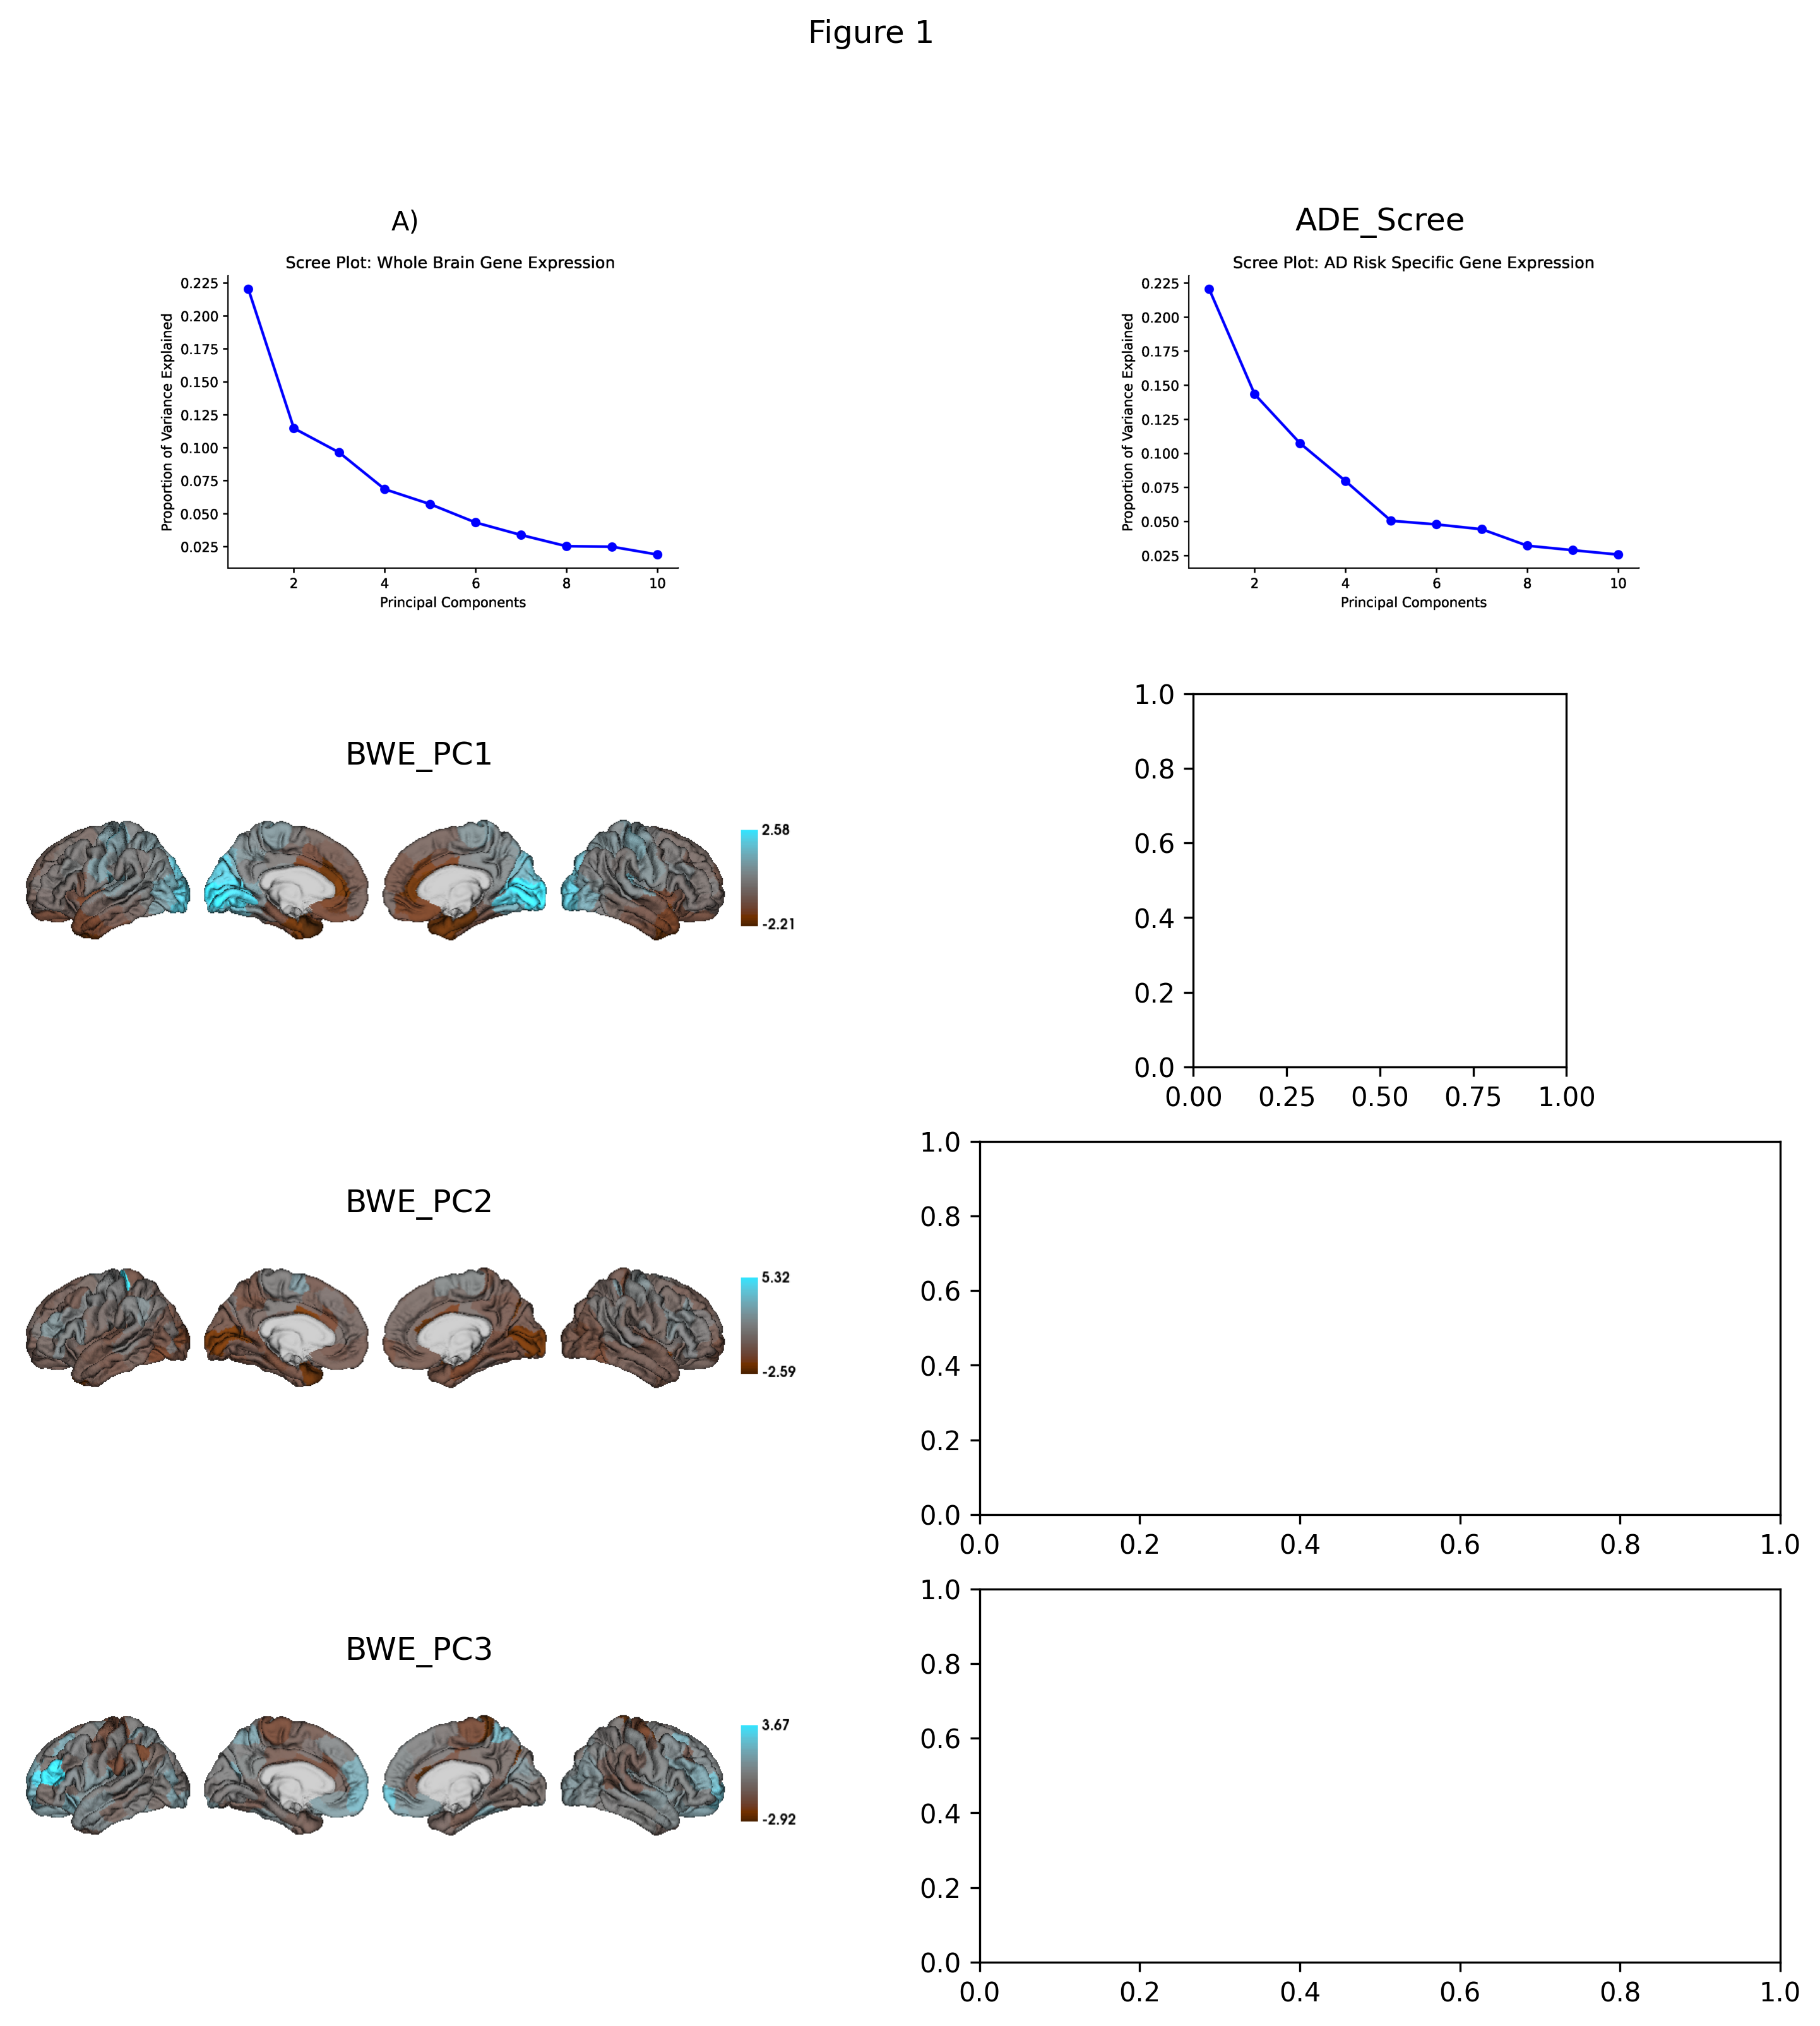

In [269]:
# code for displaying multiple images in one figure
  
#import libraries
import cv2
from matplotlib.transforms import offset_copy

# Read an image from file
WBE_Scree = cv2.imread("AAIC23_Figures/BWE_Scree.png")
ADE_Scree = cv2.imread("AAIC23_Figures/ADE_Scree.png")
WBE_PC1 = cv2.imread("AAIC23_Figures/BWE_PC1.png")
WBE_PC2 = cv2.imread("AAIC23_Figures/BWE_PC2.png")
WBE_PC3 = cv2.imread("AAIC23_Figures/BWE_PC3.png")
ADE_PC1 = cv2.imread("AAIC23_Figures/ADE_PC1.png")
ADE_PC2 = cv2.imread("AAIC23_Figures/ADE_PC2.png")
ADE_PC3 = cv2.imread("AAIC23_Figures/ADE_PC3.png")

# Create a figure and axes for the subplot
fig, axs = plt.subplots(4, 2, figsize=(12, 12))

# Set the title of the figure
fig.suptitle('Figure 1')


# Plot WBE
axs[0, 0].imshow(WBE_Scree)
axs[0, 0].set_title('A)', ha='right', size=10)
axs[0, 0].set_axis_off()

axs[1, 0].imshow(WBE_PC1)
axs[1, 0].set_title('BWE_PC1')
axs[1, 0].set_axis_off()

axs[2, 0].imshow(WBE_PC2)
axs[2, 0].set_title('BWE_PC2')
axs[2, 0].set_axis_off()

axs[3, 0].imshow(WBE_PC3)
axs[3, 0].set_title('BWE_PC3')
axs[3, 0].set_axis_off()

# Plot ADE
axs[0, 1].imshow(ADE_Scree)
axs[0, 1].set_title('ADE_Scree')
axs[0, 1].set_axis_off()

axs[1, 1].imshow(ADE_PC1)
axs[1, 1].set_title('ADE_PC1')
axs[1, 1].set_axis_off()

axs[2, 1].imshow(ADE_PC2)
axs[2, 1].set_title('ADE_PC2')
axs[2, 1].set_axis_off()

axs[3, 1].imshow(ADE_PC3)
axs[3, 1].set_title('ADE_PC3')
axs[3, 1].set_axis_off()

fig.supylabel('Principal Components 1-3', verticalalignment='top')
# # Show the plot
fig.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

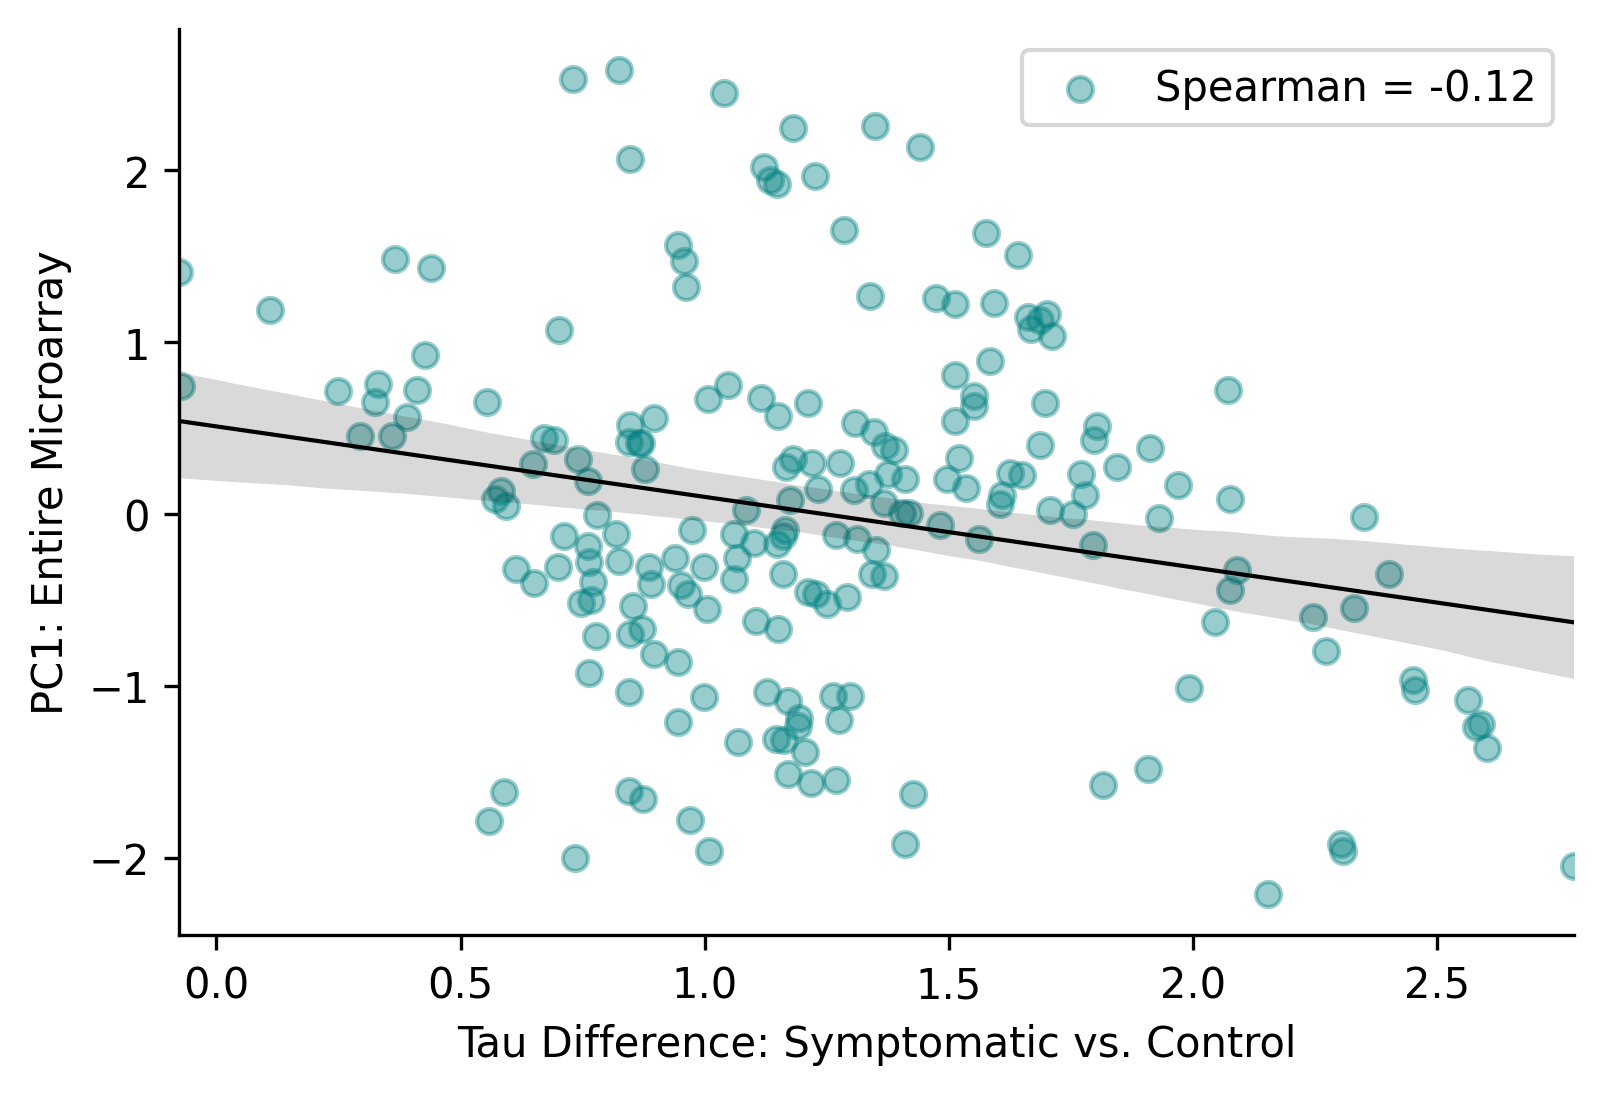

In [219]:
#Spearman plot 
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
from scipy.stats import spearmanr
df = pd.DataFrame({"x": tau_diff, "y": PC1_exp})
r, pvalue = spearmanr(df['x'], df['y'])
import seaborn as sns
sns.regplot(data=df, x="x", y="y", 
            label=f'Spearman = {r:.2f}',
            line_kws={"color": "black", "lw":1},
            scatter_kws={"color": "teal","alpha":0.4}).set(xlabel="Tau Difference: Symptomatic vs. Control", 
                                                           ylabel="PC1: Entire Microarray")
plt.legend()
sns.despine()
